In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp5mgvs30a/pubring.gpg' created
gpg: /tmp/tmp5mgvs30a/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive  -o nonempty

In [0]:
!pip install -q keras

In [7]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 222us/step - loss: 0.2685 - acc: 0.9182 - val_loss: 0.0654 - val_acc: 0.9808
Epoch 2/12
24704/60000 [===========>..................] - ETA: 6s - loss: 0.0923 - acc: 0.9723

60000/60000 [==============================] - 11s 185us/step - loss: 0.0865 - acc: 0.9741 - val_loss: 0.0403 - val_acc: 0.9877
Epoch 3/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0649 - acc: 0.9806 - val_loss: 0.0352 - val_acc: 0.9877
Epoch 4/12
52480/60000 [=========================>....] - ETA: 1s - loss: 0.0548 - acc: 0.9838

60000/60000 [==============================] - 11s 184us/step - loss: 0.0542 - acc: 0.9840 - val_loss: 0.0297 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0449 - acc: 0.9865 - val_loss: 0.0328 - val_acc: 0.9890
Epoch 6/12
59776/60000 [============================>.] - ETA: 0s - loss: 0.0400 - acc: 0.9875

60000/60000 [==============================] - 11s 184us/step - loss: 0.0402 - acc: 0.9875 - val_loss: 0.0291 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 11s 185us/step - loss: 0.0379 - acc: 0.9887 - val_loss: 0.0290 - val_acc: 0.9902
Epoch 8/12
60000/60000 [==============================] - 11s 182us/step - loss: 0.0345 - acc: 0.9899 - val_loss: 0.0278 - val_acc: 0.9919


Epoch 9/12
60000/60000 [==============================] - 11s 182us/step - loss: 0.0309 - acc: 0.9901 - val_loss: 0.0264 - val_acc: 0.9923
Epoch 10/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0286 - acc: 0.9914 - val_loss: 0.0267 - val_acc: 0.9917
Epoch 11/12
42880/60000 [====================>.........] - ETA: 3s - loss: 0.0253 - acc: 0.9920

60000/60000 [==============================] - 11s 185us/step - loss: 0.0263 - acc: 0.9918 - val_loss: 0.0270 - val_acc: 0.9920
Epoch 12/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0259 - acc: 0.9922 - val_loss: 0.0264 - val_acc: 0.9924
Test loss: 0.026386173812904052
Test accuracy: 0.9924


In [8]:
import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/gpu:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# Test execution once to detect errors early.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)
  
def gpu():
  sess.run(net_gpu)
  
# Runs the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

sess.close()

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
8.948938666000004
GPU (s):
0.2615954700000884
GPU speedup over CPU: 34x


Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None

15: [D loss: 0.319668, acc: 0.941406]  [A loss: 1.802847, acc: 0.000000]
16: [D loss: 0.288876, acc: 0.998047]  [A loss: 1.350905, acc: 0.000000]
17: [D loss: 0.340714, acc: 0.804688]  [A loss: 2.259546, acc: 0.000000]
18: [D loss: 0.332406, acc: 0.949219]  [A loss: 1.246825, acc: 0.003906]
19: [D loss: 0.335510, acc: 0.806641]  [A loss: 1.884596, acc: 0.000000]
20: [D loss: 0.199351, acc: 0.992188]  [A loss: 1.403253, acc: 0.000000]
21: [D loss: 0.233905, acc: 0.962891]  [A loss: 1.892402, acc: 0.000000]
22: [D loss: 0.164812, acc: 1.000000]  [A loss: 1.646998, acc: 0.000000]
23: [D loss: 0.199522, acc: 0.976562]  [A loss: 2.092599, acc: 0.000000]
24: [D loss: 0.154552, acc: 0.996094]  [A loss: 1.737538, acc: 0.000000]
25: [D loss: 0.168084, acc: 0.986328]  [A loss: 2.189342, acc: 0.000000]
26: [D loss: 0.154180, acc: 0.990234]  [A loss: 1.627434, acc: 0.000000]
27: [D loss: 0.217948, acc: 0.925781]  [A loss: 2.671492, acc: 0.000000]
28: [D loss: 0.217270, acc: 0.941406]  [A loss: 1.0

66: [D loss: 0.589867, acc: 0.587891]  [A loss: 2.338211, acc: 0.000000]
67: [D loss: 0.440154, acc: 0.847656]  [A loss: 0.648773, acc: 0.597656]
68: [D loss: 0.861579, acc: 0.507812]  [A loss: 1.978750, acc: 0.000000]
69: [D loss: 0.396950, acc: 0.910156]  [A loss: 0.971420, acc: 0.148438]
70: [D loss: 0.595570, acc: 0.558594]  [A loss: 1.811597, acc: 0.000000]
71: [D loss: 0.395147, acc: 0.894531]  [A loss: 1.044552, acc: 0.113281]
72: [D loss: 0.598381, acc: 0.580078]  [A loss: 1.987984, acc: 0.000000]
73: [D loss: 0.404750, acc: 0.902344]  [A loss: 1.028412, acc: 0.093750]
74: [D loss: 0.621832, acc: 0.550781]  [A loss: 2.024428, acc: 0.000000]
75: [D loss: 0.424328, acc: 0.884766]  [A loss: 0.999227, acc: 0.121094]
76: [D loss: 0.651972, acc: 0.537109]  [A loss: 2.140009, acc: 0.000000]
77: [D loss: 0.436085, acc: 0.888672]  [A loss: 0.763902, acc: 0.425781]
78: [D loss: 0.714478, acc: 0.517578]  [A loss: 1.961708, acc: 0.000000]
79: [D loss: 0.400756, acc: 0.906250]  [A loss: 1.0

117: [D loss: 0.370499, acc: 0.906250]  [A loss: 1.019869, acc: 0.152344]
118: [D loss: 0.742535, acc: 0.507812]  [A loss: 2.414506, acc: 0.000000]
119: [D loss: 0.421800, acc: 0.865234]  [A loss: 1.068563, acc: 0.113281]
120: [D loss: 0.674160, acc: 0.541016]  [A loss: 2.332684, acc: 0.000000]
121: [D loss: 0.441222, acc: 0.859375]  [A loss: 1.141715, acc: 0.074219]
122: [D loss: 0.695715, acc: 0.539062]  [A loss: 2.462987, acc: 0.000000]
123: [D loss: 0.480150, acc: 0.837891]  [A loss: 0.966187, acc: 0.242188]
124: [D loss: 0.782340, acc: 0.515625]  [A loss: 2.430812, acc: 0.000000]
125: [D loss: 0.520073, acc: 0.773438]  [A loss: 0.868351, acc: 0.320312]
126: [D loss: 0.808760, acc: 0.509766]  [A loss: 2.258348, acc: 0.000000]
127: [D loss: 0.551996, acc: 0.753906]  [A loss: 0.959704, acc: 0.187500]
128: [D loss: 0.779193, acc: 0.519531]  [A loss: 2.044429, acc: 0.000000]
129: [D loss: 0.555252, acc: 0.748047]  [A loss: 0.977027, acc: 0.191406]
130: [D loss: 0.748194, acc: 0.515625]

168: [D loss: 0.713598, acc: 0.498047]  [A loss: 1.718617, acc: 0.000000]
169: [D loss: 0.566732, acc: 0.761719]  [A loss: 0.691408, acc: 0.539062]
170: [D loss: 0.697647, acc: 0.507812]  [A loss: 1.711565, acc: 0.000000]
171: [D loss: 0.571672, acc: 0.783203]  [A loss: 0.757935, acc: 0.382812]
172: [D loss: 0.654988, acc: 0.515625]  [A loss: 1.713101, acc: 0.000000]
173: [D loss: 0.552797, acc: 0.814453]  [A loss: 0.731712, acc: 0.429688]
174: [D loss: 0.715004, acc: 0.509766]  [A loss: 1.801864, acc: 0.000000]
175: [D loss: 0.571927, acc: 0.750000]  [A loss: 0.680482, acc: 0.558594]
176: [D loss: 0.699435, acc: 0.507812]  [A loss: 1.631965, acc: 0.000000]
177: [D loss: 0.577103, acc: 0.767578]  [A loss: 0.810085, acc: 0.277344]
178: [D loss: 0.673931, acc: 0.503906]  [A loss: 1.635245, acc: 0.000000]
179: [D loss: 0.577492, acc: 0.742188]  [A loss: 0.781128, acc: 0.363281]
180: [D loss: 0.692355, acc: 0.513672]  [A loss: 1.728073, acc: 0.000000]
181: [D loss: 0.579432, acc: 0.751953]

219: [D loss: 0.592756, acc: 0.718750]  [A loss: 0.796575, acc: 0.312500]
220: [D loss: 0.718313, acc: 0.525391]  [A loss: 1.655712, acc: 0.000000]
221: [D loss: 0.603639, acc: 0.671875]  [A loss: 0.705590, acc: 0.503906]
222: [D loss: 0.722026, acc: 0.511719]  [A loss: 1.342692, acc: 0.000000]
223: [D loss: 0.593909, acc: 0.738281]  [A loss: 0.857902, acc: 0.218750]
224: [D loss: 0.659126, acc: 0.558594]  [A loss: 1.384537, acc: 0.011719]
225: [D loss: 0.596730, acc: 0.703125]  [A loss: 0.894783, acc: 0.195312]
226: [D loss: 0.649987, acc: 0.574219]  [A loss: 1.458986, acc: 0.007812]
227: [D loss: 0.591509, acc: 0.732422]  [A loss: 0.822295, acc: 0.281250]
228: [D loss: 0.696333, acc: 0.537109]  [A loss: 1.678880, acc: 0.000000]
229: [D loss: 0.603396, acc: 0.691406]  [A loss: 0.657948, acc: 0.609375]
230: [D loss: 0.733657, acc: 0.513672]  [A loss: 1.511365, acc: 0.000000]
231: [D loss: 0.616358, acc: 0.697266]  [A loss: 0.772528, acc: 0.375000]
232: [D loss: 0.699501, acc: 0.535156]

270: [D loss: 0.687876, acc: 0.552734]  [A loss: 1.418479, acc: 0.000000]
271: [D loss: 0.620429, acc: 0.683594]  [A loss: 0.726537, acc: 0.464844]
272: [D loss: 0.710254, acc: 0.519531]  [A loss: 1.410003, acc: 0.000000]
273: [D loss: 0.617689, acc: 0.691406]  [A loss: 0.752030, acc: 0.417969]
274: [D loss: 0.702269, acc: 0.525391]  [A loss: 1.463456, acc: 0.000000]
275: [D loss: 0.631719, acc: 0.681641]  [A loss: 0.730630, acc: 0.417969]
276: [D loss: 0.703471, acc: 0.517578]  [A loss: 1.308083, acc: 0.000000]
277: [D loss: 0.629848, acc: 0.675781]  [A loss: 0.783758, acc: 0.363281]
278: [D loss: 0.689581, acc: 0.515625]  [A loss: 1.276373, acc: 0.003906]
279: [D loss: 0.626499, acc: 0.697266]  [A loss: 0.806956, acc: 0.281250]
280: [D loss: 0.678536, acc: 0.542969]  [A loss: 1.296020, acc: 0.000000]
281: [D loss: 0.619472, acc: 0.703125]  [A loss: 0.749177, acc: 0.398438]
282: [D loss: 0.695082, acc: 0.527344]  [A loss: 1.400889, acc: 0.000000]
283: [D loss: 0.645547, acc: 0.630859]

321: [D loss: 0.635206, acc: 0.701172]  [A loss: 0.725257, acc: 0.417969]
322: [D loss: 0.704817, acc: 0.529297]  [A loss: 1.213561, acc: 0.007812]
323: [D loss: 0.649561, acc: 0.634766]  [A loss: 0.724289, acc: 0.484375]
324: [D loss: 0.681493, acc: 0.535156]  [A loss: 1.161484, acc: 0.000000]
325: [D loss: 0.666857, acc: 0.615234]  [A loss: 0.791151, acc: 0.312500]
326: [D loss: 0.676691, acc: 0.564453]  [A loss: 1.133643, acc: 0.007812]
327: [D loss: 0.643287, acc: 0.652344]  [A loss: 0.811410, acc: 0.230469]
328: [D loss: 0.697960, acc: 0.542969]  [A loss: 1.154411, acc: 0.007812]
329: [D loss: 0.649801, acc: 0.642578]  [A loss: 0.756277, acc: 0.359375]
330: [D loss: 0.698989, acc: 0.529297]  [A loss: 1.222113, acc: 0.000000]
331: [D loss: 0.651569, acc: 0.630859]  [A loss: 0.700047, acc: 0.445312]
332: [D loss: 0.704256, acc: 0.529297]  [A loss: 1.200887, acc: 0.007812]
333: [D loss: 0.657269, acc: 0.609375]  [A loss: 0.750774, acc: 0.367188]
334: [D loss: 0.696622, acc: 0.511719]

372: [D loss: 0.726675, acc: 0.511719]  [A loss: 1.094834, acc: 0.035156]
373: [D loss: 0.654939, acc: 0.636719]  [A loss: 0.748826, acc: 0.429688]
374: [D loss: 0.680772, acc: 0.554688]  [A loss: 1.029623, acc: 0.054688]
375: [D loss: 0.662982, acc: 0.609375]  [A loss: 0.824413, acc: 0.246094]
376: [D loss: 0.676582, acc: 0.568359]  [A loss: 0.990320, acc: 0.089844]
377: [D loss: 0.658509, acc: 0.617188]  [A loss: 0.801061, acc: 0.316406]
378: [D loss: 0.680070, acc: 0.562500]  [A loss: 1.060387, acc: 0.039062]
379: [D loss: 0.640577, acc: 0.681641]  [A loss: 0.781570, acc: 0.347656]
380: [D loss: 0.695129, acc: 0.539062]  [A loss: 1.111055, acc: 0.019531]
381: [D loss: 0.667467, acc: 0.603516]  [A loss: 0.723605, acc: 0.457031]
382: [D loss: 0.691256, acc: 0.523438]  [A loss: 1.096377, acc: 0.027344]
383: [D loss: 0.658408, acc: 0.611328]  [A loss: 0.748122, acc: 0.351562]
384: [D loss: 0.697608, acc: 0.521484]  [A loss: 1.076952, acc: 0.019531]
385: [D loss: 0.683854, acc: 0.558594]

423: [D loss: 0.659236, acc: 0.603516]  [A loss: 0.846625, acc: 0.167969]
424: [D loss: 0.678934, acc: 0.556641]  [A loss: 0.890444, acc: 0.105469]
425: [D loss: 0.682050, acc: 0.564453]  [A loss: 0.922800, acc: 0.125000]
426: [D loss: 0.684464, acc: 0.537109]  [A loss: 0.868598, acc: 0.152344]
427: [D loss: 0.667741, acc: 0.593750]  [A loss: 0.919127, acc: 0.097656]
428: [D loss: 0.680019, acc: 0.574219]  [A loss: 0.950541, acc: 0.042969]
429: [D loss: 0.674132, acc: 0.578125]  [A loss: 0.858224, acc: 0.160156]
430: [D loss: 0.674063, acc: 0.576172]  [A loss: 1.030118, acc: 0.039062]
431: [D loss: 0.680031, acc: 0.578125]  [A loss: 0.773515, acc: 0.312500]
432: [D loss: 0.685575, acc: 0.548828]  [A loss: 1.073227, acc: 0.011719]
433: [D loss: 0.671315, acc: 0.576172]  [A loss: 0.731915, acc: 0.425781]
434: [D loss: 0.699217, acc: 0.525391]  [A loss: 1.129151, acc: 0.007812]
435: [D loss: 0.671581, acc: 0.587891]  [A loss: 0.727090, acc: 0.425781]
436: [D loss: 0.695895, acc: 0.513672]

474: [D loss: 0.691673, acc: 0.541016]  [A loss: 0.983420, acc: 0.062500]
475: [D loss: 0.667997, acc: 0.625000]  [A loss: 0.781372, acc: 0.308594]
476: [D loss: 0.673550, acc: 0.560547]  [A loss: 1.025315, acc: 0.015625]
477: [D loss: 0.660321, acc: 0.615234]  [A loss: 0.762851, acc: 0.324219]
478: [D loss: 0.687599, acc: 0.550781]  [A loss: 1.044879, acc: 0.023438]
479: [D loss: 0.659751, acc: 0.599609]  [A loss: 0.771848, acc: 0.328125]
480: [D loss: 0.698323, acc: 0.531250]  [A loss: 1.034345, acc: 0.027344]
481: [D loss: 0.662640, acc: 0.626953]  [A loss: 0.833262, acc: 0.218750]
482: [D loss: 0.672501, acc: 0.566406]  [A loss: 0.972127, acc: 0.050781]
483: [D loss: 0.678980, acc: 0.568359]  [A loss: 0.778181, acc: 0.292969]
484: [D loss: 0.671953, acc: 0.550781]  [A loss: 1.000491, acc: 0.027344]
485: [D loss: 0.668091, acc: 0.595703]  [A loss: 0.762405, acc: 0.335938]
486: [D loss: 0.686687, acc: 0.539062]  [A loss: 1.000451, acc: 0.031250]
487: [D loss: 0.653653, acc: 0.644531]

525: [D loss: 0.662395, acc: 0.597656]  [A loss: 0.710719, acc: 0.453125]
526: [D loss: 0.702890, acc: 0.546875]  [A loss: 1.023178, acc: 0.042969]
527: [D loss: 0.655403, acc: 0.609375]  [A loss: 0.773527, acc: 0.324219]
528: [D loss: 0.676815, acc: 0.542969]  [A loss: 0.987040, acc: 0.046875]
529: [D loss: 0.663923, acc: 0.609375]  [A loss: 0.797387, acc: 0.312500]
530: [D loss: 0.686549, acc: 0.542969]  [A loss: 0.964045, acc: 0.093750]
531: [D loss: 0.664730, acc: 0.632812]  [A loss: 0.833254, acc: 0.179688]
532: [D loss: 0.667040, acc: 0.593750]  [A loss: 0.940200, acc: 0.109375]
533: [D loss: 0.651691, acc: 0.634766]  [A loss: 0.899241, acc: 0.140625]
534: [D loss: 0.656462, acc: 0.583984]  [A loss: 0.921741, acc: 0.125000]
535: [D loss: 0.655294, acc: 0.615234]  [A loss: 0.894197, acc: 0.144531]
536: [D loss: 0.667020, acc: 0.603516]  [A loss: 0.917067, acc: 0.156250]
537: [D loss: 0.638832, acc: 0.644531]  [A loss: 0.875722, acc: 0.183594]
538: [D loss: 0.670715, acc: 0.576172]

576: [D loss: 0.661263, acc: 0.597656]  [A loss: 0.834256, acc: 0.203125]
577: [D loss: 0.677552, acc: 0.570312]  [A loss: 1.030740, acc: 0.035156]
578: [D loss: 0.668649, acc: 0.576172]  [A loss: 0.889882, acc: 0.187500]
579: [D loss: 0.662375, acc: 0.582031]  [A loss: 1.038026, acc: 0.039062]
580: [D loss: 0.669203, acc: 0.582031]  [A loss: 0.821018, acc: 0.226562]
581: [D loss: 0.662841, acc: 0.582031]  [A loss: 1.067785, acc: 0.054688]
582: [D loss: 0.667425, acc: 0.595703]  [A loss: 0.790180, acc: 0.351562]
583: [D loss: 0.686316, acc: 0.562500]  [A loss: 1.097849, acc: 0.015625]
584: [D loss: 0.668915, acc: 0.580078]  [A loss: 0.690453, acc: 0.531250]
585: [D loss: 0.686560, acc: 0.535156]  [A loss: 1.125375, acc: 0.019531]
586: [D loss: 0.657767, acc: 0.593750]  [A loss: 0.775547, acc: 0.343750]
587: [D loss: 0.724232, acc: 0.513672]  [A loss: 1.141914, acc: 0.015625]
588: [D loss: 0.673629, acc: 0.593750]  [A loss: 0.713532, acc: 0.453125]
589: [D loss: 0.687830, acc: 0.560547]

627: [D loss: 0.686327, acc: 0.544922]  [A loss: 0.752072, acc: 0.363281]
628: [D loss: 0.707554, acc: 0.546875]  [A loss: 1.126597, acc: 0.035156]
629: [D loss: 0.653278, acc: 0.636719]  [A loss: 0.780981, acc: 0.324219]
630: [D loss: 0.713749, acc: 0.507812]  [A loss: 1.031419, acc: 0.035156]
631: [D loss: 0.663940, acc: 0.599609]  [A loss: 0.759353, acc: 0.386719]
632: [D loss: 0.693927, acc: 0.544922]  [A loss: 1.001719, acc: 0.066406]
633: [D loss: 0.659359, acc: 0.591797]  [A loss: 0.817104, acc: 0.277344]
634: [D loss: 0.681498, acc: 0.574219]  [A loss: 0.938468, acc: 0.128906]
635: [D loss: 0.669769, acc: 0.607422]  [A loss: 0.851432, acc: 0.191406]
636: [D loss: 0.665557, acc: 0.591797]  [A loss: 0.975605, acc: 0.062500]
637: [D loss: 0.673537, acc: 0.585938]  [A loss: 0.861316, acc: 0.183594]
638: [D loss: 0.660297, acc: 0.589844]  [A loss: 0.938223, acc: 0.136719]
639: [D loss: 0.663663, acc: 0.609375]  [A loss: 0.910686, acc: 0.156250]
640: [D loss: 0.663762, acc: 0.593750]

678: [D loss: 0.674607, acc: 0.580078]  [A loss: 0.932365, acc: 0.121094]
679: [D loss: 0.691937, acc: 0.544922]  [A loss: 0.985891, acc: 0.093750]
680: [D loss: 0.661292, acc: 0.601562]  [A loss: 0.858969, acc: 0.218750]
681: [D loss: 0.689669, acc: 0.546875]  [A loss: 0.995011, acc: 0.078125]
682: [D loss: 0.676437, acc: 0.562500]  [A loss: 0.871481, acc: 0.179688]
683: [D loss: 0.676265, acc: 0.585938]  [A loss: 0.937426, acc: 0.144531]
684: [D loss: 0.712064, acc: 0.525391]  [A loss: 1.018587, acc: 0.054688]
685: [D loss: 0.679005, acc: 0.552734]  [A loss: 0.845782, acc: 0.230469]
686: [D loss: 0.681282, acc: 0.570312]  [A loss: 1.078789, acc: 0.050781]
687: [D loss: 0.661482, acc: 0.589844]  [A loss: 0.839749, acc: 0.250000]
688: [D loss: 0.684215, acc: 0.562500]  [A loss: 1.043928, acc: 0.054688]
689: [D loss: 0.671445, acc: 0.601562]  [A loss: 0.785754, acc: 0.363281]
690: [D loss: 0.696903, acc: 0.515625]  [A loss: 1.040773, acc: 0.031250]
691: [D loss: 0.658247, acc: 0.589844]

729: [D loss: 0.673334, acc: 0.546875]  [A loss: 0.901875, acc: 0.156250]
730: [D loss: 0.682983, acc: 0.552734]  [A loss: 0.955800, acc: 0.117188]
731: [D loss: 0.670083, acc: 0.585938]  [A loss: 0.860292, acc: 0.230469]
732: [D loss: 0.676984, acc: 0.562500]  [A loss: 1.018734, acc: 0.074219]
733: [D loss: 0.673896, acc: 0.583984]  [A loss: 0.856888, acc: 0.203125]
734: [D loss: 0.719441, acc: 0.519531]  [A loss: 1.123506, acc: 0.031250]
735: [D loss: 0.695343, acc: 0.562500]  [A loss: 0.745377, acc: 0.441406]
736: [D loss: 0.685702, acc: 0.564453]  [A loss: 1.062424, acc: 0.046875]
737: [D loss: 0.652555, acc: 0.601562]  [A loss: 0.851572, acc: 0.234375]
738: [D loss: 0.707719, acc: 0.523438]  [A loss: 1.036905, acc: 0.054688]
739: [D loss: 0.666055, acc: 0.574219]  [A loss: 0.776807, acc: 0.406250]
740: [D loss: 0.696688, acc: 0.548828]  [A loss: 1.017917, acc: 0.078125]
741: [D loss: 0.649877, acc: 0.609375]  [A loss: 0.799025, acc: 0.316406]
742: [D loss: 0.683844, acc: 0.542969]

780: [D loss: 0.699343, acc: 0.550781]  [A loss: 1.016205, acc: 0.082031]
781: [D loss: 0.664743, acc: 0.623047]  [A loss: 0.774358, acc: 0.371094]
782: [D loss: 0.705733, acc: 0.527344]  [A loss: 0.943783, acc: 0.117188]
783: [D loss: 0.678724, acc: 0.568359]  [A loss: 0.851050, acc: 0.253906]
784: [D loss: 0.669311, acc: 0.576172]  [A loss: 1.009518, acc: 0.074219]
785: [D loss: 0.668997, acc: 0.587891]  [A loss: 0.804741, acc: 0.332031]
786: [D loss: 0.684667, acc: 0.560547]  [A loss: 0.996752, acc: 0.101562]
787: [D loss: 0.675214, acc: 0.583984]  [A loss: 0.825646, acc: 0.281250]
788: [D loss: 0.696415, acc: 0.544922]  [A loss: 0.983328, acc: 0.125000]
789: [D loss: 0.673710, acc: 0.593750]  [A loss: 0.852282, acc: 0.222656]
790: [D loss: 0.669676, acc: 0.574219]  [A loss: 1.003341, acc: 0.101562]
791: [D loss: 0.678435, acc: 0.560547]  [A loss: 0.834144, acc: 0.226562]
792: [D loss: 0.661701, acc: 0.570312]  [A loss: 1.009057, acc: 0.089844]
793: [D loss: 0.666593, acc: 0.605469]

831: [D loss: 0.693301, acc: 0.562500]  [A loss: 0.914919, acc: 0.144531]
832: [D loss: 0.658331, acc: 0.609375]  [A loss: 0.871752, acc: 0.199219]
833: [D loss: 0.686122, acc: 0.560547]  [A loss: 0.933959, acc: 0.121094]
834: [D loss: 0.685616, acc: 0.552734]  [A loss: 0.881745, acc: 0.207031]
835: [D loss: 0.663891, acc: 0.587891]  [A loss: 0.909186, acc: 0.160156]
836: [D loss: 0.665244, acc: 0.599609]  [A loss: 0.888491, acc: 0.199219]
837: [D loss: 0.676149, acc: 0.578125]  [A loss: 0.940676, acc: 0.160156]
838: [D loss: 0.677425, acc: 0.572266]  [A loss: 0.889545, acc: 0.203125]
839: [D loss: 0.675708, acc: 0.611328]  [A loss: 0.962886, acc: 0.136719]
840: [D loss: 0.670995, acc: 0.591797]  [A loss: 0.881353, acc: 0.183594]
841: [D loss: 0.674614, acc: 0.583984]  [A loss: 1.027299, acc: 0.097656]
842: [D loss: 0.683564, acc: 0.572266]  [A loss: 0.858360, acc: 0.253906]
843: [D loss: 0.678207, acc: 0.578125]  [A loss: 1.028620, acc: 0.078125]
844: [D loss: 0.672780, acc: 0.570312]

882: [D loss: 0.667318, acc: 0.576172]  [A loss: 0.768766, acc: 0.351562]
883: [D loss: 0.682687, acc: 0.548828]  [A loss: 1.003989, acc: 0.085938]
884: [D loss: 0.655056, acc: 0.613281]  [A loss: 0.819651, acc: 0.277344]
885: [D loss: 0.674834, acc: 0.585938]  [A loss: 0.958082, acc: 0.144531]
886: [D loss: 0.666002, acc: 0.587891]  [A loss: 0.919634, acc: 0.140625]
887: [D loss: 0.667324, acc: 0.591797]  [A loss: 0.942448, acc: 0.101562]
888: [D loss: 0.669935, acc: 0.597656]  [A loss: 0.925957, acc: 0.187500]
889: [D loss: 0.670022, acc: 0.591797]  [A loss: 0.902255, acc: 0.187500]
890: [D loss: 0.674017, acc: 0.572266]  [A loss: 0.952786, acc: 0.160156]
891: [D loss: 0.671654, acc: 0.566406]  [A loss: 0.867348, acc: 0.253906]
892: [D loss: 0.681862, acc: 0.560547]  [A loss: 1.004324, acc: 0.085938]
893: [D loss: 0.677868, acc: 0.560547]  [A loss: 0.871393, acc: 0.183594]
894: [D loss: 0.674459, acc: 0.583984]  [A loss: 1.049242, acc: 0.093750]
895: [D loss: 0.664564, acc: 0.580078]

933: [D loss: 0.693225, acc: 0.568359]  [A loss: 0.984513, acc: 0.148438]
934: [D loss: 0.666291, acc: 0.599609]  [A loss: 0.872031, acc: 0.257812]
935: [D loss: 0.677942, acc: 0.568359]  [A loss: 0.965364, acc: 0.140625]
936: [D loss: 0.670324, acc: 0.605469]  [A loss: 0.818957, acc: 0.320312]
937: [D loss: 0.679163, acc: 0.556641]  [A loss: 0.957635, acc: 0.113281]
938: [D loss: 0.674801, acc: 0.578125]  [A loss: 0.835796, acc: 0.253906]
939: [D loss: 0.673420, acc: 0.593750]  [A loss: 0.940701, acc: 0.160156]
940: [D loss: 0.679678, acc: 0.539062]  [A loss: 0.833481, acc: 0.289062]
941: [D loss: 0.677417, acc: 0.574219]  [A loss: 1.046371, acc: 0.058594]
942: [D loss: 0.683948, acc: 0.558594]  [A loss: 0.833687, acc: 0.296875]
943: [D loss: 0.686028, acc: 0.558594]  [A loss: 1.021842, acc: 0.082031]
944: [D loss: 0.689225, acc: 0.574219]  [A loss: 0.814846, acc: 0.328125]
945: [D loss: 0.688515, acc: 0.527344]  [A loss: 1.045853, acc: 0.066406]
946: [D loss: 0.672628, acc: 0.580078]

984: [D loss: 0.667942, acc: 0.609375]  [A loss: 0.907919, acc: 0.167969]
985: [D loss: 0.671867, acc: 0.593750]  [A loss: 0.865120, acc: 0.207031]
986: [D loss: 0.670486, acc: 0.572266]  [A loss: 0.951010, acc: 0.125000]
987: [D loss: 0.692315, acc: 0.533203]  [A loss: 0.931452, acc: 0.160156]
988: [D loss: 0.667958, acc: 0.587891]  [A loss: 0.841473, acc: 0.250000]
989: [D loss: 0.663906, acc: 0.564453]  [A loss: 0.953843, acc: 0.136719]
990: [D loss: 0.671260, acc: 0.568359]  [A loss: 0.865599, acc: 0.238281]
991: [D loss: 0.700442, acc: 0.550781]  [A loss: 1.112777, acc: 0.042969]
992: [D loss: 0.693239, acc: 0.548828]  [A loss: 0.749579, acc: 0.414062]
993: [D loss: 0.702793, acc: 0.542969]  [A loss: 1.113392, acc: 0.046875]
994: [D loss: 0.697997, acc: 0.521484]  [A loss: 0.840221, acc: 0.281250]
995: [D loss: 0.703821, acc: 0.519531]  [A loss: 1.007043, acc: 0.125000]
996: [D loss: 0.665579, acc: 0.593750]  [A loss: 0.792990, acc: 0.378906]
997: [D loss: 0.695739, acc: 0.587891]

1035: [D loss: 0.673509, acc: 0.578125]  [A loss: 0.995150, acc: 0.101562]
1036: [D loss: 0.666426, acc: 0.578125]  [A loss: 0.845121, acc: 0.273438]
1037: [D loss: 0.697947, acc: 0.556641]  [A loss: 1.120972, acc: 0.035156]
1038: [D loss: 0.678494, acc: 0.560547]  [A loss: 0.765645, acc: 0.371094]
1039: [D loss: 0.691513, acc: 0.566406]  [A loss: 1.090336, acc: 0.039062]
1040: [D loss: 0.677347, acc: 0.582031]  [A loss: 0.753380, acc: 0.394531]
1041: [D loss: 0.707487, acc: 0.544922]  [A loss: 1.089977, acc: 0.066406]
1042: [D loss: 0.654215, acc: 0.621094]  [A loss: 0.741535, acc: 0.433594]
1043: [D loss: 0.698978, acc: 0.550781]  [A loss: 1.024324, acc: 0.085938]
1044: [D loss: 0.691940, acc: 0.552734]  [A loss: 0.765374, acc: 0.386719]
1045: [D loss: 0.705416, acc: 0.517578]  [A loss: 0.981413, acc: 0.128906]
1046: [D loss: 0.683881, acc: 0.572266]  [A loss: 0.874850, acc: 0.203125]
1047: [D loss: 0.683708, acc: 0.566406]  [A loss: 0.965665, acc: 0.105469]
1048: [D loss: 0.683013, 

1086: [D loss: 0.666566, acc: 0.611328]  [A loss: 0.845487, acc: 0.273438]
1087: [D loss: 0.694693, acc: 0.539062]  [A loss: 0.996736, acc: 0.121094]
1088: [D loss: 0.689620, acc: 0.578125]  [A loss: 0.904589, acc: 0.175781]
1089: [D loss: 0.674942, acc: 0.589844]  [A loss: 0.998541, acc: 0.101562]
1090: [D loss: 0.684822, acc: 0.562500]  [A loss: 0.806087, acc: 0.328125]
1091: [D loss: 0.705509, acc: 0.544922]  [A loss: 1.146245, acc: 0.046875]
1092: [D loss: 0.676789, acc: 0.593750]  [A loss: 0.706782, acc: 0.500000]
1093: [D loss: 0.703000, acc: 0.546875]  [A loss: 1.099039, acc: 0.035156]
1094: [D loss: 0.674193, acc: 0.574219]  [A loss: 0.791685, acc: 0.328125]
1095: [D loss: 0.692750, acc: 0.548828]  [A loss: 1.081256, acc: 0.078125]
1096: [D loss: 0.691513, acc: 0.546875]  [A loss: 0.805605, acc: 0.308594]
1097: [D loss: 0.691912, acc: 0.544922]  [A loss: 1.075248, acc: 0.078125]
1098: [D loss: 0.668850, acc: 0.582031]  [A loss: 0.738946, acc: 0.457031]
1099: [D loss: 0.700657, 

1137: [D loss: 0.669526, acc: 0.578125]  [A loss: 0.862622, acc: 0.238281]
1138: [D loss: 0.692918, acc: 0.552734]  [A loss: 0.922175, acc: 0.152344]
1139: [D loss: 0.691900, acc: 0.578125]  [A loss: 0.923956, acc: 0.195312]
1140: [D loss: 0.662497, acc: 0.617188]  [A loss: 0.914249, acc: 0.167969]
1141: [D loss: 0.678605, acc: 0.587891]  [A loss: 0.897421, acc: 0.203125]
1142: [D loss: 0.700655, acc: 0.544922]  [A loss: 0.920389, acc: 0.171875]
1143: [D loss: 0.667620, acc: 0.580078]  [A loss: 0.910490, acc: 0.187500]
1144: [D loss: 0.684729, acc: 0.580078]  [A loss: 0.884452, acc: 0.203125]
1145: [D loss: 0.697309, acc: 0.537109]  [A loss: 0.998660, acc: 0.128906]
1146: [D loss: 0.679461, acc: 0.550781]  [A loss: 0.744039, acc: 0.429688]
1147: [D loss: 0.700379, acc: 0.541016]  [A loss: 1.132205, acc: 0.046875]
1148: [D loss: 0.700211, acc: 0.546875]  [A loss: 0.694852, acc: 0.519531]
1149: [D loss: 0.710811, acc: 0.541016]  [A loss: 1.066832, acc: 0.058594]
1150: [D loss: 0.657808, 

1188: [D loss: 0.678566, acc: 0.566406]  [A loss: 1.011952, acc: 0.109375]
1189: [D loss: 0.680858, acc: 0.541016]  [A loss: 0.829953, acc: 0.308594]
1190: [D loss: 0.695651, acc: 0.560547]  [A loss: 1.128176, acc: 0.058594]
1191: [D loss: 0.668914, acc: 0.576172]  [A loss: 0.699749, acc: 0.515625]
1192: [D loss: 0.708041, acc: 0.564453]  [A loss: 1.103873, acc: 0.050781]
1193: [D loss: 0.674336, acc: 0.593750]  [A loss: 0.706184, acc: 0.484375]
1194: [D loss: 0.716134, acc: 0.541016]  [A loss: 1.052891, acc: 0.058594]
1195: [D loss: 0.664884, acc: 0.617188]  [A loss: 0.817390, acc: 0.320312]
1196: [D loss: 0.672744, acc: 0.593750]  [A loss: 1.020314, acc: 0.132812]
1197: [D loss: 0.659610, acc: 0.623047]  [A loss: 0.735468, acc: 0.457031]
1198: [D loss: 0.727423, acc: 0.527344]  [A loss: 1.041731, acc: 0.089844]
1199: [D loss: 0.673262, acc: 0.585938]  [A loss: 0.760763, acc: 0.398438]
1200: [D loss: 0.694600, acc: 0.550781]  [A loss: 1.027367, acc: 0.113281]
1201: [D loss: 0.684262, 

1239: [D loss: 0.695527, acc: 0.535156]  [A loss: 0.762257, acc: 0.410156]
1240: [D loss: 0.701379, acc: 0.537109]  [A loss: 0.930788, acc: 0.144531]
1241: [D loss: 0.667017, acc: 0.583984]  [A loss: 0.825973, acc: 0.304688]
1242: [D loss: 0.701255, acc: 0.541016]  [A loss: 0.976928, acc: 0.105469]
1243: [D loss: 0.661249, acc: 0.599609]  [A loss: 0.792136, acc: 0.351562]
1244: [D loss: 0.692402, acc: 0.562500]  [A loss: 0.982109, acc: 0.117188]
1245: [D loss: 0.676783, acc: 0.582031]  [A loss: 0.831158, acc: 0.332031]
1246: [D loss: 0.700708, acc: 0.537109]  [A loss: 1.020194, acc: 0.097656]
1247: [D loss: 0.657221, acc: 0.619141]  [A loss: 0.859140, acc: 0.285156]
1248: [D loss: 0.678737, acc: 0.583984]  [A loss: 0.918954, acc: 0.183594]
1249: [D loss: 0.680465, acc: 0.556641]  [A loss: 0.887325, acc: 0.238281]
1250: [D loss: 0.683860, acc: 0.564453]  [A loss: 0.905049, acc: 0.179688]
1251: [D loss: 0.660783, acc: 0.580078]  [A loss: 0.914726, acc: 0.175781]
1252: [D loss: 0.676588, 

1290: [D loss: 0.686665, acc: 0.556641]  [A loss: 0.718560, acc: 0.468750]
1291: [D loss: 0.720951, acc: 0.515625]  [A loss: 1.091277, acc: 0.093750]
1292: [D loss: 0.657471, acc: 0.589844]  [A loss: 0.772492, acc: 0.382812]
1293: [D loss: 0.739010, acc: 0.507812]  [A loss: 1.007309, acc: 0.121094]
1294: [D loss: 0.698957, acc: 0.500000]  [A loss: 0.785871, acc: 0.343750]
1295: [D loss: 0.685433, acc: 0.548828]  [A loss: 0.933589, acc: 0.160156]
1296: [D loss: 0.681336, acc: 0.574219]  [A loss: 0.823065, acc: 0.300781]
1297: [D loss: 0.686817, acc: 0.554688]  [A loss: 0.950246, acc: 0.140625]
1298: [D loss: 0.659804, acc: 0.595703]  [A loss: 0.905393, acc: 0.171875]
1299: [D loss: 0.672697, acc: 0.582031]  [A loss: 0.976383, acc: 0.113281]
1300: [D loss: 0.677223, acc: 0.589844]  [A loss: 0.894587, acc: 0.222656]
1301: [D loss: 0.686179, acc: 0.556641]  [A loss: 0.830166, acc: 0.265625]
1302: [D loss: 0.701376, acc: 0.537109]  [A loss: 0.948610, acc: 0.144531]
1303: [D loss: 0.666082, 

1341: [D loss: 0.689025, acc: 0.576172]  [A loss: 1.007599, acc: 0.136719]
1342: [D loss: 0.683281, acc: 0.591797]  [A loss: 0.921401, acc: 0.203125]
1343: [D loss: 0.677730, acc: 0.552734]  [A loss: 0.926840, acc: 0.171875]
1344: [D loss: 0.689535, acc: 0.568359]  [A loss: 0.950816, acc: 0.156250]
1345: [D loss: 0.671125, acc: 0.578125]  [A loss: 0.829749, acc: 0.324219]
1346: [D loss: 0.699866, acc: 0.546875]  [A loss: 1.208318, acc: 0.050781]
1347: [D loss: 0.672563, acc: 0.621094]  [A loss: 0.624996, acc: 0.664062]
1348: [D loss: 0.763524, acc: 0.519531]  [A loss: 1.193860, acc: 0.031250]
1349: [D loss: 0.712822, acc: 0.513672]  [A loss: 0.684479, acc: 0.535156]
1350: [D loss: 0.721188, acc: 0.523438]  [A loss: 1.091591, acc: 0.074219]
1351: [D loss: 0.682532, acc: 0.560547]  [A loss: 0.787020, acc: 0.382812]
1352: [D loss: 0.688893, acc: 0.562500]  [A loss: 0.902292, acc: 0.191406]
1353: [D loss: 0.677795, acc: 0.556641]  [A loss: 0.834679, acc: 0.285156]
1354: [D loss: 0.674555, 

1392: [D loss: 0.726377, acc: 0.525391]  [A loss: 1.096967, acc: 0.050781]
1393: [D loss: 0.690043, acc: 0.542969]  [A loss: 0.767505, acc: 0.386719]
1394: [D loss: 0.697690, acc: 0.527344]  [A loss: 0.989573, acc: 0.128906]
1395: [D loss: 0.677895, acc: 0.568359]  [A loss: 0.833471, acc: 0.304688]
1396: [D loss: 0.695307, acc: 0.531250]  [A loss: 0.967221, acc: 0.121094]
1397: [D loss: 0.685918, acc: 0.574219]  [A loss: 0.770050, acc: 0.367188]
1398: [D loss: 0.694100, acc: 0.552734]  [A loss: 0.993399, acc: 0.128906]
1399: [D loss: 0.677620, acc: 0.582031]  [A loss: 0.884834, acc: 0.230469]
1400: [D loss: 0.698613, acc: 0.537109]  [A loss: 1.001343, acc: 0.109375]
1401: [D loss: 0.670901, acc: 0.564453]  [A loss: 0.815711, acc: 0.347656]
1402: [D loss: 0.713276, acc: 0.533203]  [A loss: 1.087363, acc: 0.074219]
1403: [D loss: 0.693704, acc: 0.546875]  [A loss: 0.711497, acc: 0.468750]
1404: [D loss: 0.717326, acc: 0.533203]  [A loss: 1.173069, acc: 0.035156]
1405: [D loss: 0.678139, 

1443: [D loss: 0.746023, acc: 0.525391]  [A loss: 1.080660, acc: 0.078125]
1444: [D loss: 0.688964, acc: 0.544922]  [A loss: 0.782042, acc: 0.359375]
1445: [D loss: 0.679629, acc: 0.556641]  [A loss: 0.911237, acc: 0.179688]
1446: [D loss: 0.693719, acc: 0.535156]  [A loss: 0.901170, acc: 0.187500]
1447: [D loss: 0.700715, acc: 0.562500]  [A loss: 0.889549, acc: 0.234375]
1448: [D loss: 0.688156, acc: 0.554688]  [A loss: 1.005869, acc: 0.125000]
1449: [D loss: 0.675333, acc: 0.607422]  [A loss: 0.770917, acc: 0.375000]
1450: [D loss: 0.678854, acc: 0.572266]  [A loss: 1.036319, acc: 0.101562]
1451: [D loss: 0.672047, acc: 0.574219]  [A loss: 0.847392, acc: 0.230469]
1452: [D loss: 0.697476, acc: 0.529297]  [A loss: 0.952402, acc: 0.160156]
1453: [D loss: 0.674321, acc: 0.585938]  [A loss: 0.851777, acc: 0.285156]
1454: [D loss: 0.685978, acc: 0.558594]  [A loss: 0.991315, acc: 0.117188]
1455: [D loss: 0.679256, acc: 0.568359]  [A loss: 0.800511, acc: 0.335938]
1456: [D loss: 0.702705, 

1494: [D loss: 0.718288, acc: 0.523438]  [A loss: 1.111270, acc: 0.046875]
1495: [D loss: 0.686850, acc: 0.544922]  [A loss: 0.705814, acc: 0.523438]
1496: [D loss: 0.711164, acc: 0.542969]  [A loss: 1.080809, acc: 0.039062]
1497: [D loss: 0.687126, acc: 0.544922]  [A loss: 0.778187, acc: 0.347656]
1498: [D loss: 0.680128, acc: 0.570312]  [A loss: 0.998513, acc: 0.121094]
1499: [D loss: 0.683773, acc: 0.566406]  [A loss: 0.780245, acc: 0.375000]
1500: [D loss: 0.684408, acc: 0.541016]  [A loss: 0.967239, acc: 0.125000]
1501: [D loss: 0.682743, acc: 0.548828]  [A loss: 0.803941, acc: 0.296875]
1502: [D loss: 0.692002, acc: 0.546875]  [A loss: 1.049575, acc: 0.074219]
1503: [D loss: 0.672379, acc: 0.593750]  [A loss: 0.791120, acc: 0.351562]
1504: [D loss: 0.687288, acc: 0.572266]  [A loss: 1.045952, acc: 0.101562]
1505: [D loss: 0.676333, acc: 0.583984]  [A loss: 0.775157, acc: 0.386719]
1506: [D loss: 0.698487, acc: 0.552734]  [A loss: 1.016235, acc: 0.089844]
1507: [D loss: 0.686659, 

1545: [D loss: 0.689655, acc: 0.556641]  [A loss: 0.945185, acc: 0.148438]
1546: [D loss: 0.681704, acc: 0.593750]  [A loss: 0.827400, acc: 0.246094]
1547: [D loss: 0.682125, acc: 0.560547]  [A loss: 0.994632, acc: 0.093750]
1548: [D loss: 0.692701, acc: 0.541016]  [A loss: 0.845540, acc: 0.242188]
1549: [D loss: 0.708963, acc: 0.521484]  [A loss: 1.066096, acc: 0.101562]
1550: [D loss: 0.718706, acc: 0.509766]  [A loss: 0.802734, acc: 0.312500]
1551: [D loss: 0.685178, acc: 0.556641]  [A loss: 0.995689, acc: 0.101562]
1552: [D loss: 0.673035, acc: 0.585938]  [A loss: 0.738618, acc: 0.437500]
1553: [D loss: 0.708744, acc: 0.525391]  [A loss: 1.028781, acc: 0.074219]
1554: [D loss: 0.687546, acc: 0.562500]  [A loss: 0.727721, acc: 0.460938]
1555: [D loss: 0.704855, acc: 0.527344]  [A loss: 1.055903, acc: 0.085938]
1556: [D loss: 0.692210, acc: 0.552734]  [A loss: 0.755430, acc: 0.406250]
1557: [D loss: 0.708085, acc: 0.507812]  [A loss: 1.044305, acc: 0.050781]
1558: [D loss: 0.685746, 

1596: [D loss: 0.691233, acc: 0.539062]  [A loss: 0.761189, acc: 0.371094]
1597: [D loss: 0.697909, acc: 0.552734]  [A loss: 1.002836, acc: 0.089844]
1598: [D loss: 0.693865, acc: 0.556641]  [A loss: 0.759152, acc: 0.402344]
1599: [D loss: 0.696618, acc: 0.531250]  [A loss: 0.967015, acc: 0.121094]
1600: [D loss: 0.694282, acc: 0.527344]  [A loss: 0.792106, acc: 0.296875]
1601: [D loss: 0.689669, acc: 0.570312]  [A loss: 0.954228, acc: 0.140625]
1602: [D loss: 0.683263, acc: 0.558594]  [A loss: 0.840547, acc: 0.257812]
1603: [D loss: 0.694985, acc: 0.541016]  [A loss: 0.995170, acc: 0.097656]
1604: [D loss: 0.680160, acc: 0.576172]  [A loss: 0.790400, acc: 0.339844]
1605: [D loss: 0.709944, acc: 0.529297]  [A loss: 0.971286, acc: 0.125000]
1606: [D loss: 0.676319, acc: 0.583984]  [A loss: 0.850674, acc: 0.269531]
1607: [D loss: 0.690826, acc: 0.548828]  [A loss: 0.973182, acc: 0.140625]
1608: [D loss: 0.662266, acc: 0.603516]  [A loss: 0.770779, acc: 0.378906]
1609: [D loss: 0.694967, 

1647: [D loss: 0.720439, acc: 0.529297]  [A loss: 1.071763, acc: 0.054688]
1648: [D loss: 0.687547, acc: 0.552734]  [A loss: 0.697977, acc: 0.492188]
1649: [D loss: 0.702262, acc: 0.535156]  [A loss: 1.022374, acc: 0.085938]
1650: [D loss: 0.689993, acc: 0.552734]  [A loss: 0.735752, acc: 0.441406]
1651: [D loss: 0.704561, acc: 0.529297]  [A loss: 0.948003, acc: 0.136719]
1652: [D loss: 0.680022, acc: 0.562500]  [A loss: 0.783274, acc: 0.335938]
1653: [D loss: 0.693712, acc: 0.552734]  [A loss: 0.960281, acc: 0.128906]
1654: [D loss: 0.688284, acc: 0.541016]  [A loss: 0.821296, acc: 0.281250]
1655: [D loss: 0.692932, acc: 0.554688]  [A loss: 0.973677, acc: 0.105469]
1656: [D loss: 0.688622, acc: 0.562500]  [A loss: 0.778007, acc: 0.332031]
1657: [D loss: 0.699219, acc: 0.570312]  [A loss: 0.966808, acc: 0.105469]
1658: [D loss: 0.688465, acc: 0.544922]  [A loss: 0.752622, acc: 0.433594]
1659: [D loss: 0.711126, acc: 0.509766]  [A loss: 1.027122, acc: 0.058594]
1660: [D loss: 0.681443, 

1698: [D loss: 0.711674, acc: 0.505859]  [A loss: 0.881939, acc: 0.160156]
1699: [D loss: 0.683212, acc: 0.591797]  [A loss: 0.905384, acc: 0.199219]
1700: [D loss: 0.694790, acc: 0.507812]  [A loss: 0.860175, acc: 0.230469]
1701: [D loss: 0.668809, acc: 0.583984]  [A loss: 0.908169, acc: 0.152344]
1702: [D loss: 0.676603, acc: 0.576172]  [A loss: 0.865679, acc: 0.214844]
1703: [D loss: 0.673410, acc: 0.574219]  [A loss: 0.910961, acc: 0.171875]
1704: [D loss: 0.672374, acc: 0.574219]  [A loss: 0.810832, acc: 0.277344]
1705: [D loss: 0.692400, acc: 0.552734]  [A loss: 0.983239, acc: 0.128906]
1706: [D loss: 0.683608, acc: 0.548828]  [A loss: 0.722374, acc: 0.464844]
1707: [D loss: 0.694766, acc: 0.544922]  [A loss: 1.065125, acc: 0.039062]
1708: [D loss: 0.669424, acc: 0.585938]  [A loss: 0.665956, acc: 0.621094]
1709: [D loss: 0.726522, acc: 0.511719]  [A loss: 1.134204, acc: 0.050781]
1710: [D loss: 0.679178, acc: 0.570312]  [A loss: 0.693102, acc: 0.523438]
1711: [D loss: 0.701785, 

1749: [D loss: 0.691430, acc: 0.544922]  [A loss: 0.910810, acc: 0.140625]
1750: [D loss: 0.675779, acc: 0.582031]  [A loss: 0.874388, acc: 0.175781]
1751: [D loss: 0.684670, acc: 0.560547]  [A loss: 0.905572, acc: 0.160156]
1752: [D loss: 0.685368, acc: 0.542969]  [A loss: 0.823167, acc: 0.257812]
1753: [D loss: 0.695766, acc: 0.541016]  [A loss: 0.936730, acc: 0.128906]
1754: [D loss: 0.681199, acc: 0.556641]  [A loss: 0.773259, acc: 0.382812]
1755: [D loss: 0.680166, acc: 0.578125]  [A loss: 0.937937, acc: 0.136719]
1756: [D loss: 0.687067, acc: 0.556641]  [A loss: 0.830827, acc: 0.261719]
1757: [D loss: 0.690531, acc: 0.556641]  [A loss: 0.898748, acc: 0.175781]
1758: [D loss: 0.690497, acc: 0.541016]  [A loss: 0.820177, acc: 0.273438]
1759: [D loss: 0.692239, acc: 0.548828]  [A loss: 0.895456, acc: 0.144531]
1760: [D loss: 0.686312, acc: 0.548828]  [A loss: 0.829971, acc: 0.289062]
1761: [D loss: 0.693211, acc: 0.546875]  [A loss: 0.894814, acc: 0.144531]
1762: [D loss: 0.684886, 

1800: [D loss: 0.691275, acc: 0.537109]  [A loss: 1.004984, acc: 0.046875]
1801: [D loss: 0.686403, acc: 0.550781]  [A loss: 0.764730, acc: 0.406250]
1802: [D loss: 0.695282, acc: 0.529297]  [A loss: 0.961298, acc: 0.082031]
1803: [D loss: 0.691210, acc: 0.554688]  [A loss: 0.807160, acc: 0.312500]
1804: [D loss: 0.691842, acc: 0.550781]  [A loss: 0.928558, acc: 0.164062]
1805: [D loss: 0.701967, acc: 0.533203]  [A loss: 0.767898, acc: 0.390625]
1806: [D loss: 0.708101, acc: 0.507812]  [A loss: 0.970632, acc: 0.121094]
1807: [D loss: 0.686885, acc: 0.541016]  [A loss: 0.736142, acc: 0.414062]
1808: [D loss: 0.696415, acc: 0.542969]  [A loss: 0.963717, acc: 0.093750]
1809: [D loss: 0.683204, acc: 0.539062]  [A loss: 0.754374, acc: 0.382812]
1810: [D loss: 0.714942, acc: 0.525391]  [A loss: 1.009023, acc: 0.082031]
1811: [D loss: 0.664175, acc: 0.609375]  [A loss: 0.722173, acc: 0.484375]
1812: [D loss: 0.686009, acc: 0.550781]  [A loss: 0.949127, acc: 0.136719]
1813: [D loss: 0.687868, 

1851: [D loss: 0.676695, acc: 0.560547]  [A loss: 0.890087, acc: 0.199219]
1852: [D loss: 0.676491, acc: 0.591797]  [A loss: 0.856303, acc: 0.242188]
1853: [D loss: 0.703429, acc: 0.529297]  [A loss: 0.869404, acc: 0.191406]
1854: [D loss: 0.696594, acc: 0.527344]  [A loss: 0.824225, acc: 0.261719]
1855: [D loss: 0.673011, acc: 0.595703]  [A loss: 0.972172, acc: 0.101562]
1856: [D loss: 0.687452, acc: 0.564453]  [A loss: 0.761114, acc: 0.386719]
1857: [D loss: 0.713116, acc: 0.517578]  [A loss: 1.001284, acc: 0.066406]
1858: [D loss: 0.692851, acc: 0.572266]  [A loss: 0.763233, acc: 0.378906]
1859: [D loss: 0.696083, acc: 0.539062]  [A loss: 0.932285, acc: 0.121094]
1860: [D loss: 0.677655, acc: 0.566406]  [A loss: 0.851370, acc: 0.218750]
1861: [D loss: 0.694167, acc: 0.558594]  [A loss: 0.853892, acc: 0.183594]
1862: [D loss: 0.681792, acc: 0.589844]  [A loss: 0.941319, acc: 0.097656]
1863: [D loss: 0.686884, acc: 0.560547]  [A loss: 0.805069, acc: 0.304688]
1864: [D loss: 0.715065, 

1902: [D loss: 0.691005, acc: 0.539062]  [A loss: 0.837326, acc: 0.246094]
1903: [D loss: 0.708307, acc: 0.511719]  [A loss: 1.022623, acc: 0.101562]
1904: [D loss: 0.682074, acc: 0.548828]  [A loss: 0.679799, acc: 0.554688]
1905: [D loss: 0.713501, acc: 0.519531]  [A loss: 1.074334, acc: 0.039062]
1906: [D loss: 0.695124, acc: 0.531250]  [A loss: 0.695274, acc: 0.542969]
1907: [D loss: 0.705580, acc: 0.544922]  [A loss: 0.924795, acc: 0.109375]
1908: [D loss: 0.687386, acc: 0.556641]  [A loss: 0.761329, acc: 0.402344]
1909: [D loss: 0.696736, acc: 0.541016]  [A loss: 0.911073, acc: 0.148438]
1910: [D loss: 0.686315, acc: 0.546875]  [A loss: 0.825275, acc: 0.253906]
1911: [D loss: 0.685447, acc: 0.539062]  [A loss: 0.853228, acc: 0.195312]
1912: [D loss: 0.683168, acc: 0.527344]  [A loss: 0.828743, acc: 0.250000]
1913: [D loss: 0.681480, acc: 0.583984]  [A loss: 0.795989, acc: 0.320312]
1914: [D loss: 0.683770, acc: 0.595703]  [A loss: 0.938637, acc: 0.171875]
1915: [D loss: 0.689070, 

1953: [D loss: 0.691313, acc: 0.529297]  [A loss: 0.786516, acc: 0.339844]
1954: [D loss: 0.706206, acc: 0.500000]  [A loss: 0.973999, acc: 0.066406]
1955: [D loss: 0.693840, acc: 0.525391]  [A loss: 0.787856, acc: 0.355469]
1956: [D loss: 0.700117, acc: 0.517578]  [A loss: 0.919014, acc: 0.121094]
1957: [D loss: 0.690534, acc: 0.542969]  [A loss: 0.743959, acc: 0.414062]
1958: [D loss: 0.711751, acc: 0.535156]  [A loss: 0.944863, acc: 0.128906]
1959: [D loss: 0.656325, acc: 0.632812]  [A loss: 0.712232, acc: 0.511719]
1960: [D loss: 0.710393, acc: 0.531250]  [A loss: 0.969092, acc: 0.140625]
1961: [D loss: 0.679703, acc: 0.560547]  [A loss: 0.811031, acc: 0.300781]
1962: [D loss: 0.697635, acc: 0.548828]  [A loss: 0.961231, acc: 0.093750]
1963: [D loss: 0.670905, acc: 0.613281]  [A loss: 0.748112, acc: 0.382812]
1964: [D loss: 0.691642, acc: 0.556641]  [A loss: 0.940219, acc: 0.156250]
1965: [D loss: 0.682621, acc: 0.591797]  [A loss: 0.775131, acc: 0.378906]
1966: [D loss: 0.720125, 

2004: [D loss: 0.691693, acc: 0.552734]  [A loss: 0.873486, acc: 0.214844]
2005: [D loss: 0.697638, acc: 0.546875]  [A loss: 0.785690, acc: 0.332031]
2006: [D loss: 0.679831, acc: 0.580078]  [A loss: 0.936717, acc: 0.132812]
2007: [D loss: 0.689084, acc: 0.537109]  [A loss: 0.853351, acc: 0.199219]
2008: [D loss: 0.700674, acc: 0.521484]  [A loss: 0.976886, acc: 0.105469]
2009: [D loss: 0.697856, acc: 0.548828]  [A loss: 0.745103, acc: 0.410156]
2010: [D loss: 0.716290, acc: 0.501953]  [A loss: 1.037873, acc: 0.042969]
2011: [D loss: 0.688510, acc: 0.550781]  [A loss: 0.688971, acc: 0.535156]
2012: [D loss: 0.733595, acc: 0.513672]  [A loss: 0.975015, acc: 0.070312]
2013: [D loss: 0.694874, acc: 0.535156]  [A loss: 0.796927, acc: 0.304688]
2014: [D loss: 0.711944, acc: 0.505859]  [A loss: 0.932661, acc: 0.128906]
2015: [D loss: 0.668924, acc: 0.583984]  [A loss: 0.786112, acc: 0.335938]
2016: [D loss: 0.711821, acc: 0.539062]  [A loss: 0.863811, acc: 0.195312]
2017: [D loss: 0.690366, 

2055: [D loss: 0.695211, acc: 0.517578]  [A loss: 0.804820, acc: 0.273438]
2056: [D loss: 0.699307, acc: 0.552734]  [A loss: 0.834827, acc: 0.246094]
2057: [D loss: 0.681527, acc: 0.580078]  [A loss: 0.823737, acc: 0.246094]
2058: [D loss: 0.689665, acc: 0.521484]  [A loss: 0.841013, acc: 0.207031]
2059: [D loss: 0.687587, acc: 0.554688]  [A loss: 0.805363, acc: 0.257812]
2060: [D loss: 0.692185, acc: 0.552734]  [A loss: 0.869501, acc: 0.160156]
2061: [D loss: 0.689831, acc: 0.521484]  [A loss: 0.764031, acc: 0.363281]
2062: [D loss: 0.698235, acc: 0.515625]  [A loss: 0.967695, acc: 0.105469]
2063: [D loss: 0.697546, acc: 0.521484]  [A loss: 0.717296, acc: 0.453125]
2064: [D loss: 0.703041, acc: 0.539062]  [A loss: 0.998548, acc: 0.066406]
2065: [D loss: 0.689386, acc: 0.550781]  [A loss: 0.701370, acc: 0.496094]
2066: [D loss: 0.711659, acc: 0.515625]  [A loss: 0.894551, acc: 0.140625]
2067: [D loss: 0.689264, acc: 0.539062]  [A loss: 0.730087, acc: 0.421875]
2068: [D loss: 0.701549, 

2106: [D loss: 0.696040, acc: 0.531250]  [A loss: 0.833430, acc: 0.230469]
2107: [D loss: 0.696089, acc: 0.533203]  [A loss: 0.878105, acc: 0.125000]
2108: [D loss: 0.691166, acc: 0.533203]  [A loss: 0.889962, acc: 0.156250]
2109: [D loss: 0.682678, acc: 0.572266]  [A loss: 0.801373, acc: 0.273438]
2110: [D loss: 0.703410, acc: 0.509766]  [A loss: 0.857293, acc: 0.214844]
2111: [D loss: 0.680824, acc: 0.568359]  [A loss: 0.834193, acc: 0.253906]
2112: [D loss: 0.688300, acc: 0.568359]  [A loss: 0.842043, acc: 0.238281]
2113: [D loss: 0.694864, acc: 0.533203]  [A loss: 0.835222, acc: 0.210938]
2114: [D loss: 0.687951, acc: 0.531250]  [A loss: 0.820196, acc: 0.250000]
2115: [D loss: 0.686274, acc: 0.544922]  [A loss: 0.770470, acc: 0.343750]
2116: [D loss: 0.699685, acc: 0.535156]  [A loss: 0.937268, acc: 0.125000]
2117: [D loss: 0.687776, acc: 0.535156]  [A loss: 0.777430, acc: 0.304688]
2118: [D loss: 0.700341, acc: 0.550781]  [A loss: 0.982368, acc: 0.113281]
2119: [D loss: 0.699826, 

2157: [D loss: 0.678359, acc: 0.583984]  [A loss: 0.699545, acc: 0.503906]
2158: [D loss: 0.706474, acc: 0.535156]  [A loss: 1.017636, acc: 0.050781]
2159: [D loss: 0.690246, acc: 0.539062]  [A loss: 0.687753, acc: 0.562500]
2160: [D loss: 0.704438, acc: 0.517578]  [A loss: 0.930671, acc: 0.070312]
2161: [D loss: 0.684600, acc: 0.572266]  [A loss: 0.775358, acc: 0.292969]
2162: [D loss: 0.694624, acc: 0.535156]  [A loss: 0.882876, acc: 0.156250]
2163: [D loss: 0.686927, acc: 0.556641]  [A loss: 0.769015, acc: 0.347656]
2164: [D loss: 0.709084, acc: 0.511719]  [A loss: 0.881600, acc: 0.148438]
2165: [D loss: 0.686622, acc: 0.537109]  [A loss: 0.797962, acc: 0.273438]
2166: [D loss: 0.695550, acc: 0.548828]  [A loss: 0.867029, acc: 0.183594]
2167: [D loss: 0.689747, acc: 0.531250]  [A loss: 0.771989, acc: 0.375000]
2168: [D loss: 0.695502, acc: 0.519531]  [A loss: 0.900879, acc: 0.175781]
2169: [D loss: 0.699698, acc: 0.542969]  [A loss: 0.757716, acc: 0.378906]
2170: [D loss: 0.705841, 

2208: [D loss: 0.686296, acc: 0.548828]  [A loss: 0.834013, acc: 0.226562]
2209: [D loss: 0.683043, acc: 0.556641]  [A loss: 0.849395, acc: 0.195312]
2210: [D loss: 0.689593, acc: 0.542969]  [A loss: 0.841121, acc: 0.199219]
2211: [D loss: 0.687241, acc: 0.544922]  [A loss: 0.840512, acc: 0.222656]
2212: [D loss: 0.694584, acc: 0.546875]  [A loss: 0.870421, acc: 0.195312]
2213: [D loss: 0.698934, acc: 0.531250]  [A loss: 0.841718, acc: 0.218750]
2214: [D loss: 0.684046, acc: 0.539062]  [A loss: 0.840492, acc: 0.222656]
2215: [D loss: 0.688646, acc: 0.523438]  [A loss: 0.861601, acc: 0.164062]
2216: [D loss: 0.689879, acc: 0.541016]  [A loss: 0.801358, acc: 0.289062]
2217: [D loss: 0.687141, acc: 0.552734]  [A loss: 0.960199, acc: 0.113281]
2218: [D loss: 0.684615, acc: 0.568359]  [A loss: 0.695364, acc: 0.539062]
2219: [D loss: 0.710000, acc: 0.544922]  [A loss: 0.991998, acc: 0.062500]
2220: [D loss: 0.684044, acc: 0.560547]  [A loss: 0.732717, acc: 0.425781]
2221: [D loss: 0.709528, 

2259: [D loss: 0.691636, acc: 0.537109]  [A loss: 0.683432, acc: 0.554688]
2260: [D loss: 0.714220, acc: 0.515625]  [A loss: 0.941813, acc: 0.125000]
2261: [D loss: 0.697348, acc: 0.513672]  [A loss: 0.744025, acc: 0.378906]
2262: [D loss: 0.695815, acc: 0.542969]  [A loss: 0.879975, acc: 0.148438]
2263: [D loss: 0.681832, acc: 0.560547]  [A loss: 0.769228, acc: 0.355469]
2264: [D loss: 0.712360, acc: 0.527344]  [A loss: 0.841794, acc: 0.238281]
2265: [D loss: 0.692131, acc: 0.541016]  [A loss: 0.809580, acc: 0.242188]
2266: [D loss: 0.700446, acc: 0.521484]  [A loss: 0.850586, acc: 0.183594]
2267: [D loss: 0.688284, acc: 0.523438]  [A loss: 0.830369, acc: 0.238281]
2268: [D loss: 0.702484, acc: 0.517578]  [A loss: 0.841316, acc: 0.203125]
2269: [D loss: 0.695818, acc: 0.521484]  [A loss: 0.777043, acc: 0.316406]
2270: [D loss: 0.692548, acc: 0.541016]  [A loss: 0.874717, acc: 0.203125]
2271: [D loss: 0.679629, acc: 0.541016]  [A loss: 0.802578, acc: 0.257812]
2272: [D loss: 0.697302, 

2310: [D loss: 0.705700, acc: 0.515625]  [A loss: 0.960509, acc: 0.117188]
2311: [D loss: 0.694626, acc: 0.523438]  [A loss: 0.709116, acc: 0.519531]
2312: [D loss: 0.735816, acc: 0.498047]  [A loss: 0.946976, acc: 0.085938]
2313: [D loss: 0.693915, acc: 0.515625]  [A loss: 0.695358, acc: 0.515625]
2314: [D loss: 0.714568, acc: 0.515625]  [A loss: 0.997110, acc: 0.054688]
2315: [D loss: 0.694830, acc: 0.519531]  [A loss: 0.734236, acc: 0.421875]
2316: [D loss: 0.703782, acc: 0.509766]  [A loss: 0.839634, acc: 0.214844]
2317: [D loss: 0.684707, acc: 0.558594]  [A loss: 0.764376, acc: 0.328125]
2318: [D loss: 0.702995, acc: 0.503906]  [A loss: 0.809973, acc: 0.257812]
2319: [D loss: 0.692341, acc: 0.509766]  [A loss: 0.841892, acc: 0.230469]
2320: [D loss: 0.698624, acc: 0.527344]  [A loss: 0.774288, acc: 0.335938]
2321: [D loss: 0.696645, acc: 0.552734]  [A loss: 0.925301, acc: 0.101562]
2322: [D loss: 0.696391, acc: 0.488281]  [A loss: 0.757714, acc: 0.355469]
2323: [D loss: 0.708083, 

2361: [D loss: 0.704901, acc: 0.531250]  [A loss: 1.000608, acc: 0.042969]
2362: [D loss: 0.690782, acc: 0.554688]  [A loss: 0.701496, acc: 0.480469]
2363: [D loss: 0.703140, acc: 0.513672]  [A loss: 0.970242, acc: 0.105469]
2364: [D loss: 0.687886, acc: 0.587891]  [A loss: 0.723920, acc: 0.449219]
2365: [D loss: 0.711908, acc: 0.507812]  [A loss: 0.950915, acc: 0.078125]
2366: [D loss: 0.681572, acc: 0.570312]  [A loss: 0.761634, acc: 0.355469]
2367: [D loss: 0.699713, acc: 0.525391]  [A loss: 0.843559, acc: 0.203125]
2368: [D loss: 0.692563, acc: 0.529297]  [A loss: 0.823390, acc: 0.230469]
2369: [D loss: 0.697867, acc: 0.523438]  [A loss: 0.823056, acc: 0.250000]
2370: [D loss: 0.698053, acc: 0.533203]  [A loss: 0.895397, acc: 0.148438]
2371: [D loss: 0.690617, acc: 0.523438]  [A loss: 0.792139, acc: 0.339844]
2372: [D loss: 0.699901, acc: 0.541016]  [A loss: 0.893865, acc: 0.156250]
2373: [D loss: 0.698165, acc: 0.494141]  [A loss: 0.819772, acc: 0.207031]
2374: [D loss: 0.697741, 

2412: [D loss: 0.690310, acc: 0.537109]  [A loss: 0.767204, acc: 0.355469]
2413: [D loss: 0.704608, acc: 0.519531]  [A loss: 0.889589, acc: 0.136719]
2414: [D loss: 0.687455, acc: 0.560547]  [A loss: 0.773809, acc: 0.332031]
2415: [D loss: 0.712906, acc: 0.507812]  [A loss: 0.825376, acc: 0.226562]
2416: [D loss: 0.694197, acc: 0.541016]  [A loss: 0.813926, acc: 0.238281]
2417: [D loss: 0.692852, acc: 0.537109]  [A loss: 0.809076, acc: 0.246094]
2418: [D loss: 0.695936, acc: 0.517578]  [A loss: 0.846982, acc: 0.175781]
2419: [D loss: 0.691073, acc: 0.550781]  [A loss: 0.787693, acc: 0.277344]
2420: [D loss: 0.713695, acc: 0.523438]  [A loss: 0.854394, acc: 0.167969]
2421: [D loss: 0.691621, acc: 0.529297]  [A loss: 0.760381, acc: 0.355469]
2422: [D loss: 0.698900, acc: 0.535156]  [A loss: 0.868490, acc: 0.167969]
2423: [D loss: 0.701116, acc: 0.509766]  [A loss: 0.787257, acc: 0.292969]
2424: [D loss: 0.699524, acc: 0.541016]  [A loss: 0.907663, acc: 0.125000]
2425: [D loss: 0.682187, 

2463: [D loss: 0.694210, acc: 0.527344]  [A loss: 0.692177, acc: 0.515625]
2464: [D loss: 0.706732, acc: 0.531250]  [A loss: 0.903418, acc: 0.140625]
2465: [D loss: 0.686009, acc: 0.544922]  [A loss: 0.765063, acc: 0.371094]
2466: [D loss: 0.699522, acc: 0.535156]  [A loss: 0.870929, acc: 0.191406]
2467: [D loss: 0.693891, acc: 0.521484]  [A loss: 0.800210, acc: 0.300781]
2468: [D loss: 0.701195, acc: 0.484375]  [A loss: 0.854599, acc: 0.148438]
2469: [D loss: 0.694396, acc: 0.525391]  [A loss: 0.829825, acc: 0.207031]
2470: [D loss: 0.699197, acc: 0.517578]  [A loss: 0.865847, acc: 0.179688]
2471: [D loss: 0.696315, acc: 0.533203]  [A loss: 0.843870, acc: 0.187500]
2472: [D loss: 0.693516, acc: 0.537109]  [A loss: 0.829253, acc: 0.191406]
2473: [D loss: 0.693847, acc: 0.519531]  [A loss: 0.913270, acc: 0.136719]
2474: [D loss: 0.698541, acc: 0.529297]  [A loss: 0.768057, acc: 0.363281]
2475: [D loss: 0.695536, acc: 0.556641]  [A loss: 0.959114, acc: 0.085938]
2476: [D loss: 0.697098, 

2514: [D loss: 0.685283, acc: 0.541016]  [A loss: 0.820493, acc: 0.218750]
2515: [D loss: 0.695722, acc: 0.544922]  [A loss: 0.915954, acc: 0.167969]
2516: [D loss: 0.690270, acc: 0.558594]  [A loss: 0.721204, acc: 0.437500]
2517: [D loss: 0.718004, acc: 0.515625]  [A loss: 1.025281, acc: 0.046875]
2518: [D loss: 0.687876, acc: 0.533203]  [A loss: 0.706317, acc: 0.460938]
2519: [D loss: 0.708736, acc: 0.519531]  [A loss: 1.125441, acc: 0.035156]
2520: [D loss: 0.700179, acc: 0.517578]  [A loss: 0.636898, acc: 0.648438]
2521: [D loss: 0.726481, acc: 0.511719]  [A loss: 0.934417, acc: 0.097656]
2522: [D loss: 0.696928, acc: 0.523438]  [A loss: 0.778706, acc: 0.312500]
2523: [D loss: 0.703981, acc: 0.521484]  [A loss: 0.866390, acc: 0.156250]
2524: [D loss: 0.694782, acc: 0.501953]  [A loss: 0.792451, acc: 0.281250]
2525: [D loss: 0.700022, acc: 0.507812]  [A loss: 0.862624, acc: 0.175781]
2526: [D loss: 0.702527, acc: 0.500000]  [A loss: 0.817775, acc: 0.246094]
2527: [D loss: 0.706761, 

2565: [D loss: 0.720753, acc: 0.507812]  [A loss: 0.880111, acc: 0.144531]
2566: [D loss: 0.697616, acc: 0.552734]  [A loss: 0.773956, acc: 0.351562]
2567: [D loss: 0.701838, acc: 0.515625]  [A loss: 0.842480, acc: 0.234375]
2568: [D loss: 0.703248, acc: 0.500000]  [A loss: 0.859655, acc: 0.203125]
2569: [D loss: 0.701014, acc: 0.515625]  [A loss: 0.783794, acc: 0.285156]
2570: [D loss: 0.701646, acc: 0.517578]  [A loss: 0.867558, acc: 0.187500]
2571: [D loss: 0.688062, acc: 0.544922]  [A loss: 0.770989, acc: 0.335938]
2572: [D loss: 0.701785, acc: 0.511719]  [A loss: 0.901444, acc: 0.136719]
2573: [D loss: 0.685774, acc: 0.541016]  [A loss: 0.781315, acc: 0.300781]
2574: [D loss: 0.699186, acc: 0.535156]  [A loss: 0.883940, acc: 0.148438]
2575: [D loss: 0.698964, acc: 0.515625]  [A loss: 0.714919, acc: 0.417969]
2576: [D loss: 0.706765, acc: 0.523438]  [A loss: 0.984215, acc: 0.078125]
2577: [D loss: 0.697000, acc: 0.517578]  [A loss: 0.790470, acc: 0.332031]
2578: [D loss: 0.700233, 

2616: [D loss: 0.691389, acc: 0.533203]  [A loss: 0.777508, acc: 0.312500]
2617: [D loss: 0.717435, acc: 0.484375]  [A loss: 0.910706, acc: 0.128906]
2618: [D loss: 0.686660, acc: 0.564453]  [A loss: 0.801602, acc: 0.273438]
2619: [D loss: 0.685677, acc: 0.548828]  [A loss: 0.897968, acc: 0.160156]
2620: [D loss: 0.684881, acc: 0.542969]  [A loss: 0.755235, acc: 0.371094]
2621: [D loss: 0.718455, acc: 0.515625]  [A loss: 0.924107, acc: 0.132812]
2622: [D loss: 0.688690, acc: 0.529297]  [A loss: 0.705551, acc: 0.468750]
2623: [D loss: 0.715279, acc: 0.496094]  [A loss: 0.906018, acc: 0.128906]
2624: [D loss: 0.692960, acc: 0.564453]  [A loss: 0.681939, acc: 0.570312]
2625: [D loss: 0.733508, acc: 0.484375]  [A loss: 0.944218, acc: 0.101562]
2626: [D loss: 0.703740, acc: 0.498047]  [A loss: 0.763173, acc: 0.375000]
2627: [D loss: 0.702574, acc: 0.505859]  [A loss: 0.843093, acc: 0.183594]
2628: [D loss: 0.695032, acc: 0.541016]  [A loss: 0.763802, acc: 0.328125]
2629: [D loss: 0.703508, 

2667: [D loss: 0.683584, acc: 0.566406]  [A loss: 0.784418, acc: 0.308594]
2668: [D loss: 0.690039, acc: 0.550781]  [A loss: 0.862295, acc: 0.160156]
2669: [D loss: 0.688771, acc: 0.548828]  [A loss: 0.795930, acc: 0.320312]
2670: [D loss: 0.706544, acc: 0.496094]  [A loss: 0.854432, acc: 0.187500]
2671: [D loss: 0.698593, acc: 0.535156]  [A loss: 0.830913, acc: 0.257812]
2672: [D loss: 0.684989, acc: 0.572266]  [A loss: 0.892952, acc: 0.187500]
2673: [D loss: 0.699175, acc: 0.525391]  [A loss: 0.759040, acc: 0.406250]
2674: [D loss: 0.708411, acc: 0.503906]  [A loss: 0.972950, acc: 0.062500]
2675: [D loss: 0.687257, acc: 0.558594]  [A loss: 0.720855, acc: 0.460938]
2676: [D loss: 0.711368, acc: 0.494141]  [A loss: 0.930281, acc: 0.109375]
2677: [D loss: 0.699053, acc: 0.515625]  [A loss: 0.715075, acc: 0.480469]
2678: [D loss: 0.719826, acc: 0.509766]  [A loss: 0.987978, acc: 0.062500]
2679: [D loss: 0.688553, acc: 0.537109]  [A loss: 0.711359, acc: 0.464844]
2680: [D loss: 0.711658, 

2718: [D loss: 0.693289, acc: 0.541016]  [A loss: 0.773431, acc: 0.351562]
2719: [D loss: 0.695756, acc: 0.542969]  [A loss: 0.857311, acc: 0.187500]
2720: [D loss: 0.684467, acc: 0.554688]  [A loss: 0.799810, acc: 0.273438]
2721: [D loss: 0.700280, acc: 0.523438]  [A loss: 0.857183, acc: 0.195312]
2722: [D loss: 0.706492, acc: 0.503906]  [A loss: 0.864514, acc: 0.171875]
2723: [D loss: 0.684238, acc: 0.552734]  [A loss: 0.822641, acc: 0.222656]
2724: [D loss: 0.697671, acc: 0.535156]  [A loss: 0.805406, acc: 0.273438]
2725: [D loss: 0.706564, acc: 0.529297]  [A loss: 0.947293, acc: 0.140625]
2726: [D loss: 0.703387, acc: 0.496094]  [A loss: 0.688101, acc: 0.554688]
2727: [D loss: 0.714094, acc: 0.515625]  [A loss: 0.947518, acc: 0.097656]
2728: [D loss: 0.676644, acc: 0.568359]  [A loss: 0.740330, acc: 0.417969]
2729: [D loss: 0.717753, acc: 0.503906]  [A loss: 0.862902, acc: 0.199219]
2730: [D loss: 0.707533, acc: 0.511719]  [A loss: 0.768992, acc: 0.351562]
2731: [D loss: 0.697732, 

2769: [D loss: 0.700718, acc: 0.515625]  [A loss: 0.789107, acc: 0.289062]
2770: [D loss: 0.690800, acc: 0.535156]  [A loss: 0.904888, acc: 0.136719]
2771: [D loss: 0.685961, acc: 0.529297]  [A loss: 0.785120, acc: 0.296875]
2772: [D loss: 0.706401, acc: 0.523438]  [A loss: 0.895748, acc: 0.152344]
2773: [D loss: 0.690363, acc: 0.525391]  [A loss: 0.777326, acc: 0.394531]
2774: [D loss: 0.721882, acc: 0.490234]  [A loss: 1.018127, acc: 0.050781]
2775: [D loss: 0.692328, acc: 0.527344]  [A loss: 0.693376, acc: 0.500000]
2776: [D loss: 0.723681, acc: 0.535156]  [A loss: 1.005922, acc: 0.042969]
2777: [D loss: 0.696533, acc: 0.500000]  [A loss: 0.760861, acc: 0.351562]
2778: [D loss: 0.712232, acc: 0.521484]  [A loss: 0.876880, acc: 0.121094]
2779: [D loss: 0.686466, acc: 0.562500]  [A loss: 0.747834, acc: 0.378906]
2780: [D loss: 0.707428, acc: 0.521484]  [A loss: 0.811525, acc: 0.265625]
2781: [D loss: 0.688757, acc: 0.544922]  [A loss: 0.801921, acc: 0.289062]
2782: [D loss: 0.691209, 

2820: [D loss: 0.715893, acc: 0.492188]  [A loss: 0.890615, acc: 0.148438]
2821: [D loss: 0.698068, acc: 0.546875]  [A loss: 0.728080, acc: 0.429688]
2822: [D loss: 0.702718, acc: 0.517578]  [A loss: 0.856272, acc: 0.164062]
2823: [D loss: 0.690940, acc: 0.537109]  [A loss: 0.812393, acc: 0.261719]
2824: [D loss: 0.698732, acc: 0.517578]  [A loss: 0.848365, acc: 0.210938]
2825: [D loss: 0.695438, acc: 0.529297]  [A loss: 0.756609, acc: 0.351562]
2826: [D loss: 0.709846, acc: 0.503906]  [A loss: 0.977387, acc: 0.089844]
2827: [D loss: 0.681567, acc: 0.570312]  [A loss: 0.724935, acc: 0.464844]
2828: [D loss: 0.708035, acc: 0.496094]  [A loss: 0.880918, acc: 0.148438]
2829: [D loss: 0.704437, acc: 0.525391]  [A loss: 0.731960, acc: 0.437500]
2830: [D loss: 0.694561, acc: 0.535156]  [A loss: 0.860826, acc: 0.191406]
2831: [D loss: 0.704985, acc: 0.505859]  [A loss: 0.758414, acc: 0.371094]
2832: [D loss: 0.702160, acc: 0.535156]  [A loss: 0.856872, acc: 0.175781]
2833: [D loss: 0.699901, 

2871: [D loss: 0.708636, acc: 0.496094]  [A loss: 0.642363, acc: 0.660156]
2872: [D loss: 0.727197, acc: 0.509766]  [A loss: 0.911375, acc: 0.125000]
2873: [D loss: 0.690461, acc: 0.550781]  [A loss: 0.713120, acc: 0.460938]
2874: [D loss: 0.690266, acc: 0.541016]  [A loss: 0.832611, acc: 0.230469]
2875: [D loss: 0.696962, acc: 0.513672]  [A loss: 0.733908, acc: 0.410156]
2876: [D loss: 0.699587, acc: 0.525391]  [A loss: 0.872517, acc: 0.144531]
2877: [D loss: 0.692211, acc: 0.542969]  [A loss: 0.760493, acc: 0.355469]
2878: [D loss: 0.702128, acc: 0.539062]  [A loss: 0.873091, acc: 0.203125]
2879: [D loss: 0.697331, acc: 0.503906]  [A loss: 0.786119, acc: 0.304688]
2880: [D loss: 0.706301, acc: 0.505859]  [A loss: 0.832163, acc: 0.203125]
2881: [D loss: 0.699293, acc: 0.542969]  [A loss: 0.831983, acc: 0.238281]
2882: [D loss: 0.700608, acc: 0.527344]  [A loss: 0.809074, acc: 0.246094]
2883: [D loss: 0.700431, acc: 0.515625]  [A loss: 0.885025, acc: 0.156250]
2884: [D loss: 0.689624, 

2922: [D loss: 0.679622, acc: 0.576172]  [A loss: 0.730210, acc: 0.449219]
2923: [D loss: 0.692540, acc: 0.539062]  [A loss: 0.992726, acc: 0.070312]
2924: [D loss: 0.701488, acc: 0.515625]  [A loss: 0.625369, acc: 0.691406]
2925: [D loss: 0.762004, acc: 0.484375]  [A loss: 1.065381, acc: 0.027344]
2926: [D loss: 0.699472, acc: 0.517578]  [A loss: 0.705146, acc: 0.476562]
2927: [D loss: 0.715546, acc: 0.509766]  [A loss: 0.858129, acc: 0.171875]
2928: [D loss: 0.694830, acc: 0.537109]  [A loss: 0.778863, acc: 0.320312]
2929: [D loss: 0.702539, acc: 0.511719]  [A loss: 0.821049, acc: 0.246094]
2930: [D loss: 0.696274, acc: 0.519531]  [A loss: 0.783432, acc: 0.300781]
2931: [D loss: 0.698184, acc: 0.533203]  [A loss: 0.830068, acc: 0.195312]
2932: [D loss: 0.695659, acc: 0.527344]  [A loss: 0.843718, acc: 0.207031]
2933: [D loss: 0.704121, acc: 0.513672]  [A loss: 0.780673, acc: 0.332031]
2934: [D loss: 0.696230, acc: 0.531250]  [A loss: 0.846451, acc: 0.167969]
2935: [D loss: 0.694848, 

2973: [D loss: 0.708443, acc: 0.521484]  [A loss: 0.824946, acc: 0.230469]
2974: [D loss: 0.697511, acc: 0.519531]  [A loss: 0.830800, acc: 0.222656]
2975: [D loss: 0.707344, acc: 0.494141]  [A loss: 0.898850, acc: 0.132812]
2976: [D loss: 0.692366, acc: 0.539062]  [A loss: 0.763332, acc: 0.328125]
2977: [D loss: 0.725418, acc: 0.503906]  [A loss: 0.949212, acc: 0.101562]
2978: [D loss: 0.691436, acc: 0.531250]  [A loss: 0.684168, acc: 0.523438]
2979: [D loss: 0.692912, acc: 0.541016]  [A loss: 0.915358, acc: 0.128906]
2980: [D loss: 0.679764, acc: 0.556641]  [A loss: 0.708038, acc: 0.500000]
2981: [D loss: 0.730558, acc: 0.500000]  [A loss: 0.959313, acc: 0.078125]
2982: [D loss: 0.687891, acc: 0.552734]  [A loss: 0.738318, acc: 0.410156]
2983: [D loss: 0.697906, acc: 0.537109]  [A loss: 0.857728, acc: 0.226562]
2984: [D loss: 0.683391, acc: 0.552734]  [A loss: 0.767069, acc: 0.328125]
2985: [D loss: 0.695195, acc: 0.564453]  [A loss: 0.835761, acc: 0.218750]
2986: [D loss: 0.684410, 

3024: [D loss: 0.701661, acc: 0.515625]  [A loss: 0.774728, acc: 0.328125]
3025: [D loss: 0.695817, acc: 0.523438]  [A loss: 0.849504, acc: 0.156250]
3026: [D loss: 0.695708, acc: 0.521484]  [A loss: 0.765448, acc: 0.328125]
3027: [D loss: 0.696769, acc: 0.521484]  [A loss: 0.883729, acc: 0.113281]
3028: [D loss: 0.687575, acc: 0.537109]  [A loss: 0.759579, acc: 0.382812]
3029: [D loss: 0.697473, acc: 0.535156]  [A loss: 0.933804, acc: 0.085938]
3030: [D loss: 0.698205, acc: 0.511719]  [A loss: 0.776488, acc: 0.285156]
3031: [D loss: 0.710010, acc: 0.501953]  [A loss: 0.867402, acc: 0.195312]
3032: [D loss: 0.696353, acc: 0.519531]  [A loss: 0.741770, acc: 0.394531]
3033: [D loss: 0.688624, acc: 0.513672]  [A loss: 0.851107, acc: 0.183594]
3034: [D loss: 0.690206, acc: 0.566406]  [A loss: 0.801198, acc: 0.253906]
3035: [D loss: 0.691477, acc: 0.548828]  [A loss: 0.832539, acc: 0.183594]
3036: [D loss: 0.687262, acc: 0.539062]  [A loss: 0.807848, acc: 0.300781]
3037: [D loss: 0.704162, 

3075: [D loss: 0.709006, acc: 0.533203]  [A loss: 0.973600, acc: 0.082031]
3076: [D loss: 0.690062, acc: 0.541016]  [A loss: 0.708114, acc: 0.468750]
3077: [D loss: 0.704024, acc: 0.519531]  [A loss: 0.907151, acc: 0.117188]
3078: [D loss: 0.700759, acc: 0.501953]  [A loss: 0.724949, acc: 0.449219]
3079: [D loss: 0.694909, acc: 0.554688]  [A loss: 0.846966, acc: 0.183594]
3080: [D loss: 0.685149, acc: 0.554688]  [A loss: 0.745531, acc: 0.417969]
3081: [D loss: 0.701179, acc: 0.505859]  [A loss: 0.879711, acc: 0.136719]
3082: [D loss: 0.693069, acc: 0.544922]  [A loss: 0.701083, acc: 0.511719]
3083: [D loss: 0.714021, acc: 0.509766]  [A loss: 0.838480, acc: 0.210938]
3084: [D loss: 0.700880, acc: 0.511719]  [A loss: 0.731502, acc: 0.445312]
3085: [D loss: 0.706140, acc: 0.515625]  [A loss: 0.954275, acc: 0.070312]
3086: [D loss: 0.696353, acc: 0.511719]  [A loss: 0.677490, acc: 0.558594]
3087: [D loss: 0.727886, acc: 0.486328]  [A loss: 0.947694, acc: 0.089844]
3088: [D loss: 0.694387, 

3126: [D loss: 0.692875, acc: 0.531250]  [A loss: 0.710236, acc: 0.433594]
3127: [D loss: 0.708978, acc: 0.525391]  [A loss: 0.853819, acc: 0.191406]
3128: [D loss: 0.696178, acc: 0.533203]  [A loss: 0.777304, acc: 0.300781]
3129: [D loss: 0.719591, acc: 0.478516]  [A loss: 0.821666, acc: 0.214844]
3130: [D loss: 0.680858, acc: 0.587891]  [A loss: 0.761183, acc: 0.335938]
3131: [D loss: 0.706546, acc: 0.535156]  [A loss: 0.850604, acc: 0.234375]
3132: [D loss: 0.681367, acc: 0.558594]  [A loss: 0.801980, acc: 0.277344]
3133: [D loss: 0.702398, acc: 0.511719]  [A loss: 0.768837, acc: 0.347656]
3134: [D loss: 0.698412, acc: 0.535156]  [A loss: 0.810663, acc: 0.308594]
3135: [D loss: 0.697358, acc: 0.523438]  [A loss: 0.800006, acc: 0.246094]
3136: [D loss: 0.691328, acc: 0.558594]  [A loss: 0.799539, acc: 0.304688]
3137: [D loss: 0.703028, acc: 0.482422]  [A loss: 0.822044, acc: 0.214844]
3138: [D loss: 0.689235, acc: 0.548828]  [A loss: 0.769650, acc: 0.363281]
3139: [D loss: 0.707425, 

3177: [D loss: 0.699793, acc: 0.505859]  [A loss: 0.753290, acc: 0.328125]
3178: [D loss: 0.699260, acc: 0.527344]  [A loss: 0.883745, acc: 0.144531]
3179: [D loss: 0.696336, acc: 0.496094]  [A loss: 0.741546, acc: 0.402344]
3180: [D loss: 0.712278, acc: 0.521484]  [A loss: 0.813144, acc: 0.238281]
3181: [D loss: 0.682517, acc: 0.562500]  [A loss: 0.829741, acc: 0.210938]
3182: [D loss: 0.695079, acc: 0.550781]  [A loss: 0.861636, acc: 0.183594]
3183: [D loss: 0.691641, acc: 0.560547]  [A loss: 0.793424, acc: 0.289062]
3184: [D loss: 0.701244, acc: 0.529297]  [A loss: 0.893175, acc: 0.160156]
3185: [D loss: 0.687351, acc: 0.552734]  [A loss: 0.742061, acc: 0.394531]
3186: [D loss: 0.702125, acc: 0.531250]  [A loss: 0.867982, acc: 0.187500]
3187: [D loss: 0.701516, acc: 0.515625]  [A loss: 0.818659, acc: 0.253906]
3188: [D loss: 0.686982, acc: 0.562500]  [A loss: 0.790077, acc: 0.285156]
3189: [D loss: 0.688383, acc: 0.548828]  [A loss: 0.869566, acc: 0.156250]
3190: [D loss: 0.703543, 

3228: [D loss: 0.707330, acc: 0.515625]  [A loss: 0.851437, acc: 0.199219]
3229: [D loss: 0.705910, acc: 0.494141]  [A loss: 0.843693, acc: 0.195312]
3230: [D loss: 0.696649, acc: 0.505859]  [A loss: 0.810404, acc: 0.273438]
3231: [D loss: 0.701473, acc: 0.521484]  [A loss: 0.895963, acc: 0.144531]
3232: [D loss: 0.705956, acc: 0.517578]  [A loss: 0.686751, acc: 0.503906]
3233: [D loss: 0.710838, acc: 0.507812]  [A loss: 0.950816, acc: 0.113281]
3234: [D loss: 0.700247, acc: 0.503906]  [A loss: 0.695937, acc: 0.519531]
3235: [D loss: 0.727296, acc: 0.501953]  [A loss: 0.960165, acc: 0.085938]
3236: [D loss: 0.696730, acc: 0.533203]  [A loss: 0.777943, acc: 0.339844]
3237: [D loss: 0.703494, acc: 0.523438]  [A loss: 0.832265, acc: 0.269531]
3238: [D loss: 0.710826, acc: 0.507812]  [A loss: 0.773926, acc: 0.312500]
3239: [D loss: 0.708691, acc: 0.511719]  [A loss: 0.861066, acc: 0.164062]
3240: [D loss: 0.711054, acc: 0.498047]  [A loss: 0.788649, acc: 0.304688]
3241: [D loss: 0.701449, 

3279: [D loss: 0.692530, acc: 0.527344]  [A loss: 0.797828, acc: 0.281250]
3280: [D loss: 0.689567, acc: 0.548828]  [A loss: 0.806072, acc: 0.265625]
3281: [D loss: 0.695644, acc: 0.523438]  [A loss: 0.796696, acc: 0.285156]
3282: [D loss: 0.678170, acc: 0.564453]  [A loss: 0.825852, acc: 0.250000]
3283: [D loss: 0.700326, acc: 0.515625]  [A loss: 0.854075, acc: 0.191406]
3284: [D loss: 0.703149, acc: 0.511719]  [A loss: 0.788500, acc: 0.265625]
3285: [D loss: 0.710500, acc: 0.505859]  [A loss: 0.871186, acc: 0.156250]
3286: [D loss: 0.706939, acc: 0.476562]  [A loss: 0.786963, acc: 0.277344]
3287: [D loss: 0.709778, acc: 0.478516]  [A loss: 0.870226, acc: 0.160156]
3288: [D loss: 0.689196, acc: 0.548828]  [A loss: 0.716600, acc: 0.468750]
3289: [D loss: 0.705055, acc: 0.527344]  [A loss: 0.968786, acc: 0.070312]
3290: [D loss: 0.700263, acc: 0.525391]  [A loss: 0.672990, acc: 0.597656]
3291: [D loss: 0.717035, acc: 0.529297]  [A loss: 0.895080, acc: 0.089844]
3292: [D loss: 0.709843, 

3330: [D loss: 0.684797, acc: 0.552734]  [A loss: 0.743810, acc: 0.398438]
3331: [D loss: 0.687844, acc: 0.541016]  [A loss: 0.887404, acc: 0.140625]
3332: [D loss: 0.703578, acc: 0.507812]  [A loss: 0.763139, acc: 0.324219]
3333: [D loss: 0.700540, acc: 0.505859]  [A loss: 0.921797, acc: 0.136719]
3334: [D loss: 0.689384, acc: 0.539062]  [A loss: 0.755495, acc: 0.347656]
3335: [D loss: 0.715844, acc: 0.486328]  [A loss: 0.951666, acc: 0.062500]
3336: [D loss: 0.693286, acc: 0.505859]  [A loss: 0.667325, acc: 0.562500]
3337: [D loss: 0.716425, acc: 0.509766]  [A loss: 0.940154, acc: 0.097656]
3338: [D loss: 0.691896, acc: 0.537109]  [A loss: 0.759561, acc: 0.347656]
3339: [D loss: 0.706873, acc: 0.523438]  [A loss: 0.951612, acc: 0.074219]
3340: [D loss: 0.700517, acc: 0.529297]  [A loss: 0.700953, acc: 0.500000]
3341: [D loss: 0.708046, acc: 0.505859]  [A loss: 0.909235, acc: 0.109375]
3342: [D loss: 0.688887, acc: 0.558594]  [A loss: 0.740519, acc: 0.390625]
3343: [D loss: 0.712850, 

3381: [D loss: 0.707219, acc: 0.509766]  [A loss: 0.796339, acc: 0.230469]
3382: [D loss: 0.706460, acc: 0.505859]  [A loss: 0.843304, acc: 0.226562]
3383: [D loss: 0.697546, acc: 0.525391]  [A loss: 0.737359, acc: 0.402344]
3384: [D loss: 0.707363, acc: 0.488281]  [A loss: 0.927606, acc: 0.082031]
3385: [D loss: 0.691135, acc: 0.519531]  [A loss: 0.686703, acc: 0.531250]
3386: [D loss: 0.719712, acc: 0.484375]  [A loss: 0.962404, acc: 0.066406]
3387: [D loss: 0.694514, acc: 0.531250]  [A loss: 0.727843, acc: 0.441406]
3388: [D loss: 0.705026, acc: 0.517578]  [A loss: 0.846364, acc: 0.175781]
3389: [D loss: 0.702289, acc: 0.511719]  [A loss: 0.795658, acc: 0.261719]
3390: [D loss: 0.702832, acc: 0.521484]  [A loss: 0.848553, acc: 0.195312]
3391: [D loss: 0.703725, acc: 0.490234]  [A loss: 0.812292, acc: 0.218750]
3392: [D loss: 0.700125, acc: 0.523438]  [A loss: 0.847956, acc: 0.234375]
3393: [D loss: 0.712208, acc: 0.488281]  [A loss: 0.788709, acc: 0.273438]
3394: [D loss: 0.715654, 

3432: [D loss: 0.692685, acc: 0.548828]  [A loss: 0.695556, acc: 0.554688]
3433: [D loss: 0.713041, acc: 0.519531]  [A loss: 0.803275, acc: 0.265625]
3434: [D loss: 0.710577, acc: 0.511719]  [A loss: 0.801857, acc: 0.265625]
3435: [D loss: 0.708888, acc: 0.490234]  [A loss: 0.829509, acc: 0.199219]
3436: [D loss: 0.708870, acc: 0.517578]  [A loss: 0.807804, acc: 0.222656]
3437: [D loss: 0.697424, acc: 0.519531]  [A loss: 0.819027, acc: 0.222656]
3438: [D loss: 0.690931, acc: 0.535156]  [A loss: 0.773627, acc: 0.281250]
3439: [D loss: 0.694653, acc: 0.523438]  [A loss: 0.823204, acc: 0.238281]
3440: [D loss: 0.697480, acc: 0.527344]  [A loss: 0.766464, acc: 0.355469]
3441: [D loss: 0.689727, acc: 0.531250]  [A loss: 0.831988, acc: 0.203125]
3442: [D loss: 0.694282, acc: 0.529297]  [A loss: 0.816005, acc: 0.273438]
3443: [D loss: 0.696563, acc: 0.494141]  [A loss: 0.818381, acc: 0.242188]
3444: [D loss: 0.695007, acc: 0.542969]  [A loss: 0.842806, acc: 0.195312]
3445: [D loss: 0.709772, 

3483: [D loss: 0.734249, acc: 0.496094]  [A loss: 0.985266, acc: 0.062500]
3484: [D loss: 0.683963, acc: 0.548828]  [A loss: 0.715008, acc: 0.441406]
3485: [D loss: 0.730838, acc: 0.464844]  [A loss: 0.858472, acc: 0.132812]
3486: [D loss: 0.701754, acc: 0.482422]  [A loss: 0.737997, acc: 0.398438]
3487: [D loss: 0.698794, acc: 0.541016]  [A loss: 0.877805, acc: 0.136719]
3488: [D loss: 0.691906, acc: 0.560547]  [A loss: 0.797879, acc: 0.292969]
3489: [D loss: 0.708785, acc: 0.492188]  [A loss: 0.814293, acc: 0.238281]
3490: [D loss: 0.687924, acc: 0.564453]  [A loss: 0.727663, acc: 0.449219]
3491: [D loss: 0.711161, acc: 0.496094]  [A loss: 0.872927, acc: 0.179688]
3492: [D loss: 0.694732, acc: 0.544922]  [A loss: 0.777802, acc: 0.324219]
3493: [D loss: 0.698723, acc: 0.486328]  [A loss: 0.780750, acc: 0.308594]
3494: [D loss: 0.698008, acc: 0.541016]  [A loss: 0.861146, acc: 0.183594]
3495: [D loss: 0.683313, acc: 0.566406]  [A loss: 0.759799, acc: 0.359375]
3496: [D loss: 0.726586, 

3534: [D loss: 0.702687, acc: 0.501953]  [A loss: 0.816251, acc: 0.257812]
3535: [D loss: 0.691381, acc: 0.533203]  [A loss: 0.921415, acc: 0.132812]
3536: [D loss: 0.689555, acc: 0.539062]  [A loss: 0.717701, acc: 0.437500]
3537: [D loss: 0.704699, acc: 0.533203]  [A loss: 0.897137, acc: 0.105469]
3538: [D loss: 0.688198, acc: 0.531250]  [A loss: 0.748572, acc: 0.386719]
3539: [D loss: 0.698816, acc: 0.529297]  [A loss: 0.878117, acc: 0.191406]
3540: [D loss: 0.700817, acc: 0.509766]  [A loss: 0.757018, acc: 0.355469]
3541: [D loss: 0.698359, acc: 0.537109]  [A loss: 0.945067, acc: 0.082031]
3542: [D loss: 0.700767, acc: 0.476562]  [A loss: 0.710508, acc: 0.460938]
3543: [D loss: 0.718775, acc: 0.517578]  [A loss: 1.010864, acc: 0.046875]
3544: [D loss: 0.705611, acc: 0.519531]  [A loss: 0.734281, acc: 0.378906]
3545: [D loss: 0.728292, acc: 0.480469]  [A loss: 0.855748, acc: 0.167969]
3546: [D loss: 0.677692, acc: 0.591797]  [A loss: 0.732966, acc: 0.429688]
3547: [D loss: 0.704151, 

3585: [D loss: 0.700804, acc: 0.509766]  [A loss: 0.804354, acc: 0.265625]
3586: [D loss: 0.688148, acc: 0.531250]  [A loss: 0.799518, acc: 0.269531]
3587: [D loss: 0.702148, acc: 0.531250]  [A loss: 0.859625, acc: 0.183594]
3588: [D loss: 0.696039, acc: 0.519531]  [A loss: 0.793474, acc: 0.257812]
3589: [D loss: 0.695773, acc: 0.507812]  [A loss: 0.835965, acc: 0.207031]
3590: [D loss: 0.686785, acc: 0.537109]  [A loss: 0.803090, acc: 0.281250]
3591: [D loss: 0.701415, acc: 0.541016]  [A loss: 0.818364, acc: 0.265625]
3592: [D loss: 0.689430, acc: 0.542969]  [A loss: 0.808070, acc: 0.250000]
3593: [D loss: 0.712580, acc: 0.488281]  [A loss: 0.830206, acc: 0.222656]
3594: [D loss: 0.704977, acc: 0.529297]  [A loss: 0.939964, acc: 0.078125]
3595: [D loss: 0.697469, acc: 0.503906]  [A loss: 0.663549, acc: 0.570312]
3596: [D loss: 0.743986, acc: 0.523438]  [A loss: 1.094582, acc: 0.046875]
3597: [D loss: 0.703239, acc: 0.482422]  [A loss: 0.710983, acc: 0.453125]
3598: [D loss: 0.703035, 

3636: [D loss: 0.704790, acc: 0.498047]  [A loss: 0.746091, acc: 0.414062]
3637: [D loss: 0.703899, acc: 0.529297]  [A loss: 0.929339, acc: 0.105469]
3638: [D loss: 0.680780, acc: 0.546875]  [A loss: 0.709951, acc: 0.523438]
3639: [D loss: 0.715673, acc: 0.521484]  [A loss: 0.878510, acc: 0.191406]
3640: [D loss: 0.702412, acc: 0.500000]  [A loss: 0.721703, acc: 0.449219]
3641: [D loss: 0.700439, acc: 0.507812]  [A loss: 0.901498, acc: 0.121094]
3642: [D loss: 0.694112, acc: 0.513672]  [A loss: 0.708677, acc: 0.500000]
3643: [D loss: 0.720108, acc: 0.488281]  [A loss: 0.963802, acc: 0.097656]
3644: [D loss: 0.698204, acc: 0.513672]  [A loss: 0.724149, acc: 0.429688]
3645: [D loss: 0.698798, acc: 0.513672]  [A loss: 0.845206, acc: 0.234375]
3646: [D loss: 0.693444, acc: 0.541016]  [A loss: 0.759796, acc: 0.359375]
3647: [D loss: 0.703396, acc: 0.505859]  [A loss: 0.851947, acc: 0.171875]
3648: [D loss: 0.692174, acc: 0.533203]  [A loss: 0.755078, acc: 0.375000]
3649: [D loss: 0.707144, 

3687: [D loss: 0.697902, acc: 0.523438]  [A loss: 0.844961, acc: 0.222656]
3688: [D loss: 0.704249, acc: 0.511719]  [A loss: 0.768322, acc: 0.347656]
3689: [D loss: 0.700561, acc: 0.523438]  [A loss: 0.792570, acc: 0.292969]
3690: [D loss: 0.703981, acc: 0.503906]  [A loss: 0.810339, acc: 0.238281]
3691: [D loss: 0.706667, acc: 0.496094]  [A loss: 0.824847, acc: 0.195312]
3692: [D loss: 0.694973, acc: 0.546875]  [A loss: 0.859092, acc: 0.164062]
3693: [D loss: 0.698778, acc: 0.533203]  [A loss: 0.789808, acc: 0.312500]
3694: [D loss: 0.703427, acc: 0.517578]  [A loss: 0.753267, acc: 0.355469]
3695: [D loss: 0.711458, acc: 0.509766]  [A loss: 0.895371, acc: 0.148438]
3696: [D loss: 0.684694, acc: 0.552734]  [A loss: 0.690164, acc: 0.535156]
3697: [D loss: 0.715548, acc: 0.517578]  [A loss: 0.838955, acc: 0.167969]
3698: [D loss: 0.706528, acc: 0.498047]  [A loss: 0.804010, acc: 0.246094]
3699: [D loss: 0.696865, acc: 0.515625]  [A loss: 0.794778, acc: 0.304688]
3700: [D loss: 0.695800, 

3738: [D loss: 0.702091, acc: 0.509766]  [A loss: 0.833997, acc: 0.222656]
3739: [D loss: 0.705160, acc: 0.511719]  [A loss: 0.721527, acc: 0.453125]
3740: [D loss: 0.697428, acc: 0.533203]  [A loss: 0.843009, acc: 0.203125]
3741: [D loss: 0.710599, acc: 0.478516]  [A loss: 0.802772, acc: 0.246094]
3742: [D loss: 0.707275, acc: 0.519531]  [A loss: 0.929161, acc: 0.085938]
3743: [D loss: 0.699208, acc: 0.498047]  [A loss: 0.733496, acc: 0.414062]
3744: [D loss: 0.703502, acc: 0.546875]  [A loss: 0.850204, acc: 0.203125]
3745: [D loss: 0.700813, acc: 0.517578]  [A loss: 0.776542, acc: 0.320312]
3746: [D loss: 0.703183, acc: 0.513672]  [A loss: 0.855184, acc: 0.175781]
3747: [D loss: 0.703701, acc: 0.478516]  [A loss: 0.708645, acc: 0.460938]
3748: [D loss: 0.703644, acc: 0.531250]  [A loss: 0.908897, acc: 0.097656]
3749: [D loss: 0.685461, acc: 0.546875]  [A loss: 0.694779, acc: 0.511719]
3750: [D loss: 0.718602, acc: 0.490234]  [A loss: 0.893731, acc: 0.117188]
3751: [D loss: 0.704460, 

3789: [D loss: 0.702041, acc: 0.515625]  [A loss: 0.887143, acc: 0.140625]
3790: [D loss: 0.706478, acc: 0.476562]  [A loss: 0.730126, acc: 0.476562]
3791: [D loss: 0.700040, acc: 0.521484]  [A loss: 0.843243, acc: 0.183594]
3792: [D loss: 0.695485, acc: 0.537109]  [A loss: 0.763625, acc: 0.359375]
3793: [D loss: 0.710758, acc: 0.484375]  [A loss: 0.846466, acc: 0.238281]
3794: [D loss: 0.696574, acc: 0.548828]  [A loss: 0.776810, acc: 0.335938]
3795: [D loss: 0.709369, acc: 0.503906]  [A loss: 0.854964, acc: 0.171875]
3796: [D loss: 0.690395, acc: 0.556641]  [A loss: 0.759541, acc: 0.371094]
3797: [D loss: 0.714388, acc: 0.498047]  [A loss: 0.925498, acc: 0.125000]
3798: [D loss: 0.689716, acc: 0.542969]  [A loss: 0.718143, acc: 0.464844]
3799: [D loss: 0.715822, acc: 0.488281]  [A loss: 0.904809, acc: 0.117188]
3800: [D loss: 0.689207, acc: 0.537109]  [A loss: 0.746806, acc: 0.378906]
3801: [D loss: 0.708224, acc: 0.498047]  [A loss: 0.802899, acc: 0.250000]
3802: [D loss: 0.698636, 

3840: [D loss: 0.692538, acc: 0.542969]  [A loss: 0.848140, acc: 0.210938]
3841: [D loss: 0.712451, acc: 0.494141]  [A loss: 0.794915, acc: 0.269531]
3842: [D loss: 0.715736, acc: 0.488281]  [A loss: 0.935090, acc: 0.089844]
3843: [D loss: 0.687754, acc: 0.531250]  [A loss: 0.723367, acc: 0.460938]
3844: [D loss: 0.723251, acc: 0.501953]  [A loss: 0.926413, acc: 0.089844]
3845: [D loss: 0.705693, acc: 0.490234]  [A loss: 0.719134, acc: 0.453125]
3846: [D loss: 0.699360, acc: 0.548828]  [A loss: 0.871006, acc: 0.171875]
3847: [D loss: 0.697388, acc: 0.503906]  [A loss: 0.757356, acc: 0.343750]
3848: [D loss: 0.704203, acc: 0.523438]  [A loss: 0.854856, acc: 0.160156]
3849: [D loss: 0.702217, acc: 0.501953]  [A loss: 0.789764, acc: 0.324219]
3850: [D loss: 0.688859, acc: 0.537109]  [A loss: 0.862376, acc: 0.152344]
3851: [D loss: 0.681190, acc: 0.570312]  [A loss: 0.820873, acc: 0.304688]
3852: [D loss: 0.690636, acc: 0.539062]  [A loss: 0.739901, acc: 0.410156]
3853: [D loss: 0.717975, 

3891: [D loss: 0.699166, acc: 0.507812]  [A loss: 0.682479, acc: 0.542969]
3892: [D loss: 0.719128, acc: 0.527344]  [A loss: 0.856762, acc: 0.210938]
3893: [D loss: 0.700547, acc: 0.519531]  [A loss: 0.764358, acc: 0.359375]
3894: [D loss: 0.697774, acc: 0.542969]  [A loss: 0.792403, acc: 0.292969]
3895: [D loss: 0.713019, acc: 0.490234]  [A loss: 0.843074, acc: 0.210938]
3896: [D loss: 0.694842, acc: 0.539062]  [A loss: 0.820052, acc: 0.242188]
3897: [D loss: 0.696039, acc: 0.548828]  [A loss: 0.818812, acc: 0.277344]
3898: [D loss: 0.698969, acc: 0.513672]  [A loss: 0.801849, acc: 0.257812]
3899: [D loss: 0.696257, acc: 0.527344]  [A loss: 0.796649, acc: 0.304688]
3900: [D loss: 0.696931, acc: 0.515625]  [A loss: 0.808385, acc: 0.265625]
3901: [D loss: 0.702458, acc: 0.521484]  [A loss: 0.845207, acc: 0.195312]
3902: [D loss: 0.690825, acc: 0.548828]  [A loss: 0.769946, acc: 0.382812]
3903: [D loss: 0.707788, acc: 0.509766]  [A loss: 0.926034, acc: 0.085938]
3904: [D loss: 0.703791, 

3942: [D loss: 0.691888, acc: 0.523438]  [A loss: 0.788719, acc: 0.332031]
3943: [D loss: 0.699811, acc: 0.533203]  [A loss: 0.852883, acc: 0.187500]
3944: [D loss: 0.692019, acc: 0.517578]  [A loss: 0.826004, acc: 0.207031]
3945: [D loss: 0.703418, acc: 0.531250]  [A loss: 0.829822, acc: 0.257812]
3946: [D loss: 0.697118, acc: 0.509766]  [A loss: 0.813489, acc: 0.273438]
3947: [D loss: 0.701150, acc: 0.521484]  [A loss: 0.779580, acc: 0.316406]
3948: [D loss: 0.721048, acc: 0.484375]  [A loss: 0.798810, acc: 0.316406]
3949: [D loss: 0.698747, acc: 0.560547]  [A loss: 0.871231, acc: 0.167969]
3950: [D loss: 0.693772, acc: 0.537109]  [A loss: 0.731863, acc: 0.457031]
3951: [D loss: 0.701423, acc: 0.515625]  [A loss: 0.951407, acc: 0.105469]
3952: [D loss: 0.707311, acc: 0.505859]  [A loss: 0.716383, acc: 0.476562]
3953: [D loss: 0.709778, acc: 0.521484]  [A loss: 0.887127, acc: 0.148438]
3954: [D loss: 0.699640, acc: 0.539062]  [A loss: 0.744773, acc: 0.417969]
3955: [D loss: 0.705992, 

3993: [D loss: 0.697868, acc: 0.523438]  [A loss: 0.768639, acc: 0.347656]
3994: [D loss: 0.711650, acc: 0.498047]  [A loss: 0.834732, acc: 0.218750]
3995: [D loss: 0.705053, acc: 0.501953]  [A loss: 0.809449, acc: 0.261719]
3996: [D loss: 0.710024, acc: 0.476562]  [A loss: 0.821388, acc: 0.246094]
3997: [D loss: 0.701047, acc: 0.515625]  [A loss: 0.851230, acc: 0.199219]
3998: [D loss: 0.699276, acc: 0.529297]  [A loss: 0.780695, acc: 0.343750]
3999: [D loss: 0.691997, acc: 0.541016]  [A loss: 0.953237, acc: 0.101562]
4000: [D loss: 0.694542, acc: 0.523438]  [A loss: 0.729168, acc: 0.453125]
4001: [D loss: 0.710725, acc: 0.496094]  [A loss: 0.903420, acc: 0.125000]
4002: [D loss: 0.704713, acc: 0.490234]  [A loss: 0.683041, acc: 0.589844]
4003: [D loss: 0.718995, acc: 0.501953]  [A loss: 0.923718, acc: 0.101562]
4004: [D loss: 0.693194, acc: 0.546875]  [A loss: 0.635592, acc: 0.648438]
4005: [D loss: 0.729533, acc: 0.511719]  [A loss: 1.038186, acc: 0.062500]
4006: [D loss: 0.698798, 

4044: [D loss: 0.704073, acc: 0.513672]  [A loss: 0.927491, acc: 0.113281]
4045: [D loss: 0.690651, acc: 0.541016]  [A loss: 0.738773, acc: 0.417969]
4046: [D loss: 0.721223, acc: 0.505859]  [A loss: 0.864944, acc: 0.207031]
4047: [D loss: 0.690173, acc: 0.535156]  [A loss: 0.729129, acc: 0.414062]
4048: [D loss: 0.710249, acc: 0.525391]  [A loss: 0.912878, acc: 0.121094]
4049: [D loss: 0.695205, acc: 0.550781]  [A loss: 0.788209, acc: 0.292969]
4050: [D loss: 0.711004, acc: 0.478516]  [A loss: 0.857683, acc: 0.191406]
4051: [D loss: 0.694403, acc: 0.541016]  [A loss: 0.741468, acc: 0.433594]
4052: [D loss: 0.690360, acc: 0.556641]  [A loss: 0.834198, acc: 0.222656]
4053: [D loss: 0.696863, acc: 0.523438]  [A loss: 0.793631, acc: 0.296875]
4054: [D loss: 0.704430, acc: 0.533203]  [A loss: 0.793314, acc: 0.308594]
4055: [D loss: 0.699610, acc: 0.519531]  [A loss: 0.740197, acc: 0.437500]
4056: [D loss: 0.692724, acc: 0.533203]  [A loss: 0.864386, acc: 0.179688]
4057: [D loss: 0.698464, 

4095: [D loss: 0.706804, acc: 0.480469]  [A loss: 0.681393, acc: 0.542969]
4096: [D loss: 0.715989, acc: 0.509766]  [A loss: 0.869367, acc: 0.140625]
4097: [D loss: 0.690074, acc: 0.531250]  [A loss: 0.743884, acc: 0.414062]
4098: [D loss: 0.702881, acc: 0.531250]  [A loss: 0.851269, acc: 0.195312]
4099: [D loss: 0.691871, acc: 0.519531]  [A loss: 0.776218, acc: 0.304688]
4100: [D loss: 0.705624, acc: 0.529297]  [A loss: 0.930414, acc: 0.109375]
4101: [D loss: 0.710856, acc: 0.509766]  [A loss: 0.719414, acc: 0.457031]
4102: [D loss: 0.709414, acc: 0.535156]  [A loss: 0.792735, acc: 0.277344]
4103: [D loss: 0.702081, acc: 0.531250]  [A loss: 0.768632, acc: 0.339844]
4104: [D loss: 0.714562, acc: 0.509766]  [A loss: 0.842430, acc: 0.203125]
4105: [D loss: 0.682053, acc: 0.542969]  [A loss: 0.797741, acc: 0.316406]
4106: [D loss: 0.697005, acc: 0.533203]  [A loss: 0.911125, acc: 0.144531]
4107: [D loss: 0.683929, acc: 0.566406]  [A loss: 0.747776, acc: 0.363281]
4108: [D loss: 0.725013, 

4146: [D loss: 0.710859, acc: 0.488281]  [A loss: 0.761028, acc: 0.335938]
4147: [D loss: 0.700581, acc: 0.515625]  [A loss: 0.844860, acc: 0.195312]
4148: [D loss: 0.701546, acc: 0.556641]  [A loss: 0.757414, acc: 0.375000]
4149: [D loss: 0.719720, acc: 0.492188]  [A loss: 0.925938, acc: 0.101562]
4150: [D loss: 0.697071, acc: 0.511719]  [A loss: 0.810154, acc: 0.253906]
4151: [D loss: 0.706554, acc: 0.523438]  [A loss: 0.803655, acc: 0.304688]
4152: [D loss: 0.691232, acc: 0.535156]  [A loss: 0.874991, acc: 0.164062]
4153: [D loss: 0.703248, acc: 0.503906]  [A loss: 0.766093, acc: 0.375000]
4154: [D loss: 0.700116, acc: 0.531250]  [A loss: 0.834253, acc: 0.230469]
4155: [D loss: 0.699859, acc: 0.496094]  [A loss: 0.798745, acc: 0.292969]
4156: [D loss: 0.707061, acc: 0.505859]  [A loss: 0.827076, acc: 0.238281]
4157: [D loss: 0.693278, acc: 0.541016]  [A loss: 0.831559, acc: 0.234375]
4158: [D loss: 0.707615, acc: 0.521484]  [A loss: 0.794102, acc: 0.300781]
4159: [D loss: 0.701884, 

4197: [D loss: 0.737615, acc: 0.496094]  [A loss: 0.946412, acc: 0.082031]
4198: [D loss: 0.690320, acc: 0.527344]  [A loss: 0.725145, acc: 0.437500]
4199: [D loss: 0.706039, acc: 0.511719]  [A loss: 0.848567, acc: 0.195312]
4200: [D loss: 0.710479, acc: 0.457031]  [A loss: 0.787590, acc: 0.308594]
4201: [D loss: 0.715369, acc: 0.527344]  [A loss: 0.793914, acc: 0.265625]
4202: [D loss: 0.699984, acc: 0.509766]  [A loss: 0.817616, acc: 0.246094]
4203: [D loss: 0.706975, acc: 0.511719]  [A loss: 0.780480, acc: 0.289062]
4204: [D loss: 0.697727, acc: 0.556641]  [A loss: 0.815741, acc: 0.257812]
4205: [D loss: 0.718565, acc: 0.494141]  [A loss: 0.743509, acc: 0.421875]
4206: [D loss: 0.727770, acc: 0.490234]  [A loss: 1.010356, acc: 0.046875]
4207: [D loss: 0.712563, acc: 0.505859]  [A loss: 0.697339, acc: 0.500000]
4208: [D loss: 0.724816, acc: 0.501953]  [A loss: 0.810044, acc: 0.265625]
4209: [D loss: 0.707349, acc: 0.490234]  [A loss: 0.844761, acc: 0.207031]
4210: [D loss: 0.702363, 

4248: [D loss: 0.693797, acc: 0.523438]  [A loss: 0.866953, acc: 0.164062]
4249: [D loss: 0.690978, acc: 0.550781]  [A loss: 0.785865, acc: 0.285156]
4250: [D loss: 0.697692, acc: 0.546875]  [A loss: 0.823810, acc: 0.257812]
4251: [D loss: 0.693082, acc: 0.525391]  [A loss: 0.751388, acc: 0.394531]
4252: [D loss: 0.698943, acc: 0.521484]  [A loss: 0.886784, acc: 0.125000]
4253: [D loss: 0.701400, acc: 0.500000]  [A loss: 0.733224, acc: 0.429688]
4254: [D loss: 0.699377, acc: 0.548828]  [A loss: 0.895230, acc: 0.105469]
4255: [D loss: 0.703517, acc: 0.486328]  [A loss: 0.762920, acc: 0.363281]
4256: [D loss: 0.709485, acc: 0.519531]  [A loss: 0.931527, acc: 0.113281]
4257: [D loss: 0.708745, acc: 0.519531]  [A loss: 0.720683, acc: 0.417969]
4258: [D loss: 0.713116, acc: 0.513672]  [A loss: 0.869343, acc: 0.187500]
4259: [D loss: 0.702720, acc: 0.513672]  [A loss: 0.728196, acc: 0.429688]
4260: [D loss: 0.718533, acc: 0.509766]  [A loss: 0.939607, acc: 0.097656]
4261: [D loss: 0.687591, 

4299: [D loss: 0.690182, acc: 0.550781]  [A loss: 0.841557, acc: 0.218750]
4300: [D loss: 0.698553, acc: 0.511719]  [A loss: 0.772797, acc: 0.308594]
4301: [D loss: 0.708462, acc: 0.501953]  [A loss: 0.828348, acc: 0.261719]
4302: [D loss: 0.716529, acc: 0.486328]  [A loss: 0.773107, acc: 0.304688]
4303: [D loss: 0.693315, acc: 0.554688]  [A loss: 0.855431, acc: 0.187500]
4304: [D loss: 0.700921, acc: 0.505859]  [A loss: 0.743431, acc: 0.410156]
4305: [D loss: 0.722072, acc: 0.501953]  [A loss: 0.897873, acc: 0.105469]
4306: [D loss: 0.711718, acc: 0.472656]  [A loss: 0.773484, acc: 0.332031]
4307: [D loss: 0.703517, acc: 0.517578]  [A loss: 0.847363, acc: 0.199219]
4308: [D loss: 0.695629, acc: 0.515625]  [A loss: 0.797573, acc: 0.312500]
4309: [D loss: 0.693294, acc: 0.527344]  [A loss: 0.807025, acc: 0.277344]
4310: [D loss: 0.689976, acc: 0.558594]  [A loss: 0.866636, acc: 0.191406]
4311: [D loss: 0.696554, acc: 0.533203]  [A loss: 0.741189, acc: 0.441406]
4312: [D loss: 0.717308, 

4350: [D loss: 0.701563, acc: 0.509766]  [A loss: 0.799222, acc: 0.300781]
4351: [D loss: 0.710488, acc: 0.482422]  [A loss: 0.793134, acc: 0.289062]
4352: [D loss: 0.713720, acc: 0.484375]  [A loss: 0.865503, acc: 0.199219]
4353: [D loss: 0.703731, acc: 0.498047]  [A loss: 0.748754, acc: 0.371094]
4354: [D loss: 0.706050, acc: 0.527344]  [A loss: 0.888024, acc: 0.140625]
4355: [D loss: 0.691632, acc: 0.541016]  [A loss: 0.717704, acc: 0.457031]
4356: [D loss: 0.713215, acc: 0.525391]  [A loss: 0.962887, acc: 0.050781]
4357: [D loss: 0.699775, acc: 0.533203]  [A loss: 0.722561, acc: 0.464844]
4358: [D loss: 0.706764, acc: 0.486328]  [A loss: 0.831735, acc: 0.199219]
4359: [D loss: 0.696620, acc: 0.519531]  [A loss: 0.780289, acc: 0.296875]
4360: [D loss: 0.693294, acc: 0.542969]  [A loss: 0.802903, acc: 0.277344]
4361: [D loss: 0.698033, acc: 0.521484]  [A loss: 0.749309, acc: 0.398438]
4362: [D loss: 0.697279, acc: 0.535156]  [A loss: 0.821242, acc: 0.257812]
4363: [D loss: 0.699475, 

4401: [D loss: 0.698169, acc: 0.486328]  [A loss: 0.730196, acc: 0.414062]
4402: [D loss: 0.707487, acc: 0.515625]  [A loss: 0.938891, acc: 0.070312]
4403: [D loss: 0.696839, acc: 0.525391]  [A loss: 0.697785, acc: 0.535156]
4404: [D loss: 0.712870, acc: 0.511719]  [A loss: 0.873916, acc: 0.144531]
4405: [D loss: 0.687488, acc: 0.535156]  [A loss: 0.687031, acc: 0.539062]
4406: [D loss: 0.711969, acc: 0.517578]  [A loss: 0.924159, acc: 0.097656]
4407: [D loss: 0.703201, acc: 0.521484]  [A loss: 0.681383, acc: 0.562500]
4408: [D loss: 0.713374, acc: 0.515625]  [A loss: 0.856754, acc: 0.160156]
4409: [D loss: 0.705654, acc: 0.472656]  [A loss: 0.757580, acc: 0.328125]
4410: [D loss: 0.692747, acc: 0.533203]  [A loss: 0.854138, acc: 0.167969]
4411: [D loss: 0.698130, acc: 0.505859]  [A loss: 0.764297, acc: 0.371094]
4412: [D loss: 0.712176, acc: 0.500000]  [A loss: 0.817895, acc: 0.230469]
4413: [D loss: 0.709436, acc: 0.494141]  [A loss: 0.736435, acc: 0.402344]
4414: [D loss: 0.701391, 

4452: [D loss: 0.688026, acc: 0.562500]  [A loss: 0.821965, acc: 0.218750]
4453: [D loss: 0.698130, acc: 0.525391]  [A loss: 0.842503, acc: 0.203125]
4454: [D loss: 0.696093, acc: 0.527344]  [A loss: 0.765899, acc: 0.335938]
4455: [D loss: 0.705750, acc: 0.505859]  [A loss: 0.859687, acc: 0.183594]
4456: [D loss: 0.703051, acc: 0.523438]  [A loss: 0.733707, acc: 0.429688]
4457: [D loss: 0.721030, acc: 0.496094]  [A loss: 0.849679, acc: 0.183594]
4458: [D loss: 0.691145, acc: 0.531250]  [A loss: 0.748713, acc: 0.410156]
4459: [D loss: 0.713801, acc: 0.521484]  [A loss: 0.861698, acc: 0.160156]
4460: [D loss: 0.692381, acc: 0.539062]  [A loss: 0.785188, acc: 0.300781]
4461: [D loss: 0.686557, acc: 0.558594]  [A loss: 0.884747, acc: 0.140625]
4462: [D loss: 0.696142, acc: 0.560547]  [A loss: 0.710815, acc: 0.496094]
4463: [D loss: 0.702403, acc: 0.505859]  [A loss: 0.883029, acc: 0.136719]
4464: [D loss: 0.697273, acc: 0.529297]  [A loss: 0.760196, acc: 0.339844]
4465: [D loss: 0.699022, 

4503: [D loss: 0.691998, acc: 0.523438]  [A loss: 0.800486, acc: 0.304688]
4504: [D loss: 0.709493, acc: 0.500000]  [A loss: 0.900893, acc: 0.140625]
4505: [D loss: 0.695560, acc: 0.544922]  [A loss: 0.754575, acc: 0.355469]
4506: [D loss: 0.695494, acc: 0.554688]  [A loss: 0.903975, acc: 0.191406]
4507: [D loss: 0.710888, acc: 0.460938]  [A loss: 0.723568, acc: 0.449219]
4508: [D loss: 0.705421, acc: 0.515625]  [A loss: 0.915436, acc: 0.136719]
4509: [D loss: 0.714054, acc: 0.486328]  [A loss: 0.740810, acc: 0.386719]
4510: [D loss: 0.710656, acc: 0.501953]  [A loss: 0.864404, acc: 0.191406]
4511: [D loss: 0.687399, acc: 0.527344]  [A loss: 0.813700, acc: 0.257812]
4512: [D loss: 0.710438, acc: 0.472656]  [A loss: 0.832733, acc: 0.226562]
4513: [D loss: 0.710368, acc: 0.500000]  [A loss: 0.946405, acc: 0.093750]
4514: [D loss: 0.693459, acc: 0.548828]  [A loss: 0.752723, acc: 0.363281]
4515: [D loss: 0.701548, acc: 0.529297]  [A loss: 0.910358, acc: 0.136719]
4516: [D loss: 0.707245, 

4554: [D loss: 0.691329, acc: 0.529297]  [A loss: 0.802685, acc: 0.281250]
4555: [D loss: 0.703420, acc: 0.533203]  [A loss: 0.843017, acc: 0.234375]
4556: [D loss: 0.700676, acc: 0.509766]  [A loss: 0.766752, acc: 0.363281]
4557: [D loss: 0.691780, acc: 0.533203]  [A loss: 0.883240, acc: 0.156250]
4558: [D loss: 0.695005, acc: 0.521484]  [A loss: 0.771330, acc: 0.351562]
4559: [D loss: 0.695412, acc: 0.533203]  [A loss: 0.810480, acc: 0.273438]
4560: [D loss: 0.703316, acc: 0.515625]  [A loss: 0.770476, acc: 0.335938]
4561: [D loss: 0.719106, acc: 0.507812]  [A loss: 0.811133, acc: 0.257812]
4562: [D loss: 0.685842, acc: 0.548828]  [A loss: 0.841262, acc: 0.203125]
4563: [D loss: 0.690154, acc: 0.535156]  [A loss: 0.805136, acc: 0.289062]
4564: [D loss: 0.692145, acc: 0.539062]  [A loss: 0.791046, acc: 0.304688]
4565: [D loss: 0.714258, acc: 0.519531]  [A loss: 0.923536, acc: 0.085938]
4566: [D loss: 0.685071, acc: 0.542969]  [A loss: 0.694591, acc: 0.523438]
4567: [D loss: 0.731645, 

4605: [D loss: 0.698485, acc: 0.519531]  [A loss: 0.847712, acc: 0.191406]
4606: [D loss: 0.710189, acc: 0.503906]  [A loss: 0.715700, acc: 0.457031]
4607: [D loss: 0.711945, acc: 0.496094]  [A loss: 0.834392, acc: 0.242188]
4608: [D loss: 0.700041, acc: 0.529297]  [A loss: 0.812863, acc: 0.226562]
4609: [D loss: 0.703122, acc: 0.496094]  [A loss: 0.794673, acc: 0.296875]
4610: [D loss: 0.706073, acc: 0.542969]  [A loss: 0.868161, acc: 0.187500]
4611: [D loss: 0.688206, acc: 0.548828]  [A loss: 0.805912, acc: 0.253906]
4612: [D loss: 0.708103, acc: 0.498047]  [A loss: 0.810889, acc: 0.289062]
4613: [D loss: 0.704782, acc: 0.486328]  [A loss: 0.810398, acc: 0.261719]
4614: [D loss: 0.719426, acc: 0.492188]  [A loss: 0.839431, acc: 0.226562]
4615: [D loss: 0.711793, acc: 0.503906]  [A loss: 0.807014, acc: 0.289062]
4616: [D loss: 0.704887, acc: 0.537109]  [A loss: 0.897841, acc: 0.113281]
4617: [D loss: 0.716388, acc: 0.496094]  [A loss: 0.741418, acc: 0.382812]
4618: [D loss: 0.715444, 

4656: [D loss: 0.697930, acc: 0.529297]  [A loss: 0.819244, acc: 0.265625]
4657: [D loss: 0.706146, acc: 0.494141]  [A loss: 0.871206, acc: 0.195312]
4658: [D loss: 0.697779, acc: 0.533203]  [A loss: 0.766950, acc: 0.367188]
4659: [D loss: 0.706599, acc: 0.525391]  [A loss: 0.831275, acc: 0.250000]
4660: [D loss: 0.716623, acc: 0.464844]  [A loss: 0.849693, acc: 0.195312]
4661: [D loss: 0.690514, acc: 0.560547]  [A loss: 0.752883, acc: 0.378906]
4662: [D loss: 0.704300, acc: 0.515625]  [A loss: 0.988143, acc: 0.089844]
4663: [D loss: 0.720462, acc: 0.462891]  [A loss: 0.711567, acc: 0.492188]
4664: [D loss: 0.712938, acc: 0.498047]  [A loss: 0.921322, acc: 0.144531]
4665: [D loss: 0.699461, acc: 0.541016]  [A loss: 0.674904, acc: 0.601562]
4666: [D loss: 0.711076, acc: 0.509766]  [A loss: 0.868064, acc: 0.203125]
4667: [D loss: 0.705516, acc: 0.486328]  [A loss: 0.706058, acc: 0.464844]
4668: [D loss: 0.700994, acc: 0.544922]  [A loss: 0.835378, acc: 0.214844]
4669: [D loss: 0.702294, 

4707: [D loss: 0.700283, acc: 0.535156]  [A loss: 0.734883, acc: 0.441406]
4708: [D loss: 0.725473, acc: 0.501953]  [A loss: 0.905258, acc: 0.109375]
4709: [D loss: 0.692713, acc: 0.542969]  [A loss: 0.747374, acc: 0.394531]
4710: [D loss: 0.706044, acc: 0.509766]  [A loss: 0.839119, acc: 0.242188]
4711: [D loss: 0.692592, acc: 0.558594]  [A loss: 0.814707, acc: 0.238281]
4712: [D loss: 0.705749, acc: 0.515625]  [A loss: 0.751075, acc: 0.402344]
4713: [D loss: 0.707133, acc: 0.515625]  [A loss: 0.881357, acc: 0.148438]
4714: [D loss: 0.705829, acc: 0.515625]  [A loss: 0.766528, acc: 0.328125]
4715: [D loss: 0.712831, acc: 0.507812]  [A loss: 0.884946, acc: 0.148438]
4716: [D loss: 0.696909, acc: 0.523438]  [A loss: 0.829915, acc: 0.222656]
4717: [D loss: 0.709717, acc: 0.541016]  [A loss: 0.852023, acc: 0.234375]
4718: [D loss: 0.724320, acc: 0.482422]  [A loss: 0.755359, acc: 0.363281]
4719: [D loss: 0.701339, acc: 0.527344]  [A loss: 0.922492, acc: 0.132812]
4720: [D loss: 0.694037, 

4758: [D loss: 0.706109, acc: 0.482422]  [A loss: 0.685805, acc: 0.535156]
4759: [D loss: 0.708471, acc: 0.515625]  [A loss: 0.941564, acc: 0.097656]
4760: [D loss: 0.713384, acc: 0.500000]  [A loss: 0.707895, acc: 0.492188]
4761: [D loss: 0.705825, acc: 0.521484]  [A loss: 0.896675, acc: 0.144531]
4762: [D loss: 0.685555, acc: 0.531250]  [A loss: 0.738446, acc: 0.472656]
4763: [D loss: 0.713187, acc: 0.492188]  [A loss: 0.848417, acc: 0.234375]
4764: [D loss: 0.699495, acc: 0.539062]  [A loss: 0.748565, acc: 0.417969]
4765: [D loss: 0.708035, acc: 0.511719]  [A loss: 0.885689, acc: 0.156250]
4766: [D loss: 0.701537, acc: 0.505859]  [A loss: 0.733092, acc: 0.417969]
4767: [D loss: 0.705271, acc: 0.517578]  [A loss: 0.859283, acc: 0.195312]
4768: [D loss: 0.696566, acc: 0.519531]  [A loss: 0.771993, acc: 0.390625]
4769: [D loss: 0.690237, acc: 0.537109]  [A loss: 0.853402, acc: 0.218750]
4770: [D loss: 0.704461, acc: 0.511719]  [A loss: 0.824068, acc: 0.281250]
4771: [D loss: 0.692722, 

4809: [D loss: 0.713183, acc: 0.501953]  [A loss: 0.858742, acc: 0.164062]
4810: [D loss: 0.714684, acc: 0.501953]  [A loss: 0.764810, acc: 0.339844]
4811: [D loss: 0.714068, acc: 0.498047]  [A loss: 0.917939, acc: 0.113281]
4812: [D loss: 0.698651, acc: 0.519531]  [A loss: 0.762769, acc: 0.359375]
4813: [D loss: 0.701982, acc: 0.533203]  [A loss: 0.855107, acc: 0.187500]
4814: [D loss: 0.701844, acc: 0.507812]  [A loss: 0.715497, acc: 0.468750]
4815: [D loss: 0.722366, acc: 0.464844]  [A loss: 0.951026, acc: 0.093750]
4816: [D loss: 0.700407, acc: 0.492188]  [A loss: 0.725456, acc: 0.441406]
4817: [D loss: 0.704688, acc: 0.523438]  [A loss: 0.873042, acc: 0.164062]
4818: [D loss: 0.716195, acc: 0.476562]  [A loss: 0.722563, acc: 0.406250]
4819: [D loss: 0.710212, acc: 0.509766]  [A loss: 0.881396, acc: 0.136719]
4820: [D loss: 0.680648, acc: 0.560547]  [A loss: 0.765679, acc: 0.386719]
4821: [D loss: 0.711322, acc: 0.515625]  [A loss: 0.860656, acc: 0.203125]
4822: [D loss: 0.697511, 

4860: [D loss: 0.703032, acc: 0.517578]  [A loss: 0.865378, acc: 0.203125]
4861: [D loss: 0.697623, acc: 0.531250]  [A loss: 0.731075, acc: 0.417969]
4862: [D loss: 0.724611, acc: 0.490234]  [A loss: 0.975668, acc: 0.082031]
4863: [D loss: 0.689345, acc: 0.564453]  [A loss: 0.711133, acc: 0.488281]
4864: [D loss: 0.713279, acc: 0.513672]  [A loss: 0.830365, acc: 0.257812]
4865: [D loss: 0.698441, acc: 0.537109]  [A loss: 0.752875, acc: 0.367188]
4866: [D loss: 0.700759, acc: 0.521484]  [A loss: 0.820438, acc: 0.238281]
4867: [D loss: 0.694940, acc: 0.541016]  [A loss: 0.756944, acc: 0.402344]
4868: [D loss: 0.695745, acc: 0.533203]  [A loss: 0.804202, acc: 0.277344]
4869: [D loss: 0.699009, acc: 0.525391]  [A loss: 0.820326, acc: 0.253906]
4870: [D loss: 0.704512, acc: 0.507812]  [A loss: 0.797650, acc: 0.285156]
4871: [D loss: 0.694174, acc: 0.521484]  [A loss: 0.795912, acc: 0.292969]
4872: [D loss: 0.711269, acc: 0.517578]  [A loss: 0.895096, acc: 0.167969]
4873: [D loss: 0.711695, 

4911: [D loss: 0.711126, acc: 0.517578]  [A loss: 0.907010, acc: 0.187500]
4912: [D loss: 0.705706, acc: 0.509766]  [A loss: 0.820857, acc: 0.238281]
4913: [D loss: 0.680416, acc: 0.560547]  [A loss: 0.765322, acc: 0.359375]
4914: [D loss: 0.694384, acc: 0.550781]  [A loss: 0.851387, acc: 0.195312]
4915: [D loss: 0.700410, acc: 0.498047]  [A loss: 0.755289, acc: 0.390625]
4916: [D loss: 0.699325, acc: 0.539062]  [A loss: 0.877205, acc: 0.183594]
4917: [D loss: 0.686396, acc: 0.542969]  [A loss: 0.757994, acc: 0.378906]
4918: [D loss: 0.693383, acc: 0.505859]  [A loss: 0.884512, acc: 0.175781]
4919: [D loss: 0.703372, acc: 0.533203]  [A loss: 0.810453, acc: 0.281250]
4920: [D loss: 0.703095, acc: 0.521484]  [A loss: 0.853122, acc: 0.238281]
4921: [D loss: 0.705484, acc: 0.521484]  [A loss: 0.816823, acc: 0.304688]
4922: [D loss: 0.703977, acc: 0.507812]  [A loss: 0.961869, acc: 0.066406]
4923: [D loss: 0.697175, acc: 0.533203]  [A loss: 0.703223, acc: 0.503906]
4924: [D loss: 0.720102, 

4962: [D loss: 0.686439, acc: 0.550781]  [A loss: 0.739325, acc: 0.382812]
4963: [D loss: 0.700717, acc: 0.523438]  [A loss: 0.950237, acc: 0.097656]
4964: [D loss: 0.702355, acc: 0.525391]  [A loss: 0.730763, acc: 0.406250]
4965: [D loss: 0.712210, acc: 0.517578]  [A loss: 0.939359, acc: 0.097656]
4966: [D loss: 0.700649, acc: 0.519531]  [A loss: 0.709620, acc: 0.488281]
4967: [D loss: 0.718804, acc: 0.513672]  [A loss: 0.872317, acc: 0.152344]
4968: [D loss: 0.700065, acc: 0.529297]  [A loss: 0.729325, acc: 0.425781]
4969: [D loss: 0.713492, acc: 0.517578]  [A loss: 0.883724, acc: 0.171875]
4970: [D loss: 0.698933, acc: 0.523438]  [A loss: 0.720582, acc: 0.441406]
4971: [D loss: 0.715085, acc: 0.539062]  [A loss: 0.867968, acc: 0.152344]
4972: [D loss: 0.697996, acc: 0.521484]  [A loss: 0.712072, acc: 0.457031]
4973: [D loss: 0.708225, acc: 0.515625]  [A loss: 0.866826, acc: 0.187500]
4974: [D loss: 0.690603, acc: 0.539062]  [A loss: 0.719830, acc: 0.492188]
4975: [D loss: 0.698619, 

5013: [D loss: 0.710461, acc: 0.466797]  [A loss: 0.830361, acc: 0.167969]
5014: [D loss: 0.691743, acc: 0.539062]  [A loss: 0.808038, acc: 0.253906]
5015: [D loss: 0.701990, acc: 0.542969]  [A loss: 0.848101, acc: 0.207031]
5016: [D loss: 0.703441, acc: 0.507812]  [A loss: 0.828022, acc: 0.242188]
5017: [D loss: 0.696912, acc: 0.539062]  [A loss: 0.845159, acc: 0.203125]
5018: [D loss: 0.695981, acc: 0.533203]  [A loss: 0.765650, acc: 0.343750]
5019: [D loss: 0.717870, acc: 0.501953]  [A loss: 0.947760, acc: 0.117188]
5020: [D loss: 0.711629, acc: 0.488281]  [A loss: 0.726927, acc: 0.441406]
5021: [D loss: 0.706900, acc: 0.529297]  [A loss: 0.961645, acc: 0.078125]
5022: [D loss: 0.696397, acc: 0.531250]  [A loss: 0.699007, acc: 0.511719]
5023: [D loss: 0.721620, acc: 0.501953]  [A loss: 0.979892, acc: 0.082031]
5024: [D loss: 0.714879, acc: 0.501953]  [A loss: 0.702505, acc: 0.531250]
5025: [D loss: 0.716049, acc: 0.503906]  [A loss: 0.829568, acc: 0.242188]
5026: [D loss: 0.695849, 

5064: [D loss: 0.697459, acc: 0.537109]  [A loss: 0.873137, acc: 0.179688]
5065: [D loss: 0.700868, acc: 0.529297]  [A loss: 0.786700, acc: 0.320312]
5066: [D loss: 0.693413, acc: 0.550781]  [A loss: 0.838776, acc: 0.218750]
5067: [D loss: 0.701616, acc: 0.531250]  [A loss: 0.913118, acc: 0.140625]
5068: [D loss: 0.693710, acc: 0.544922]  [A loss: 0.805877, acc: 0.265625]
5069: [D loss: 0.701036, acc: 0.535156]  [A loss: 0.877133, acc: 0.148438]
5070: [D loss: 0.694614, acc: 0.544922]  [A loss: 0.749674, acc: 0.390625]
5071: [D loss: 0.708521, acc: 0.509766]  [A loss: 0.882619, acc: 0.164062]
5072: [D loss: 0.693633, acc: 0.556641]  [A loss: 0.740958, acc: 0.390625]
5073: [D loss: 0.722667, acc: 0.492188]  [A loss: 0.852171, acc: 0.218750]
5074: [D loss: 0.704703, acc: 0.509766]  [A loss: 0.757615, acc: 0.375000]
5075: [D loss: 0.711164, acc: 0.501953]  [A loss: 0.869977, acc: 0.144531]
5076: [D loss: 0.701116, acc: 0.509766]  [A loss: 0.792202, acc: 0.335938]
5077: [D loss: 0.709269, 

5115: [D loss: 0.699191, acc: 0.515625]  [A loss: 0.814504, acc: 0.304688]
5116: [D loss: 0.697010, acc: 0.521484]  [A loss: 0.900845, acc: 0.140625]
5117: [D loss: 0.702200, acc: 0.527344]  [A loss: 0.788933, acc: 0.312500]
5118: [D loss: 0.685316, acc: 0.576172]  [A loss: 0.833843, acc: 0.195312]
5119: [D loss: 0.701424, acc: 0.503906]  [A loss: 0.767766, acc: 0.339844]
5120: [D loss: 0.695874, acc: 0.539062]  [A loss: 0.781559, acc: 0.332031]
5121: [D loss: 0.703468, acc: 0.509766]  [A loss: 0.809365, acc: 0.250000]
5122: [D loss: 0.700555, acc: 0.513672]  [A loss: 0.919975, acc: 0.121094]
5123: [D loss: 0.692977, acc: 0.550781]  [A loss: 0.759322, acc: 0.351562]
5124: [D loss: 0.697517, acc: 0.542969]  [A loss: 0.961033, acc: 0.066406]
5125: [D loss: 0.702870, acc: 0.507812]  [A loss: 0.721607, acc: 0.468750]
5126: [D loss: 0.713870, acc: 0.509766]  [A loss: 0.992454, acc: 0.062500]
5127: [D loss: 0.703508, acc: 0.533203]  [A loss: 0.663481, acc: 0.601562]
5128: [D loss: 0.721153, 

5166: [D loss: 0.707907, acc: 0.517578]  [A loss: 0.867089, acc: 0.156250]
5167: [D loss: 0.704387, acc: 0.513672]  [A loss: 0.745648, acc: 0.410156]
5168: [D loss: 0.697975, acc: 0.517578]  [A loss: 0.944736, acc: 0.074219]
5169: [D loss: 0.686264, acc: 0.550781]  [A loss: 0.681182, acc: 0.550781]
5170: [D loss: 0.728134, acc: 0.488281]  [A loss: 0.973212, acc: 0.058594]
5171: [D loss: 0.690010, acc: 0.541016]  [A loss: 0.702339, acc: 0.500000]
5172: [D loss: 0.719487, acc: 0.492188]  [A loss: 0.936982, acc: 0.109375]
5173: [D loss: 0.691654, acc: 0.511719]  [A loss: 0.724517, acc: 0.429688]
5174: [D loss: 0.713787, acc: 0.511719]  [A loss: 0.898811, acc: 0.140625]
5175: [D loss: 0.702806, acc: 0.484375]  [A loss: 0.731712, acc: 0.417969]
5176: [D loss: 0.716579, acc: 0.496094]  [A loss: 0.905064, acc: 0.113281]
5177: [D loss: 0.686825, acc: 0.541016]  [A loss: 0.714471, acc: 0.484375]
5178: [D loss: 0.705349, acc: 0.539062]  [A loss: 0.818997, acc: 0.261719]
5179: [D loss: 0.707104, 

5217: [D loss: 0.693704, acc: 0.521484]  [A loss: 0.855061, acc: 0.175781]
5218: [D loss: 0.711671, acc: 0.488281]  [A loss: 0.839071, acc: 0.214844]
5219: [D loss: 0.699009, acc: 0.554688]  [A loss: 0.797974, acc: 0.296875]
5220: [D loss: 0.703409, acc: 0.521484]  [A loss: 0.841121, acc: 0.207031]
5221: [D loss: 0.699592, acc: 0.527344]  [A loss: 0.782444, acc: 0.308594]
5222: [D loss: 0.697412, acc: 0.529297]  [A loss: 0.920295, acc: 0.140625]
5223: [D loss: 0.692198, acc: 0.537109]  [A loss: 0.757870, acc: 0.351562]
5224: [D loss: 0.704282, acc: 0.523438]  [A loss: 0.924483, acc: 0.101562]
5225: [D loss: 0.703953, acc: 0.503906]  [A loss: 0.686056, acc: 0.523438]
5226: [D loss: 0.713939, acc: 0.515625]  [A loss: 1.030816, acc: 0.058594]
5227: [D loss: 0.707619, acc: 0.511719]  [A loss: 0.672766, acc: 0.597656]
5228: [D loss: 0.706404, acc: 0.509766]  [A loss: 0.869721, acc: 0.156250]
5229: [D loss: 0.696388, acc: 0.552734]  [A loss: 0.739234, acc: 0.425781]
5230: [D loss: 0.716229, 

5268: [D loss: 0.686220, acc: 0.550781]  [A loss: 0.830065, acc: 0.261719]
5269: [D loss: 0.702812, acc: 0.507812]  [A loss: 0.824016, acc: 0.265625]
5270: [D loss: 0.709684, acc: 0.501953]  [A loss: 0.849908, acc: 0.207031]
5271: [D loss: 0.704518, acc: 0.503906]  [A loss: 0.778012, acc: 0.304688]
5272: [D loss: 0.713504, acc: 0.500000]  [A loss: 0.873337, acc: 0.128906]
5273: [D loss: 0.695142, acc: 0.529297]  [A loss: 0.869557, acc: 0.199219]
5274: [D loss: 0.702652, acc: 0.523438]  [A loss: 0.777760, acc: 0.347656]
5275: [D loss: 0.705522, acc: 0.515625]  [A loss: 1.010025, acc: 0.074219]
5276: [D loss: 0.701083, acc: 0.544922]  [A loss: 0.677468, acc: 0.554688]
5277: [D loss: 0.714177, acc: 0.525391]  [A loss: 0.976223, acc: 0.050781]
5278: [D loss: 0.702845, acc: 0.503906]  [A loss: 0.625359, acc: 0.695312]
5279: [D loss: 0.757764, acc: 0.490234]  [A loss: 0.934386, acc: 0.101562]
5280: [D loss: 0.699729, acc: 0.523438]  [A loss: 0.726722, acc: 0.417969]
5281: [D loss: 0.718811, 

5319: [D loss: 0.688415, acc: 0.539062]  [A loss: 0.849885, acc: 0.171875]
5320: [D loss: 0.699023, acc: 0.537109]  [A loss: 0.854079, acc: 0.203125]
5321: [D loss: 0.698066, acc: 0.511719]  [A loss: 0.761113, acc: 0.398438]
5322: [D loss: 0.722384, acc: 0.501953]  [A loss: 0.854915, acc: 0.222656]
5323: [D loss: 0.692931, acc: 0.542969]  [A loss: 0.878509, acc: 0.136719]
5324: [D loss: 0.688325, acc: 0.544922]  [A loss: 0.747063, acc: 0.378906]
5325: [D loss: 0.700150, acc: 0.552734]  [A loss: 0.997985, acc: 0.078125]
5326: [D loss: 0.706401, acc: 0.505859]  [A loss: 0.650221, acc: 0.625000]
5327: [D loss: 0.724912, acc: 0.480469]  [A loss: 0.957704, acc: 0.105469]
5328: [D loss: 0.699646, acc: 0.560547]  [A loss: 0.700394, acc: 0.476562]
5329: [D loss: 0.703926, acc: 0.513672]  [A loss: 0.851853, acc: 0.195312]
5330: [D loss: 0.702943, acc: 0.521484]  [A loss: 0.797217, acc: 0.277344]
5331: [D loss: 0.709710, acc: 0.507812]  [A loss: 0.882678, acc: 0.164062]
5332: [D loss: 0.681409, 

5370: [D loss: 0.698200, acc: 0.527344]  [A loss: 0.705151, acc: 0.449219]
5371: [D loss: 0.704878, acc: 0.527344]  [A loss: 0.875507, acc: 0.148438]
5372: [D loss: 0.701847, acc: 0.500000]  [A loss: 0.705364, acc: 0.468750]
5373: [D loss: 0.716883, acc: 0.503906]  [A loss: 0.890072, acc: 0.128906]
5374: [D loss: 0.702508, acc: 0.503906]  [A loss: 0.745922, acc: 0.402344]
5375: [D loss: 0.704748, acc: 0.496094]  [A loss: 0.824775, acc: 0.199219]
5376: [D loss: 0.696279, acc: 0.515625]  [A loss: 0.839888, acc: 0.191406]
5377: [D loss: 0.698954, acc: 0.535156]  [A loss: 0.802172, acc: 0.273438]
5378: [D loss: 0.705939, acc: 0.507812]  [A loss: 0.846207, acc: 0.195312]
5379: [D loss: 0.699739, acc: 0.507812]  [A loss: 0.806739, acc: 0.277344]
5380: [D loss: 0.708250, acc: 0.527344]  [A loss: 0.892534, acc: 0.152344]
5381: [D loss: 0.705761, acc: 0.529297]  [A loss: 0.751028, acc: 0.386719]
5382: [D loss: 0.687244, acc: 0.523438]  [A loss: 0.918836, acc: 0.132812]
5383: [D loss: 0.690759, 

5421: [D loss: 0.707450, acc: 0.503906]  [A loss: 0.907852, acc: 0.105469]
5422: [D loss: 0.697137, acc: 0.529297]  [A loss: 0.817386, acc: 0.250000]
5423: [D loss: 0.695358, acc: 0.541016]  [A loss: 0.862475, acc: 0.210938]
5424: [D loss: 0.697487, acc: 0.542969]  [A loss: 0.774224, acc: 0.347656]
5425: [D loss: 0.695403, acc: 0.527344]  [A loss: 0.856661, acc: 0.207031]
5426: [D loss: 0.690859, acc: 0.525391]  [A loss: 0.850844, acc: 0.218750]
5427: [D loss: 0.702862, acc: 0.513672]  [A loss: 0.806443, acc: 0.304688]
5428: [D loss: 0.706275, acc: 0.503906]  [A loss: 0.943352, acc: 0.121094]
5429: [D loss: 0.699641, acc: 0.527344]  [A loss: 0.817777, acc: 0.285156]
5430: [D loss: 0.703458, acc: 0.519531]  [A loss: 0.873229, acc: 0.156250]
5431: [D loss: 0.704525, acc: 0.501953]  [A loss: 0.794592, acc: 0.296875]
5432: [D loss: 0.714009, acc: 0.486328]  [A loss: 0.883343, acc: 0.175781]
5433: [D loss: 0.695247, acc: 0.574219]  [A loss: 0.830331, acc: 0.230469]
5434: [D loss: 0.697015, 

5472: [D loss: 0.731696, acc: 0.513672]  [A loss: 0.948897, acc: 0.078125]
5473: [D loss: 0.691085, acc: 0.548828]  [A loss: 0.677069, acc: 0.578125]
5474: [D loss: 0.726337, acc: 0.492188]  [A loss: 0.946167, acc: 0.113281]
5475: [D loss: 0.695925, acc: 0.546875]  [A loss: 0.793494, acc: 0.324219]
5476: [D loss: 0.702902, acc: 0.507812]  [A loss: 0.965132, acc: 0.097656]
5477: [D loss: 0.703789, acc: 0.494141]  [A loss: 0.692774, acc: 0.519531]
5478: [D loss: 0.723757, acc: 0.500000]  [A loss: 0.899984, acc: 0.121094]
5479: [D loss: 0.705104, acc: 0.476562]  [A loss: 0.742802, acc: 0.433594]
5480: [D loss: 0.715238, acc: 0.521484]  [A loss: 0.938449, acc: 0.089844]
5481: [D loss: 0.699839, acc: 0.517578]  [A loss: 0.706242, acc: 0.503906]
5482: [D loss: 0.711350, acc: 0.517578]  [A loss: 0.989524, acc: 0.082031]
5483: [D loss: 0.701423, acc: 0.505859]  [A loss: 0.688817, acc: 0.503906]
5484: [D loss: 0.721956, acc: 0.498047]  [A loss: 0.867332, acc: 0.175781]
5485: [D loss: 0.690019, 

5523: [D loss: 0.698469, acc: 0.515625]  [A loss: 0.931246, acc: 0.121094]
5524: [D loss: 0.697284, acc: 0.525391]  [A loss: 0.781117, acc: 0.347656]
5525: [D loss: 0.708811, acc: 0.531250]  [A loss: 0.857172, acc: 0.191406]
5526: [D loss: 0.690333, acc: 0.535156]  [A loss: 0.797387, acc: 0.277344]
5527: [D loss: 0.705902, acc: 0.509766]  [A loss: 0.867933, acc: 0.191406]
5528: [D loss: 0.705494, acc: 0.496094]  [A loss: 0.860228, acc: 0.179688]
5529: [D loss: 0.694241, acc: 0.527344]  [A loss: 0.689091, acc: 0.527344]
5530: [D loss: 0.729387, acc: 0.511719]  [A loss: 1.151419, acc: 0.015625]
5531: [D loss: 0.727462, acc: 0.482422]  [A loss: 0.649109, acc: 0.632812]
5532: [D loss: 0.730978, acc: 0.488281]  [A loss: 0.898265, acc: 0.187500]
5533: [D loss: 0.691843, acc: 0.544922]  [A loss: 0.707309, acc: 0.503906]
5534: [D loss: 0.716481, acc: 0.494141]  [A loss: 0.875063, acc: 0.171875]
5535: [D loss: 0.701637, acc: 0.507812]  [A loss: 0.769392, acc: 0.355469]
5536: [D loss: 0.708648, 

5574: [D loss: 0.690005, acc: 0.535156]  [A loss: 0.688889, acc: 0.554688]
5575: [D loss: 0.719807, acc: 0.523438]  [A loss: 0.985255, acc: 0.070312]
5576: [D loss: 0.713650, acc: 0.513672]  [A loss: 0.712879, acc: 0.488281]
5577: [D loss: 0.713682, acc: 0.503906]  [A loss: 0.814401, acc: 0.234375]
5578: [D loss: 0.710974, acc: 0.476562]  [A loss: 0.809125, acc: 0.292969]
5579: [D loss: 0.696081, acc: 0.527344]  [A loss: 0.816497, acc: 0.285156]
5580: [D loss: 0.689407, acc: 0.542969]  [A loss: 0.869452, acc: 0.230469]
5581: [D loss: 0.696397, acc: 0.509766]  [A loss: 0.762225, acc: 0.328125]
5582: [D loss: 0.701323, acc: 0.517578]  [A loss: 0.850110, acc: 0.218750]
5583: [D loss: 0.700710, acc: 0.515625]  [A loss: 0.754883, acc: 0.394531]
5584: [D loss: 0.704529, acc: 0.535156]  [A loss: 0.870053, acc: 0.156250]
5585: [D loss: 0.693880, acc: 0.498047]  [A loss: 0.800688, acc: 0.269531]
5586: [D loss: 0.703338, acc: 0.500000]  [A loss: 0.848355, acc: 0.207031]
5587: [D loss: 0.702629, 

5625: [D loss: 0.703568, acc: 0.505859]  [A loss: 0.948173, acc: 0.082031]
5626: [D loss: 0.703471, acc: 0.498047]  [A loss: 0.730650, acc: 0.417969]
5627: [D loss: 0.719956, acc: 0.501953]  [A loss: 0.916437, acc: 0.195312]
5628: [D loss: 0.711249, acc: 0.509766]  [A loss: 0.835468, acc: 0.207031]
5629: [D loss: 0.700155, acc: 0.525391]  [A loss: 0.864085, acc: 0.183594]
5630: [D loss: 0.691843, acc: 0.546875]  [A loss: 0.764837, acc: 0.339844]
5631: [D loss: 0.710442, acc: 0.519531]  [A loss: 0.933664, acc: 0.105469]
5632: [D loss: 0.688718, acc: 0.523438]  [A loss: 0.712606, acc: 0.468750]
5633: [D loss: 0.709744, acc: 0.523438]  [A loss: 0.984203, acc: 0.085938]
5634: [D loss: 0.703716, acc: 0.490234]  [A loss: 0.668848, acc: 0.554688]
5635: [D loss: 0.731744, acc: 0.525391]  [A loss: 0.988630, acc: 0.058594]
5636: [D loss: 0.714792, acc: 0.523438]  [A loss: 0.659424, acc: 0.605469]
5637: [D loss: 0.729190, acc: 0.494141]  [A loss: 0.959905, acc: 0.054688]
5638: [D loss: 0.695086, 

5676: [D loss: 0.725694, acc: 0.500000]  [A loss: 0.979940, acc: 0.089844]
5677: [D loss: 0.702824, acc: 0.523438]  [A loss: 0.702798, acc: 0.519531]
5678: [D loss: 0.723887, acc: 0.521484]  [A loss: 0.838596, acc: 0.238281]
5679: [D loss: 0.699618, acc: 0.525391]  [A loss: 0.702709, acc: 0.558594]
5680: [D loss: 0.718429, acc: 0.505859]  [A loss: 0.990718, acc: 0.039062]
5681: [D loss: 0.700362, acc: 0.527344]  [A loss: 0.668527, acc: 0.589844]
5682: [D loss: 0.730002, acc: 0.498047]  [A loss: 0.927175, acc: 0.128906]
5683: [D loss: 0.695156, acc: 0.542969]  [A loss: 0.719853, acc: 0.480469]
5684: [D loss: 0.705821, acc: 0.533203]  [A loss: 0.865964, acc: 0.164062]
5685: [D loss: 0.711176, acc: 0.484375]  [A loss: 0.772836, acc: 0.351562]
5686: [D loss: 0.706391, acc: 0.515625]  [A loss: 0.832181, acc: 0.253906]
5687: [D loss: 0.699965, acc: 0.519531]  [A loss: 0.764838, acc: 0.375000]
5688: [D loss: 0.699204, acc: 0.500000]  [A loss: 0.836507, acc: 0.261719]
5689: [D loss: 0.709432, 

5727: [D loss: 0.699326, acc: 0.541016]  [A loss: 0.620284, acc: 0.679688]
5728: [D loss: 0.733689, acc: 0.482422]  [A loss: 0.945275, acc: 0.082031]
5729: [D loss: 0.694719, acc: 0.525391]  [A loss: 0.757834, acc: 0.382812]
5730: [D loss: 0.712185, acc: 0.501953]  [A loss: 0.857001, acc: 0.195312]
5731: [D loss: 0.704755, acc: 0.484375]  [A loss: 0.739845, acc: 0.425781]
5732: [D loss: 0.712152, acc: 0.513672]  [A loss: 0.863389, acc: 0.187500]
5733: [D loss: 0.695246, acc: 0.523438]  [A loss: 0.780170, acc: 0.308594]
5734: [D loss: 0.697322, acc: 0.533203]  [A loss: 0.957457, acc: 0.109375]
5735: [D loss: 0.705474, acc: 0.507812]  [A loss: 0.755292, acc: 0.363281]
5736: [D loss: 0.699994, acc: 0.541016]  [A loss: 0.865251, acc: 0.199219]
5737: [D loss: 0.705670, acc: 0.507812]  [A loss: 0.815306, acc: 0.222656]
5738: [D loss: 0.706283, acc: 0.511719]  [A loss: 0.928579, acc: 0.136719]
5739: [D loss: 0.693845, acc: 0.541016]  [A loss: 0.774642, acc: 0.359375]
5740: [D loss: 0.705127, 

5778: [D loss: 0.698358, acc: 0.542969]  [A loss: 0.882603, acc: 0.148438]
5779: [D loss: 0.708774, acc: 0.458984]  [A loss: 0.756914, acc: 0.382812]
5780: [D loss: 0.714438, acc: 0.498047]  [A loss: 0.933960, acc: 0.105469]
5781: [D loss: 0.697553, acc: 0.542969]  [A loss: 0.680845, acc: 0.574219]
5782: [D loss: 0.718562, acc: 0.517578]  [A loss: 1.023415, acc: 0.054688]
5783: [D loss: 0.691881, acc: 0.529297]  [A loss: 0.633614, acc: 0.675781]
5784: [D loss: 0.734096, acc: 0.501953]  [A loss: 0.979282, acc: 0.058594]
5785: [D loss: 0.709435, acc: 0.509766]  [A loss: 0.712730, acc: 0.492188]
5786: [D loss: 0.712214, acc: 0.515625]  [A loss: 0.892005, acc: 0.132812]
5787: [D loss: 0.688302, acc: 0.531250]  [A loss: 0.765676, acc: 0.343750]
5788: [D loss: 0.696374, acc: 0.537109]  [A loss: 0.829270, acc: 0.257812]
5789: [D loss: 0.689359, acc: 0.576172]  [A loss: 0.797163, acc: 0.320312]
5790: [D loss: 0.706475, acc: 0.515625]  [A loss: 0.864553, acc: 0.210938]
5791: [D loss: 0.690170, 

5829: [D loss: 0.692015, acc: 0.533203]  [A loss: 0.695883, acc: 0.515625]
5830: [D loss: 0.712116, acc: 0.511719]  [A loss: 0.924991, acc: 0.121094]
5831: [D loss: 0.705100, acc: 0.511719]  [A loss: 0.752003, acc: 0.382812]
5832: [D loss: 0.717438, acc: 0.523438]  [A loss: 0.971044, acc: 0.082031]
5833: [D loss: 0.702889, acc: 0.492188]  [A loss: 0.743769, acc: 0.433594]
5834: [D loss: 0.721328, acc: 0.505859]  [A loss: 1.002456, acc: 0.070312]
5835: [D loss: 0.711603, acc: 0.507812]  [A loss: 0.699764, acc: 0.539062]
5836: [D loss: 0.708822, acc: 0.515625]  [A loss: 0.902734, acc: 0.160156]
5837: [D loss: 0.706989, acc: 0.513672]  [A loss: 0.727200, acc: 0.464844]
5838: [D loss: 0.711491, acc: 0.505859]  [A loss: 0.969897, acc: 0.097656]
5839: [D loss: 0.698784, acc: 0.513672]  [A loss: 0.742608, acc: 0.398438]
5840: [D loss: 0.721103, acc: 0.500000]  [A loss: 0.869913, acc: 0.187500]
5841: [D loss: 0.703259, acc: 0.519531]  [A loss: 0.800976, acc: 0.304688]
5842: [D loss: 0.718106, 

5880: [D loss: 0.708555, acc: 0.488281]  [A loss: 0.720887, acc: 0.492188]
5881: [D loss: 0.716908, acc: 0.496094]  [A loss: 0.977130, acc: 0.058594]
5882: [D loss: 0.702733, acc: 0.523438]  [A loss: 0.684130, acc: 0.523438]
5883: [D loss: 0.718730, acc: 0.500000]  [A loss: 0.971018, acc: 0.050781]
5884: [D loss: 0.696988, acc: 0.523438]  [A loss: 0.669815, acc: 0.601562]
5885: [D loss: 0.718258, acc: 0.505859]  [A loss: 0.971091, acc: 0.082031]
5886: [D loss: 0.711170, acc: 0.464844]  [A loss: 0.667735, acc: 0.574219]
5887: [D loss: 0.714053, acc: 0.527344]  [A loss: 0.929715, acc: 0.105469]
5888: [D loss: 0.703308, acc: 0.509766]  [A loss: 0.735072, acc: 0.398438]
5889: [D loss: 0.714882, acc: 0.498047]  [A loss: 0.885760, acc: 0.140625]
5890: [D loss: 0.716074, acc: 0.460938]  [A loss: 0.782998, acc: 0.300781]
5891: [D loss: 0.704827, acc: 0.519531]  [A loss: 0.847826, acc: 0.218750]
5892: [D loss: 0.690260, acc: 0.558594]  [A loss: 0.758546, acc: 0.382812]
5893: [D loss: 0.700480, 

5931: [D loss: 0.686759, acc: 0.570312]  [A loss: 0.836660, acc: 0.199219]
5932: [D loss: 0.707914, acc: 0.501953]  [A loss: 0.823875, acc: 0.250000]
5933: [D loss: 0.689230, acc: 0.531250]  [A loss: 0.744198, acc: 0.414062]
5934: [D loss: 0.714174, acc: 0.476562]  [A loss: 0.885459, acc: 0.156250]
5935: [D loss: 0.687986, acc: 0.541016]  [A loss: 0.791051, acc: 0.332031]
5936: [D loss: 0.706435, acc: 0.511719]  [A loss: 0.866562, acc: 0.203125]
5937: [D loss: 0.701398, acc: 0.507812]  [A loss: 0.763521, acc: 0.347656]
5938: [D loss: 0.700661, acc: 0.533203]  [A loss: 0.866354, acc: 0.238281]
5939: [D loss: 0.694779, acc: 0.515625]  [A loss: 0.782710, acc: 0.343750]
5940: [D loss: 0.699169, acc: 0.519531]  [A loss: 0.851342, acc: 0.222656]
5941: [D loss: 0.704327, acc: 0.513672]  [A loss: 0.831640, acc: 0.242188]
5942: [D loss: 0.709079, acc: 0.523438]  [A loss: 0.868942, acc: 0.183594]
5943: [D loss: 0.712209, acc: 0.509766]  [A loss: 0.807446, acc: 0.328125]
5944: [D loss: 0.709831, 

5982: [D loss: 0.704873, acc: 0.523438]  [A loss: 0.760210, acc: 0.390625]
5983: [D loss: 0.709745, acc: 0.500000]  [A loss: 0.862990, acc: 0.187500]
5984: [D loss: 0.717994, acc: 0.478516]  [A loss: 0.799986, acc: 0.300781]
5985: [D loss: 0.703290, acc: 0.515625]  [A loss: 0.830220, acc: 0.230469]
5986: [D loss: 0.698014, acc: 0.515625]  [A loss: 0.794825, acc: 0.277344]
5987: [D loss: 0.691744, acc: 0.539062]  [A loss: 0.861177, acc: 0.210938]
5988: [D loss: 0.688616, acc: 0.554688]  [A loss: 0.772263, acc: 0.328125]
5989: [D loss: 0.695760, acc: 0.521484]  [A loss: 0.894834, acc: 0.140625]
5990: [D loss: 0.709602, acc: 0.511719]  [A loss: 0.718664, acc: 0.476562]
5991: [D loss: 0.713415, acc: 0.507812]  [A loss: 0.991625, acc: 0.058594]
5992: [D loss: 0.705476, acc: 0.537109]  [A loss: 0.726890, acc: 0.441406]
5993: [D loss: 0.724833, acc: 0.478516]  [A loss: 0.963357, acc: 0.089844]
5994: [D loss: 0.695528, acc: 0.517578]  [A loss: 0.675835, acc: 0.593750]
5995: [D loss: 0.721391, 

6033: [D loss: 0.691048, acc: 0.503906]  [A loss: 0.852930, acc: 0.203125]
6034: [D loss: 0.692782, acc: 0.537109]  [A loss: 0.858766, acc: 0.203125]
6035: [D loss: 0.701975, acc: 0.521484]  [A loss: 0.871911, acc: 0.171875]
6036: [D loss: 0.702963, acc: 0.521484]  [A loss: 0.825944, acc: 0.246094]
6037: [D loss: 0.695062, acc: 0.529297]  [A loss: 0.903369, acc: 0.152344]
6038: [D loss: 0.705124, acc: 0.511719]  [A loss: 0.793024, acc: 0.316406]
6039: [D loss: 0.716329, acc: 0.515625]  [A loss: 1.111302, acc: 0.031250]
6040: [D loss: 0.703783, acc: 0.542969]  [A loss: 0.576680, acc: 0.761719]
6041: [D loss: 0.766824, acc: 0.488281]  [A loss: 1.024163, acc: 0.027344]
6042: [D loss: 0.703741, acc: 0.541016]  [A loss: 0.669105, acc: 0.562500]
6043: [D loss: 0.723130, acc: 0.517578]  [A loss: 0.901869, acc: 0.171875]
6044: [D loss: 0.685181, acc: 0.564453]  [A loss: 0.731933, acc: 0.425781]
6045: [D loss: 0.707102, acc: 0.515625]  [A loss: 0.863601, acc: 0.203125]
6046: [D loss: 0.709517, 

6084: [D loss: 0.707670, acc: 0.525391]  [A loss: 0.782162, acc: 0.390625]
6085: [D loss: 0.706214, acc: 0.527344]  [A loss: 0.792702, acc: 0.332031]
6086: [D loss: 0.698749, acc: 0.525391]  [A loss: 0.819409, acc: 0.253906]
6087: [D loss: 0.691849, acc: 0.537109]  [A loss: 0.792852, acc: 0.304688]
6088: [D loss: 0.708440, acc: 0.525391]  [A loss: 0.806768, acc: 0.308594]
6089: [D loss: 0.712312, acc: 0.535156]  [A loss: 0.862581, acc: 0.207031]
6090: [D loss: 0.699442, acc: 0.511719]  [A loss: 0.811294, acc: 0.261719]
6091: [D loss: 0.697427, acc: 0.513672]  [A loss: 0.843767, acc: 0.222656]
6092: [D loss: 0.697092, acc: 0.517578]  [A loss: 0.747808, acc: 0.378906]
6093: [D loss: 0.710737, acc: 0.498047]  [A loss: 0.954168, acc: 0.062500]
6094: [D loss: 0.698803, acc: 0.507812]  [A loss: 0.679413, acc: 0.535156]
6095: [D loss: 0.719581, acc: 0.519531]  [A loss: 1.077190, acc: 0.039062]
6096: [D loss: 0.704928, acc: 0.521484]  [A loss: 0.697532, acc: 0.546875]
6097: [D loss: 0.711747, 

6135: [D loss: 0.710380, acc: 0.498047]  [A loss: 0.829407, acc: 0.222656]
6136: [D loss: 0.696436, acc: 0.525391]  [A loss: 0.725404, acc: 0.464844]
6137: [D loss: 0.712521, acc: 0.492188]  [A loss: 0.920358, acc: 0.105469]
6138: [D loss: 0.693867, acc: 0.525391]  [A loss: 0.703517, acc: 0.472656]
6139: [D loss: 0.725790, acc: 0.501953]  [A loss: 0.929680, acc: 0.121094]
6140: [D loss: 0.704418, acc: 0.494141]  [A loss: 0.690617, acc: 0.535156]
6141: [D loss: 0.711384, acc: 0.509766]  [A loss: 0.880203, acc: 0.167969]
6142: [D loss: 0.710093, acc: 0.492188]  [A loss: 0.785600, acc: 0.332031]
6143: [D loss: 0.710585, acc: 0.494141]  [A loss: 0.902720, acc: 0.125000]
6144: [D loss: 0.691751, acc: 0.517578]  [A loss: 0.713827, acc: 0.464844]
6145: [D loss: 0.714838, acc: 0.490234]  [A loss: 0.940400, acc: 0.117188]
6146: [D loss: 0.707566, acc: 0.468750]  [A loss: 0.672680, acc: 0.597656]
6147: [D loss: 0.713249, acc: 0.509766]  [A loss: 0.952635, acc: 0.082031]
6148: [D loss: 0.692288, 

6186: [D loss: 0.699810, acc: 0.519531]  [A loss: 0.884845, acc: 0.148438]
6187: [D loss: 0.703794, acc: 0.517578]  [A loss: 0.744887, acc: 0.402344]
6188: [D loss: 0.710822, acc: 0.503906]  [A loss: 0.871262, acc: 0.148438]
6189: [D loss: 0.709217, acc: 0.492188]  [A loss: 0.793037, acc: 0.316406]
6190: [D loss: 0.700519, acc: 0.523438]  [A loss: 0.843142, acc: 0.179688]
6191: [D loss: 0.696992, acc: 0.500000]  [A loss: 0.772235, acc: 0.300781]
6192: [D loss: 0.728236, acc: 0.498047]  [A loss: 0.926700, acc: 0.089844]
6193: [D loss: 0.697401, acc: 0.503906]  [A loss: 0.722841, acc: 0.476562]
6194: [D loss: 0.723203, acc: 0.507812]  [A loss: 0.986185, acc: 0.039062]
6195: [D loss: 0.697133, acc: 0.511719]  [A loss: 0.722388, acc: 0.476562]
6196: [D loss: 0.708507, acc: 0.515625]  [A loss: 0.943147, acc: 0.089844]
6197: [D loss: 0.692831, acc: 0.507812]  [A loss: 0.680102, acc: 0.566406]
6198: [D loss: 0.711638, acc: 0.503906]  [A loss: 0.972584, acc: 0.093750]
6199: [D loss: 0.701078, 

6237: [D loss: 0.707850, acc: 0.550781]  [A loss: 0.755273, acc: 0.382812]
6238: [D loss: 0.695026, acc: 0.539062]  [A loss: 0.848679, acc: 0.195312]
6239: [D loss: 0.694446, acc: 0.531250]  [A loss: 0.762699, acc: 0.332031]
6240: [D loss: 0.703727, acc: 0.517578]  [A loss: 0.843066, acc: 0.199219]
6241: [D loss: 0.694054, acc: 0.541016]  [A loss: 0.763636, acc: 0.382812]
6242: [D loss: 0.714094, acc: 0.488281]  [A loss: 0.882551, acc: 0.136719]
6243: [D loss: 0.693465, acc: 0.546875]  [A loss: 0.729564, acc: 0.445312]
6244: [D loss: 0.715593, acc: 0.505859]  [A loss: 0.893156, acc: 0.128906]
6245: [D loss: 0.702373, acc: 0.513672]  [A loss: 0.787703, acc: 0.343750]
6246: [D loss: 0.703292, acc: 0.527344]  [A loss: 0.918418, acc: 0.125000]
6247: [D loss: 0.701755, acc: 0.517578]  [A loss: 0.702644, acc: 0.484375]
6248: [D loss: 0.716992, acc: 0.507812]  [A loss: 1.032794, acc: 0.039062]
6249: [D loss: 0.695276, acc: 0.548828]  [A loss: 0.658243, acc: 0.593750]
6250: [D loss: 0.726674, 

6288: [D loss: 0.700159, acc: 0.527344]  [A loss: 0.663205, acc: 0.601562]
6289: [D loss: 0.733274, acc: 0.480469]  [A loss: 0.891167, acc: 0.113281]
6290: [D loss: 0.706193, acc: 0.501953]  [A loss: 0.721278, acc: 0.453125]
6291: [D loss: 0.722681, acc: 0.484375]  [A loss: 0.844257, acc: 0.230469]
6292: [D loss: 0.691297, acc: 0.537109]  [A loss: 0.761660, acc: 0.355469]
6293: [D loss: 0.701726, acc: 0.519531]  [A loss: 0.803877, acc: 0.292969]
6294: [D loss: 0.708350, acc: 0.492188]  [A loss: 0.801968, acc: 0.277344]
6295: [D loss: 0.698531, acc: 0.525391]  [A loss: 0.839424, acc: 0.261719]
6296: [D loss: 0.707981, acc: 0.525391]  [A loss: 0.770242, acc: 0.312500]
6297: [D loss: 0.699664, acc: 0.519531]  [A loss: 0.812725, acc: 0.226562]
6298: [D loss: 0.689937, acc: 0.544922]  [A loss: 0.823743, acc: 0.230469]
6299: [D loss: 0.698474, acc: 0.503906]  [A loss: 0.806558, acc: 0.234375]
6300: [D loss: 0.701625, acc: 0.523438]  [A loss: 0.873976, acc: 0.152344]
6301: [D loss: 0.700398, 

6339: [D loss: 0.706725, acc: 0.509766]  [A loss: 0.704789, acc: 0.507812]
6340: [D loss: 0.719362, acc: 0.490234]  [A loss: 0.894254, acc: 0.121094]
6341: [D loss: 0.681675, acc: 0.554688]  [A loss: 0.767124, acc: 0.347656]
6342: [D loss: 0.697988, acc: 0.519531]  [A loss: 0.874755, acc: 0.167969]
6343: [D loss: 0.705820, acc: 0.490234]  [A loss: 0.711490, acc: 0.457031]
6344: [D loss: 0.712247, acc: 0.521484]  [A loss: 0.851700, acc: 0.214844]
6345: [D loss: 0.691031, acc: 0.507812]  [A loss: 0.760817, acc: 0.367188]
6346: [D loss: 0.708421, acc: 0.519531]  [A loss: 0.818214, acc: 0.261719]
6347: [D loss: 0.690879, acc: 0.542969]  [A loss: 0.756412, acc: 0.375000]
6348: [D loss: 0.712509, acc: 0.509766]  [A loss: 0.813632, acc: 0.230469]
6349: [D loss: 0.697793, acc: 0.531250]  [A loss: 0.781349, acc: 0.296875]
6350: [D loss: 0.695472, acc: 0.501953]  [A loss: 0.802941, acc: 0.300781]
6351: [D loss: 0.699002, acc: 0.539062]  [A loss: 0.819595, acc: 0.265625]
6352: [D loss: 0.689484, 

6390: [D loss: 0.692190, acc: 0.550781]  [A loss: 0.720830, acc: 0.457031]
6391: [D loss: 0.708075, acc: 0.496094]  [A loss: 0.913219, acc: 0.093750]
6392: [D loss: 0.712900, acc: 0.484375]  [A loss: 0.738503, acc: 0.402344]
6393: [D loss: 0.713046, acc: 0.498047]  [A loss: 0.926033, acc: 0.097656]
6394: [D loss: 0.686752, acc: 0.550781]  [A loss: 0.716919, acc: 0.457031]
6395: [D loss: 0.732355, acc: 0.476562]  [A loss: 0.909177, acc: 0.089844]
6396: [D loss: 0.697047, acc: 0.537109]  [A loss: 0.757523, acc: 0.378906]
6397: [D loss: 0.702306, acc: 0.527344]  [A loss: 0.948089, acc: 0.128906]
6398: [D loss: 0.700155, acc: 0.527344]  [A loss: 0.689874, acc: 0.558594]
6399: [D loss: 0.721715, acc: 0.505859]  [A loss: 0.889718, acc: 0.160156]
6400: [D loss: 0.701487, acc: 0.507812]  [A loss: 0.728182, acc: 0.433594]
6401: [D loss: 0.698450, acc: 0.515625]  [A loss: 0.918649, acc: 0.113281]
6402: [D loss: 0.702705, acc: 0.503906]  [A loss: 0.699175, acc: 0.476562]
6403: [D loss: 0.713990, 

6441: [D loss: 0.696534, acc: 0.519531]  [A loss: 0.710100, acc: 0.492188]
6442: [D loss: 0.727711, acc: 0.492188]  [A loss: 0.914684, acc: 0.089844]
6443: [D loss: 0.690465, acc: 0.533203]  [A loss: 0.706291, acc: 0.519531]
6444: [D loss: 0.709971, acc: 0.472656]  [A loss: 0.885944, acc: 0.140625]
6445: [D loss: 0.701084, acc: 0.521484]  [A loss: 0.741824, acc: 0.414062]
6446: [D loss: 0.703987, acc: 0.509766]  [A loss: 0.821606, acc: 0.214844]
6447: [D loss: 0.701052, acc: 0.519531]  [A loss: 0.774380, acc: 0.363281]
6448: [D loss: 0.707677, acc: 0.496094]  [A loss: 0.836960, acc: 0.195312]
6449: [D loss: 0.697423, acc: 0.552734]  [A loss: 0.762846, acc: 0.308594]
6450: [D loss: 0.696871, acc: 0.541016]  [A loss: 0.834866, acc: 0.160156]
6451: [D loss: 0.679298, acc: 0.587891]  [A loss: 0.850704, acc: 0.183594]
6452: [D loss: 0.700609, acc: 0.509766]  [A loss: 0.777849, acc: 0.328125]
6453: [D loss: 0.701076, acc: 0.521484]  [A loss: 0.904894, acc: 0.128906]
6454: [D loss: 0.700052, 

6492: [D loss: 0.705109, acc: 0.521484]  [A loss: 0.812310, acc: 0.222656]
6493: [D loss: 0.688123, acc: 0.544922]  [A loss: 0.780743, acc: 0.296875]
6494: [D loss: 0.696519, acc: 0.531250]  [A loss: 0.813408, acc: 0.238281]
6495: [D loss: 0.699767, acc: 0.507812]  [A loss: 0.772946, acc: 0.324219]
6496: [D loss: 0.698716, acc: 0.507812]  [A loss: 0.920749, acc: 0.121094]
6497: [D loss: 0.692043, acc: 0.552734]  [A loss: 0.733933, acc: 0.402344]
6498: [D loss: 0.702389, acc: 0.546875]  [A loss: 0.956434, acc: 0.089844]
6499: [D loss: 0.703875, acc: 0.494141]  [A loss: 0.689737, acc: 0.550781]
6500: [D loss: 0.716488, acc: 0.519531]  [A loss: 0.919577, acc: 0.097656]
6501: [D loss: 0.692907, acc: 0.515625]  [A loss: 0.711230, acc: 0.457031]
6502: [D loss: 0.712623, acc: 0.513672]  [A loss: 0.878514, acc: 0.148438]
6503: [D loss: 0.703373, acc: 0.515625]  [A loss: 0.841366, acc: 0.187500]
6504: [D loss: 0.699371, acc: 0.517578]  [A loss: 0.758429, acc: 0.375000]
6505: [D loss: 0.705236, 

6543: [D loss: 0.692016, acc: 0.523438]  [A loss: 0.767610, acc: 0.355469]
6544: [D loss: 0.701829, acc: 0.533203]  [A loss: 0.932694, acc: 0.085938]
6545: [D loss: 0.700038, acc: 0.519531]  [A loss: 0.678857, acc: 0.589844]
6546: [D loss: 0.713782, acc: 0.525391]  [A loss: 0.935527, acc: 0.078125]
6547: [D loss: 0.700917, acc: 0.498047]  [A loss: 0.658088, acc: 0.617188]
6548: [D loss: 0.720674, acc: 0.500000]  [A loss: 0.920695, acc: 0.121094]
6549: [D loss: 0.702113, acc: 0.519531]  [A loss: 0.732711, acc: 0.429688]
6550: [D loss: 0.703141, acc: 0.527344]  [A loss: 0.847354, acc: 0.148438]
6551: [D loss: 0.693376, acc: 0.548828]  [A loss: 0.729119, acc: 0.433594]
6552: [D loss: 0.718613, acc: 0.482422]  [A loss: 0.915764, acc: 0.132812]
6553: [D loss: 0.696538, acc: 0.517578]  [A loss: 0.738910, acc: 0.410156]
6554: [D loss: 0.701771, acc: 0.521484]  [A loss: 0.802688, acc: 0.269531]
6555: [D loss: 0.697925, acc: 0.531250]  [A loss: 0.784134, acc: 0.308594]
6556: [D loss: 0.713681, 

6594: [D loss: 0.706092, acc: 0.501953]  [A loss: 0.806055, acc: 0.261719]
6595: [D loss: 0.703458, acc: 0.527344]  [A loss: 0.861567, acc: 0.132812]
6596: [D loss: 0.695026, acc: 0.521484]  [A loss: 0.700001, acc: 0.476562]
6597: [D loss: 0.738635, acc: 0.484375]  [A loss: 0.916571, acc: 0.082031]
6598: [D loss: 0.697034, acc: 0.535156]  [A loss: 0.840400, acc: 0.218750]
6599: [D loss: 0.704310, acc: 0.503906]  [A loss: 0.872737, acc: 0.125000]
6600: [D loss: 0.685494, acc: 0.552734]  [A loss: 0.686120, acc: 0.550781]
6601: [D loss: 0.712334, acc: 0.527344]  [A loss: 0.932722, acc: 0.085938]
6602: [D loss: 0.694842, acc: 0.558594]  [A loss: 0.670006, acc: 0.578125]
6603: [D loss: 0.730381, acc: 0.478516]  [A loss: 0.951363, acc: 0.070312]
6604: [D loss: 0.693412, acc: 0.546875]  [A loss: 0.716934, acc: 0.449219]
6605: [D loss: 0.721976, acc: 0.496094]  [A loss: 0.929308, acc: 0.074219]
6606: [D loss: 0.709783, acc: 0.500000]  [A loss: 0.756235, acc: 0.351562]
6607: [D loss: 0.700922, 

6645: [D loss: 0.717561, acc: 0.484375]  [A loss: 0.842901, acc: 0.171875]
6646: [D loss: 0.692335, acc: 0.533203]  [A loss: 0.767860, acc: 0.324219]
6647: [D loss: 0.710927, acc: 0.527344]  [A loss: 0.977357, acc: 0.054688]
6648: [D loss: 0.699272, acc: 0.517578]  [A loss: 0.627501, acc: 0.695312]
6649: [D loss: 0.719870, acc: 0.511719]  [A loss: 0.954888, acc: 0.085938]
6650: [D loss: 0.714501, acc: 0.476562]  [A loss: 0.679954, acc: 0.546875]
6651: [D loss: 0.702357, acc: 0.505859]  [A loss: 0.874807, acc: 0.156250]
6652: [D loss: 0.709495, acc: 0.480469]  [A loss: 0.753399, acc: 0.351562]
6653: [D loss: 0.712138, acc: 0.523438]  [A loss: 0.856194, acc: 0.160156]
6654: [D loss: 0.704707, acc: 0.503906]  [A loss: 0.740314, acc: 0.343750]
6655: [D loss: 0.718289, acc: 0.501953]  [A loss: 0.959786, acc: 0.058594]
6656: [D loss: 0.688266, acc: 0.550781]  [A loss: 0.672028, acc: 0.605469]
6657: [D loss: 0.714028, acc: 0.507812]  [A loss: 0.900083, acc: 0.097656]
6658: [D loss: 0.706248, 

6696: [D loss: 0.691504, acc: 0.521484]  [A loss: 0.703677, acc: 0.468750]
6697: [D loss: 0.715250, acc: 0.513672]  [A loss: 0.863708, acc: 0.156250]
6698: [D loss: 0.706186, acc: 0.496094]  [A loss: 0.756984, acc: 0.363281]
6699: [D loss: 0.711449, acc: 0.517578]  [A loss: 0.842590, acc: 0.207031]
6700: [D loss: 0.691136, acc: 0.554688]  [A loss: 0.761689, acc: 0.363281]
6701: [D loss: 0.681821, acc: 0.578125]  [A loss: 0.791705, acc: 0.265625]
6702: [D loss: 0.701021, acc: 0.511719]  [A loss: 0.776643, acc: 0.312500]
6703: [D loss: 0.701752, acc: 0.523438]  [A loss: 0.859624, acc: 0.175781]
6704: [D loss: 0.700911, acc: 0.525391]  [A loss: 0.735306, acc: 0.441406]
6705: [D loss: 0.709255, acc: 0.501953]  [A loss: 0.871197, acc: 0.160156]
6706: [D loss: 0.700356, acc: 0.523438]  [A loss: 0.795682, acc: 0.300781]
6707: [D loss: 0.707894, acc: 0.501953]  [A loss: 0.811374, acc: 0.273438]
6708: [D loss: 0.700484, acc: 0.500000]  [A loss: 0.805364, acc: 0.199219]
6709: [D loss: 0.702732, 

6747: [D loss: 0.693629, acc: 0.541016]  [A loss: 0.713283, acc: 0.464844]
6748: [D loss: 0.718942, acc: 0.496094]  [A loss: 0.890426, acc: 0.160156]
6749: [D loss: 0.700955, acc: 0.535156]  [A loss: 0.715151, acc: 0.488281]
6750: [D loss: 0.715727, acc: 0.492188]  [A loss: 0.884900, acc: 0.144531]
6751: [D loss: 0.704114, acc: 0.517578]  [A loss: 0.699644, acc: 0.496094]
6752: [D loss: 0.719539, acc: 0.488281]  [A loss: 0.916506, acc: 0.082031]
6753: [D loss: 0.696369, acc: 0.523438]  [A loss: 0.733638, acc: 0.398438]
6754: [D loss: 0.705086, acc: 0.484375]  [A loss: 0.884035, acc: 0.148438]
6755: [D loss: 0.687093, acc: 0.544922]  [A loss: 0.713275, acc: 0.468750]
6756: [D loss: 0.702662, acc: 0.500000]  [A loss: 0.871816, acc: 0.136719]
6757: [D loss: 0.697529, acc: 0.511719]  [A loss: 0.748112, acc: 0.375000]
6758: [D loss: 0.699041, acc: 0.531250]  [A loss: 0.858104, acc: 0.175781]
6759: [D loss: 0.693111, acc: 0.542969]  [A loss: 0.750887, acc: 0.347656]
6760: [D loss: 0.700087, 

6798: [D loss: 0.715120, acc: 0.470703]  [A loss: 0.657431, acc: 0.617188]
6799: [D loss: 0.713240, acc: 0.519531]  [A loss: 0.970192, acc: 0.039062]
6800: [D loss: 0.703019, acc: 0.509766]  [A loss: 0.715239, acc: 0.433594]
6801: [D loss: 0.706445, acc: 0.494141]  [A loss: 0.838301, acc: 0.226562]
6802: [D loss: 0.709166, acc: 0.492188]  [A loss: 0.768221, acc: 0.328125]
6803: [D loss: 0.699459, acc: 0.492188]  [A loss: 0.762378, acc: 0.332031]
6804: [D loss: 0.714407, acc: 0.484375]  [A loss: 0.864940, acc: 0.125000]
6805: [D loss: 0.703859, acc: 0.507812]  [A loss: 0.757575, acc: 0.398438]
6806: [D loss: 0.703035, acc: 0.496094]  [A loss: 0.831001, acc: 0.199219]
6807: [D loss: 0.708493, acc: 0.513672]  [A loss: 0.782728, acc: 0.316406]
6808: [D loss: 0.699515, acc: 0.509766]  [A loss: 0.929810, acc: 0.199219]
6809: [D loss: 0.689970, acc: 0.537109]  [A loss: 0.818638, acc: 0.273438]
6810: [D loss: 0.702070, acc: 0.511719]  [A loss: 0.909445, acc: 0.125000]
6811: [D loss: 0.692636, 

6849: [D loss: 0.702999, acc: 0.541016]  [A loss: 0.818362, acc: 0.253906]
6850: [D loss: 0.700145, acc: 0.517578]  [A loss: 0.762577, acc: 0.375000]
6851: [D loss: 0.715564, acc: 0.515625]  [A loss: 0.941838, acc: 0.074219]
6852: [D loss: 0.697574, acc: 0.519531]  [A loss: 0.708765, acc: 0.449219]
6853: [D loss: 0.720219, acc: 0.533203]  [A loss: 0.880140, acc: 0.164062]
6854: [D loss: 0.709715, acc: 0.488281]  [A loss: 0.785436, acc: 0.285156]
6855: [D loss: 0.697876, acc: 0.533203]  [A loss: 0.871536, acc: 0.175781]
6856: [D loss: 0.709406, acc: 0.501953]  [A loss: 0.726697, acc: 0.414062]
6857: [D loss: 0.723264, acc: 0.484375]  [A loss: 0.904926, acc: 0.121094]
6858: [D loss: 0.705042, acc: 0.501953]  [A loss: 0.757734, acc: 0.371094]
6859: [D loss: 0.698404, acc: 0.539062]  [A loss: 0.893365, acc: 0.128906]
6860: [D loss: 0.692524, acc: 0.527344]  [A loss: 0.770163, acc: 0.398438]
6861: [D loss: 0.708146, acc: 0.513672]  [A loss: 0.967467, acc: 0.070312]
6862: [D loss: 0.692207, 

6900: [D loss: 0.677445, acc: 0.562500]  [A loss: 0.675173, acc: 0.574219]
6901: [D loss: 0.720380, acc: 0.486328]  [A loss: 0.876771, acc: 0.136719]
6902: [D loss: 0.725000, acc: 0.451172]  [A loss: 0.783053, acc: 0.363281]
6903: [D loss: 0.720502, acc: 0.486328]  [A loss: 0.839745, acc: 0.203125]
6904: [D loss: 0.693867, acc: 0.511719]  [A loss: 0.755747, acc: 0.378906]
6905: [D loss: 0.705950, acc: 0.498047]  [A loss: 0.865838, acc: 0.164062]
6906: [D loss: 0.698664, acc: 0.511719]  [A loss: 0.720923, acc: 0.464844]
6907: [D loss: 0.700368, acc: 0.562500]  [A loss: 0.897370, acc: 0.148438]
6908: [D loss: 0.709243, acc: 0.498047]  [A loss: 0.725615, acc: 0.402344]
6909: [D loss: 0.717938, acc: 0.501953]  [A loss: 0.895715, acc: 0.140625]
6910: [D loss: 0.691751, acc: 0.511719]  [A loss: 0.728558, acc: 0.433594]
6911: [D loss: 0.706798, acc: 0.509766]  [A loss: 0.845036, acc: 0.195312]
6912: [D loss: 0.701827, acc: 0.507812]  [A loss: 0.782222, acc: 0.292969]
6913: [D loss: 0.707641, 

6951: [D loss: 0.699950, acc: 0.550781]  [A loss: 0.837642, acc: 0.246094]
6952: [D loss: 0.702429, acc: 0.519531]  [A loss: 0.773558, acc: 0.343750]
6953: [D loss: 0.708005, acc: 0.505859]  [A loss: 0.835338, acc: 0.238281]
6954: [D loss: 0.697918, acc: 0.552734]  [A loss: 0.766146, acc: 0.347656]
6955: [D loss: 0.695751, acc: 0.531250]  [A loss: 0.904446, acc: 0.164062]
6956: [D loss: 0.704581, acc: 0.541016]  [A loss: 0.736586, acc: 0.390625]
6957: [D loss: 0.712593, acc: 0.511719]  [A loss: 0.933855, acc: 0.109375]
6958: [D loss: 0.704387, acc: 0.523438]  [A loss: 0.704265, acc: 0.488281]
6959: [D loss: 0.710094, acc: 0.507812]  [A loss: 0.918205, acc: 0.113281]
6960: [D loss: 0.698980, acc: 0.539062]  [A loss: 0.726575, acc: 0.441406]
6961: [D loss: 0.707383, acc: 0.535156]  [A loss: 0.863086, acc: 0.191406]
6962: [D loss: 0.703520, acc: 0.529297]  [A loss: 0.834326, acc: 0.226562]
6963: [D loss: 0.700292, acc: 0.492188]  [A loss: 0.811221, acc: 0.226562]
6964: [D loss: 0.704989, 

7002: [D loss: 0.689968, acc: 0.542969]  [A loss: 0.725205, acc: 0.437500]
7003: [D loss: 0.707009, acc: 0.507812]  [A loss: 1.013161, acc: 0.062500]
7004: [D loss: 0.699590, acc: 0.531250]  [A loss: 0.759562, acc: 0.351562]
7005: [D loss: 0.687484, acc: 0.544922]  [A loss: 0.835938, acc: 0.214844]
7006: [D loss: 0.689157, acc: 0.554688]  [A loss: 0.767417, acc: 0.332031]
7007: [D loss: 0.700668, acc: 0.523438]  [A loss: 0.829169, acc: 0.214844]
7008: [D loss: 0.689526, acc: 0.556641]  [A loss: 0.721041, acc: 0.453125]
7009: [D loss: 0.715723, acc: 0.519531]  [A loss: 0.880136, acc: 0.164062]
7010: [D loss: 0.694749, acc: 0.519531]  [A loss: 0.770006, acc: 0.316406]
7011: [D loss: 0.699767, acc: 0.513672]  [A loss: 0.818517, acc: 0.199219]
7012: [D loss: 0.698907, acc: 0.515625]  [A loss: 0.787461, acc: 0.335938]
7013: [D loss: 0.703540, acc: 0.511719]  [A loss: 0.841410, acc: 0.199219]
7014: [D loss: 0.702296, acc: 0.496094]  [A loss: 0.781430, acc: 0.281250]
7015: [D loss: 0.697179, 

7053: [D loss: 0.704761, acc: 0.486328]  [A loss: 0.760798, acc: 0.351562]
7054: [D loss: 0.696059, acc: 0.533203]  [A loss: 0.809011, acc: 0.289062]
7055: [D loss: 0.692154, acc: 0.529297]  [A loss: 0.794803, acc: 0.292969]
7056: [D loss: 0.698819, acc: 0.509766]  [A loss: 0.817565, acc: 0.261719]
7057: [D loss: 0.709255, acc: 0.500000]  [A loss: 0.782650, acc: 0.316406]
7058: [D loss: 0.697781, acc: 0.523438]  [A loss: 0.843051, acc: 0.199219]
7059: [D loss: 0.689643, acc: 0.546875]  [A loss: 0.734522, acc: 0.398438]
7060: [D loss: 0.703112, acc: 0.525391]  [A loss: 0.833438, acc: 0.207031]
7061: [D loss: 0.689203, acc: 0.500000]  [A loss: 0.758354, acc: 0.339844]
7062: [D loss: 0.701147, acc: 0.519531]  [A loss: 0.883284, acc: 0.160156]
7063: [D loss: 0.694739, acc: 0.521484]  [A loss: 0.775706, acc: 0.437500]
7064: [D loss: 0.709498, acc: 0.519531]  [A loss: 0.915459, acc: 0.113281]
7065: [D loss: 0.694934, acc: 0.517578]  [A loss: 0.751548, acc: 0.355469]
7066: [D loss: 0.710043, 

7104: [D loss: 0.703303, acc: 0.541016]  [A loss: 0.809161, acc: 0.257812]
7105: [D loss: 0.693304, acc: 0.550781]  [A loss: 0.784100, acc: 0.312500]
7106: [D loss: 0.686121, acc: 0.583984]  [A loss: 0.820402, acc: 0.285156]
7107: [D loss: 0.698443, acc: 0.527344]  [A loss: 0.827176, acc: 0.226562]
7108: [D loss: 0.692952, acc: 0.531250]  [A loss: 0.836888, acc: 0.265625]
7109: [D loss: 0.690311, acc: 0.544922]  [A loss: 0.916245, acc: 0.132812]
7110: [D loss: 0.697451, acc: 0.519531]  [A loss: 0.729777, acc: 0.449219]
7111: [D loss: 0.720578, acc: 0.515625]  [A loss: 1.030856, acc: 0.058594]
7112: [D loss: 0.706312, acc: 0.511719]  [A loss: 0.636550, acc: 0.660156]
7113: [D loss: 0.727192, acc: 0.503906]  [A loss: 0.895562, acc: 0.140625]
7114: [D loss: 0.697240, acc: 0.498047]  [A loss: 0.725669, acc: 0.429688]
7115: [D loss: 0.712215, acc: 0.498047]  [A loss: 0.785644, acc: 0.335938]
7116: [D loss: 0.696669, acc: 0.517578]  [A loss: 0.762999, acc: 0.339844]
7117: [D loss: 0.705885, 

7155: [D loss: 0.711151, acc: 0.519531]  [A loss: 0.941850, acc: 0.058594]
7156: [D loss: 0.704603, acc: 0.480469]  [A loss: 0.700540, acc: 0.476562]
7157: [D loss: 0.705054, acc: 0.533203]  [A loss: 0.843547, acc: 0.175781]
7158: [D loss: 0.692613, acc: 0.539062]  [A loss: 0.729083, acc: 0.468750]
7159: [D loss: 0.698759, acc: 0.535156]  [A loss: 0.858920, acc: 0.179688]
7160: [D loss: 0.700485, acc: 0.509766]  [A loss: 0.729373, acc: 0.441406]
7161: [D loss: 0.702933, acc: 0.513672]  [A loss: 0.837056, acc: 0.199219]
7162: [D loss: 0.700741, acc: 0.494141]  [A loss: 0.815719, acc: 0.218750]
7163: [D loss: 0.713933, acc: 0.494141]  [A loss: 0.829274, acc: 0.238281]
7164: [D loss: 0.692429, acc: 0.515625]  [A loss: 0.760553, acc: 0.382812]
7165: [D loss: 0.707706, acc: 0.515625]  [A loss: 0.831298, acc: 0.207031]
7166: [D loss: 0.706051, acc: 0.517578]  [A loss: 0.761086, acc: 0.343750]
7167: [D loss: 0.692557, acc: 0.546875]  [A loss: 0.778535, acc: 0.304688]
7168: [D loss: 0.697431, 

7206: [D loss: 0.710855, acc: 0.498047]  [A loss: 0.876858, acc: 0.156250]
7207: [D loss: 0.697056, acc: 0.531250]  [A loss: 0.796066, acc: 0.250000]
7208: [D loss: 0.695698, acc: 0.552734]  [A loss: 0.801335, acc: 0.261719]
7209: [D loss: 0.687535, acc: 0.544922]  [A loss: 0.813134, acc: 0.222656]
7210: [D loss: 0.699553, acc: 0.488281]  [A loss: 0.738202, acc: 0.390625]
7211: [D loss: 0.706447, acc: 0.509766]  [A loss: 0.893385, acc: 0.136719]
7212: [D loss: 0.708838, acc: 0.509766]  [A loss: 0.713389, acc: 0.484375]
7213: [D loss: 0.714492, acc: 0.515625]  [A loss: 0.873074, acc: 0.167969]
7214: [D loss: 0.690485, acc: 0.554688]  [A loss: 0.736419, acc: 0.417969]
7215: [D loss: 0.714144, acc: 0.496094]  [A loss: 0.865955, acc: 0.203125]
7216: [D loss: 0.681900, acc: 0.525391]  [A loss: 0.724395, acc: 0.433594]
7217: [D loss: 0.715701, acc: 0.488281]  [A loss: 0.883965, acc: 0.160156]
7218: [D loss: 0.708352, acc: 0.468750]  [A loss: 0.769523, acc: 0.300781]
7219: [D loss: 0.707894, 

7257: [D loss: 0.688002, acc: 0.558594]  [A loss: 0.801531, acc: 0.277344]
7258: [D loss: 0.681996, acc: 0.564453]  [A loss: 0.857964, acc: 0.167969]
7259: [D loss: 0.698880, acc: 0.521484]  [A loss: 0.753079, acc: 0.363281]
7260: [D loss: 0.708939, acc: 0.513672]  [A loss: 0.977960, acc: 0.078125]
7261: [D loss: 0.700352, acc: 0.505859]  [A loss: 0.661488, acc: 0.585938]
7262: [D loss: 0.737353, acc: 0.492188]  [A loss: 0.976243, acc: 0.039062]
7263: [D loss: 0.699446, acc: 0.507812]  [A loss: 0.686464, acc: 0.523438]
7264: [D loss: 0.723489, acc: 0.501953]  [A loss: 0.943455, acc: 0.121094]
7265: [D loss: 0.702157, acc: 0.519531]  [A loss: 0.753707, acc: 0.378906]
7266: [D loss: 0.696705, acc: 0.507812]  [A loss: 0.877130, acc: 0.121094]
7267: [D loss: 0.685014, acc: 0.558594]  [A loss: 0.723520, acc: 0.437500]
7268: [D loss: 0.700965, acc: 0.513672]  [A loss: 0.866800, acc: 0.171875]
7269: [D loss: 0.692659, acc: 0.542969]  [A loss: 0.736826, acc: 0.425781]
7270: [D loss: 0.701355, 

7308: [D loss: 0.693252, acc: 0.533203]  [A loss: 0.782548, acc: 0.316406]
7309: [D loss: 0.710779, acc: 0.519531]  [A loss: 0.902546, acc: 0.117188]
7310: [D loss: 0.707919, acc: 0.496094]  [A loss: 0.708954, acc: 0.503906]
7311: [D loss: 0.703968, acc: 0.509766]  [A loss: 0.894496, acc: 0.136719]
7312: [D loss: 0.687664, acc: 0.544922]  [A loss: 0.670132, acc: 0.597656]
7313: [D loss: 0.719993, acc: 0.517578]  [A loss: 0.915167, acc: 0.117188]
7314: [D loss: 0.698625, acc: 0.529297]  [A loss: 0.704976, acc: 0.492188]
7315: [D loss: 0.712114, acc: 0.511719]  [A loss: 0.845810, acc: 0.230469]
7316: [D loss: 0.697547, acc: 0.517578]  [A loss: 0.683365, acc: 0.527344]
7317: [D loss: 0.698355, acc: 0.519531]  [A loss: 0.867793, acc: 0.183594]
7318: [D loss: 0.687727, acc: 0.544922]  [A loss: 0.724330, acc: 0.425781]
7319: [D loss: 0.706625, acc: 0.488281]  [A loss: 0.870316, acc: 0.140625]
7320: [D loss: 0.698227, acc: 0.531250]  [A loss: 0.730810, acc: 0.425781]
7321: [D loss: 0.727073, 

7359: [D loss: 0.698725, acc: 0.498047]  [A loss: 0.759707, acc: 0.390625]
7360: [D loss: 0.706010, acc: 0.531250]  [A loss: 0.849043, acc: 0.238281]
7361: [D loss: 0.703999, acc: 0.498047]  [A loss: 0.781366, acc: 0.285156]
7362: [D loss: 0.699864, acc: 0.550781]  [A loss: 0.808981, acc: 0.265625]
7363: [D loss: 0.700251, acc: 0.513672]  [A loss: 0.782496, acc: 0.332031]
7364: [D loss: 0.711334, acc: 0.503906]  [A loss: 0.907729, acc: 0.132812]
7365: [D loss: 0.693169, acc: 0.500000]  [A loss: 0.718738, acc: 0.464844]
7366: [D loss: 0.722839, acc: 0.498047]  [A loss: 0.972210, acc: 0.050781]
7367: [D loss: 0.699405, acc: 0.505859]  [A loss: 0.658711, acc: 0.601562]
7368: [D loss: 0.734578, acc: 0.503906]  [A loss: 1.014560, acc: 0.054688]
7369: [D loss: 0.714429, acc: 0.505859]  [A loss: 0.726157, acc: 0.460938]
7370: [D loss: 0.719353, acc: 0.490234]  [A loss: 0.837061, acc: 0.195312]
7371: [D loss: 0.691924, acc: 0.539062]  [A loss: 0.824527, acc: 0.265625]
7372: [D loss: 0.697996, 

7410: [D loss: 0.706812, acc: 0.511719]  [A loss: 0.779571, acc: 0.304688]
7411: [D loss: 0.699783, acc: 0.521484]  [A loss: 0.788600, acc: 0.257812]
7412: [D loss: 0.712164, acc: 0.486328]  [A loss: 0.849893, acc: 0.222656]
7413: [D loss: 0.692831, acc: 0.513672]  [A loss: 0.837746, acc: 0.179688]
7414: [D loss: 0.701406, acc: 0.515625]  [A loss: 0.798926, acc: 0.296875]
7415: [D loss: 0.719146, acc: 0.457031]  [A loss: 0.790070, acc: 0.320312]
7416: [D loss: 0.686950, acc: 0.523438]  [A loss: 0.845227, acc: 0.199219]
7417: [D loss: 0.706591, acc: 0.484375]  [A loss: 0.749234, acc: 0.402344]
7418: [D loss: 0.709331, acc: 0.503906]  [A loss: 0.848908, acc: 0.199219]
7419: [D loss: 0.689852, acc: 0.521484]  [A loss: 0.745840, acc: 0.402344]
7420: [D loss: 0.704679, acc: 0.509766]  [A loss: 0.847867, acc: 0.199219]
7421: [D loss: 0.714580, acc: 0.496094]  [A loss: 0.789548, acc: 0.289062]
7422: [D loss: 0.701652, acc: 0.527344]  [A loss: 0.809166, acc: 0.292969]
7423: [D loss: 0.701766, 

7461: [D loss: 0.693501, acc: 0.517578]  [A loss: 0.762980, acc: 0.367188]
7462: [D loss: 0.709799, acc: 0.503906]  [A loss: 0.849131, acc: 0.175781]
7463: [D loss: 0.700380, acc: 0.537109]  [A loss: 0.739510, acc: 0.406250]
7464: [D loss: 0.711104, acc: 0.498047]  [A loss: 0.802193, acc: 0.261719]
7465: [D loss: 0.697022, acc: 0.519531]  [A loss: 0.794016, acc: 0.324219]
7466: [D loss: 0.703888, acc: 0.500000]  [A loss: 0.867247, acc: 0.187500]
7467: [D loss: 0.700843, acc: 0.509766]  [A loss: 0.712106, acc: 0.476562]
7468: [D loss: 0.712627, acc: 0.501953]  [A loss: 0.881904, acc: 0.136719]
7469: [D loss: 0.694411, acc: 0.535156]  [A loss: 0.731544, acc: 0.429688]
7470: [D loss: 0.702129, acc: 0.513672]  [A loss: 0.891739, acc: 0.167969]
7471: [D loss: 0.707200, acc: 0.509766]  [A loss: 0.693448, acc: 0.554688]
7472: [D loss: 0.706837, acc: 0.515625]  [A loss: 0.918786, acc: 0.109375]
7473: [D loss: 0.695382, acc: 0.529297]  [A loss: 0.715499, acc: 0.441406]
7474: [D loss: 0.702791, 

7512: [D loss: 0.700920, acc: 0.537109]  [A loss: 0.859751, acc: 0.187500]
7513: [D loss: 0.686273, acc: 0.550781]  [A loss: 0.767153, acc: 0.343750]
7514: [D loss: 0.704455, acc: 0.517578]  [A loss: 0.824112, acc: 0.199219]
7515: [D loss: 0.698044, acc: 0.523438]  [A loss: 0.818263, acc: 0.210938]
7516: [D loss: 0.697143, acc: 0.517578]  [A loss: 0.835223, acc: 0.199219]
7517: [D loss: 0.687805, acc: 0.546875]  [A loss: 0.803564, acc: 0.230469]
7518: [D loss: 0.702601, acc: 0.513672]  [A loss: 0.806123, acc: 0.242188]
7519: [D loss: 0.700950, acc: 0.498047]  [A loss: 0.829657, acc: 0.214844]
7520: [D loss: 0.706646, acc: 0.513672]  [A loss: 0.803335, acc: 0.250000]
7521: [D loss: 0.710492, acc: 0.509766]  [A loss: 0.845525, acc: 0.191406]
7522: [D loss: 0.691453, acc: 0.535156]  [A loss: 0.746867, acc: 0.421875]
7523: [D loss: 0.711183, acc: 0.503906]  [A loss: 0.875106, acc: 0.148438]
7524: [D loss: 0.690363, acc: 0.544922]  [A loss: 0.734484, acc: 0.421875]
7525: [D loss: 0.698667, 

7563: [D loss: 0.739739, acc: 0.492188]  [A loss: 0.927799, acc: 0.082031]
7564: [D loss: 0.703783, acc: 0.513672]  [A loss: 0.716103, acc: 0.433594]
7565: [D loss: 0.699738, acc: 0.544922]  [A loss: 0.795620, acc: 0.242188]
7566: [D loss: 0.705016, acc: 0.517578]  [A loss: 0.735800, acc: 0.421875]
7567: [D loss: 0.711319, acc: 0.501953]  [A loss: 0.812964, acc: 0.210938]
7568: [D loss: 0.694132, acc: 0.519531]  [A loss: 0.760812, acc: 0.367188]
7569: [D loss: 0.699685, acc: 0.523438]  [A loss: 0.812288, acc: 0.234375]
7570: [D loss: 0.698542, acc: 0.492188]  [A loss: 0.741165, acc: 0.414062]
7571: [D loss: 0.703130, acc: 0.521484]  [A loss: 0.862786, acc: 0.164062]
7572: [D loss: 0.686432, acc: 0.535156]  [A loss: 0.745604, acc: 0.406250]
7573: [D loss: 0.717292, acc: 0.498047]  [A loss: 0.849942, acc: 0.191406]
7574: [D loss: 0.706247, acc: 0.511719]  [A loss: 0.694179, acc: 0.500000]
7575: [D loss: 0.725051, acc: 0.501953]  [A loss: 0.906178, acc: 0.113281]
7576: [D loss: 0.695697, 

7614: [D loss: 0.722268, acc: 0.458984]  [A loss: 0.819767, acc: 0.238281]
7615: [D loss: 0.702413, acc: 0.500000]  [A loss: 0.769449, acc: 0.320312]
7616: [D loss: 0.709689, acc: 0.507812]  [A loss: 0.854807, acc: 0.203125]
7617: [D loss: 0.711474, acc: 0.492188]  [A loss: 0.772304, acc: 0.281250]
7618: [D loss: 0.709849, acc: 0.509766]  [A loss: 0.865971, acc: 0.175781]
7619: [D loss: 0.697384, acc: 0.501953]  [A loss: 0.748335, acc: 0.394531]
7620: [D loss: 0.711821, acc: 0.484375]  [A loss: 0.904540, acc: 0.089844]
7621: [D loss: 0.703756, acc: 0.494141]  [A loss: 0.771893, acc: 0.335938]
7622: [D loss: 0.713500, acc: 0.494141]  [A loss: 0.886199, acc: 0.144531]
7623: [D loss: 0.698535, acc: 0.486328]  [A loss: 0.724973, acc: 0.425781]
7624: [D loss: 0.708504, acc: 0.517578]  [A loss: 0.838437, acc: 0.214844]
7625: [D loss: 0.708639, acc: 0.523438]  [A loss: 0.831668, acc: 0.203125]
7626: [D loss: 0.696045, acc: 0.523438]  [A loss: 0.811422, acc: 0.285156]
7627: [D loss: 0.695664, 

7665: [D loss: 0.699593, acc: 0.505859]  [A loss: 0.855008, acc: 0.203125]
7666: [D loss: 0.698821, acc: 0.513672]  [A loss: 0.736299, acc: 0.398438]
7667: [D loss: 0.718305, acc: 0.486328]  [A loss: 0.883536, acc: 0.156250]
7668: [D loss: 0.697342, acc: 0.523438]  [A loss: 0.739543, acc: 0.402344]
7669: [D loss: 0.706514, acc: 0.492188]  [A loss: 0.810978, acc: 0.226562]
7670: [D loss: 0.715449, acc: 0.468750]  [A loss: 0.809079, acc: 0.250000]
7671: [D loss: 0.703156, acc: 0.521484]  [A loss: 0.817032, acc: 0.234375]
7672: [D loss: 0.700521, acc: 0.525391]  [A loss: 0.800190, acc: 0.273438]
7673: [D loss: 0.716028, acc: 0.476562]  [A loss: 0.781237, acc: 0.304688]
7674: [D loss: 0.700194, acc: 0.525391]  [A loss: 0.958159, acc: 0.085938]
7675: [D loss: 0.705644, acc: 0.492188]  [A loss: 0.706467, acc: 0.492188]
7676: [D loss: 0.722297, acc: 0.498047]  [A loss: 1.028637, acc: 0.070312]
7677: [D loss: 0.703927, acc: 0.505859]  [A loss: 0.698253, acc: 0.503906]
7678: [D loss: 0.715781, 

7716: [D loss: 0.687815, acc: 0.546875]  [A loss: 0.762323, acc: 0.394531]
7717: [D loss: 0.698975, acc: 0.523438]  [A loss: 0.752406, acc: 0.351562]
7718: [D loss: 0.705960, acc: 0.507812]  [A loss: 0.887950, acc: 0.148438]
7719: [D loss: 0.706344, acc: 0.490234]  [A loss: 0.756304, acc: 0.371094]
7720: [D loss: 0.706224, acc: 0.503906]  [A loss: 0.898998, acc: 0.128906]
7721: [D loss: 0.698479, acc: 0.490234]  [A loss: 0.706825, acc: 0.515625]
7722: [D loss: 0.716156, acc: 0.500000]  [A loss: 0.872132, acc: 0.109375]
7723: [D loss: 0.701400, acc: 0.480469]  [A loss: 0.720027, acc: 0.445312]
7724: [D loss: 0.707201, acc: 0.511719]  [A loss: 0.914227, acc: 0.105469]
7725: [D loss: 0.700393, acc: 0.525391]  [A loss: 0.680418, acc: 0.535156]
7726: [D loss: 0.720665, acc: 0.490234]  [A loss: 0.875493, acc: 0.152344]
7727: [D loss: 0.692630, acc: 0.523438]  [A loss: 0.742507, acc: 0.382812]
7728: [D loss: 0.722438, acc: 0.488281]  [A loss: 0.934264, acc: 0.082031]
7729: [D loss: 0.694871, 

7767: [D loss: 0.705705, acc: 0.511719]  [A loss: 0.877291, acc: 0.167969]
7768: [D loss: 0.697472, acc: 0.537109]  [A loss: 0.711122, acc: 0.484375]
7769: [D loss: 0.700942, acc: 0.515625]  [A loss: 0.815506, acc: 0.242188]
7770: [D loss: 0.689003, acc: 0.535156]  [A loss: 0.733858, acc: 0.410156]
7771: [D loss: 0.700444, acc: 0.554688]  [A loss: 0.835517, acc: 0.210938]
7772: [D loss: 0.707380, acc: 0.464844]  [A loss: 0.787881, acc: 0.328125]
7773: [D loss: 0.691930, acc: 0.531250]  [A loss: 0.822190, acc: 0.265625]
7774: [D loss: 0.705089, acc: 0.515625]  [A loss: 0.832887, acc: 0.179688]
7775: [D loss: 0.697187, acc: 0.550781]  [A loss: 0.882162, acc: 0.164062]
7776: [D loss: 0.697824, acc: 0.542969]  [A loss: 0.765870, acc: 0.343750]
7777: [D loss: 0.709334, acc: 0.496094]  [A loss: 0.992011, acc: 0.074219]
7778: [D loss: 0.703314, acc: 0.498047]  [A loss: 0.680025, acc: 0.558594]
7779: [D loss: 0.716830, acc: 0.513672]  [A loss: 0.907215, acc: 0.121094]
7780: [D loss: 0.715407, 

7818: [D loss: 0.714414, acc: 0.494141]  [A loss: 0.684072, acc: 0.554688]
7819: [D loss: 0.708233, acc: 0.513672]  [A loss: 0.898532, acc: 0.136719]
7820: [D loss: 0.694200, acc: 0.521484]  [A loss: 0.675638, acc: 0.546875]
7821: [D loss: 0.701423, acc: 0.544922]  [A loss: 0.872564, acc: 0.175781]
7822: [D loss: 0.700495, acc: 0.509766]  [A loss: 0.723111, acc: 0.484375]
7823: [D loss: 0.707302, acc: 0.511719]  [A loss: 0.815325, acc: 0.230469]
7824: [D loss: 0.699045, acc: 0.521484]  [A loss: 0.765106, acc: 0.382812]
7825: [D loss: 0.702676, acc: 0.496094]  [A loss: 0.851199, acc: 0.195312]
7826: [D loss: 0.704390, acc: 0.515625]  [A loss: 0.813732, acc: 0.250000]
7827: [D loss: 0.698642, acc: 0.511719]  [A loss: 0.848125, acc: 0.210938]
7828: [D loss: 0.699882, acc: 0.527344]  [A loss: 0.723584, acc: 0.429688]
7829: [D loss: 0.702982, acc: 0.511719]  [A loss: 0.913232, acc: 0.128906]
7830: [D loss: 0.690153, acc: 0.542969]  [A loss: 0.687195, acc: 0.550781]
7831: [D loss: 0.709586, 

7869: [D loss: 0.703184, acc: 0.525391]  [A loss: 0.852906, acc: 0.175781]
7870: [D loss: 0.701634, acc: 0.507812]  [A loss: 0.794218, acc: 0.289062]
7871: [D loss: 0.698222, acc: 0.505859]  [A loss: 0.780765, acc: 0.320312]
7872: [D loss: 0.720012, acc: 0.462891]  [A loss: 0.813007, acc: 0.265625]
7873: [D loss: 0.707434, acc: 0.482422]  [A loss: 0.820678, acc: 0.273438]
7874: [D loss: 0.710320, acc: 0.490234]  [A loss: 0.794882, acc: 0.242188]
7875: [D loss: 0.704530, acc: 0.531250]  [A loss: 0.910364, acc: 0.125000]
7876: [D loss: 0.711443, acc: 0.496094]  [A loss: 0.725759, acc: 0.445312]
7877: [D loss: 0.708258, acc: 0.496094]  [A loss: 0.925009, acc: 0.117188]
7878: [D loss: 0.700423, acc: 0.529297]  [A loss: 0.727899, acc: 0.417969]
7879: [D loss: 0.702057, acc: 0.529297]  [A loss: 0.835884, acc: 0.238281]
7880: [D loss: 0.695776, acc: 0.519531]  [A loss: 0.784435, acc: 0.265625]
7881: [D loss: 0.700643, acc: 0.531250]  [A loss: 0.870869, acc: 0.167969]
7882: [D loss: 0.693317, 

7920: [D loss: 0.696724, acc: 0.511719]  [A loss: 0.733805, acc: 0.414062]
7921: [D loss: 0.705478, acc: 0.500000]  [A loss: 0.848536, acc: 0.175781]
7922: [D loss: 0.694886, acc: 0.513672]  [A loss: 0.741868, acc: 0.410156]
7923: [D loss: 0.710593, acc: 0.503906]  [A loss: 0.842986, acc: 0.207031]
7924: [D loss: 0.705430, acc: 0.492188]  [A loss: 0.713724, acc: 0.476562]
7925: [D loss: 0.710274, acc: 0.478516]  [A loss: 0.893072, acc: 0.121094]
7926: [D loss: 0.702326, acc: 0.505859]  [A loss: 0.737452, acc: 0.433594]
7927: [D loss: 0.699788, acc: 0.513672]  [A loss: 0.887977, acc: 0.140625]
7928: [D loss: 0.698259, acc: 0.500000]  [A loss: 0.713904, acc: 0.496094]
7929: [D loss: 0.720767, acc: 0.503906]  [A loss: 0.863226, acc: 0.136719]
7930: [D loss: 0.692982, acc: 0.515625]  [A loss: 0.752906, acc: 0.371094]
7931: [D loss: 0.704059, acc: 0.525391]  [A loss: 0.860688, acc: 0.148438]
7932: [D loss: 0.708809, acc: 0.515625]  [A loss: 0.751002, acc: 0.375000]
7933: [D loss: 0.712736, 

7971: [D loss: 0.717082, acc: 0.513672]  [A loss: 0.927903, acc: 0.117188]
7972: [D loss: 0.684290, acc: 0.564453]  [A loss: 0.716902, acc: 0.468750]
7973: [D loss: 0.731240, acc: 0.476562]  [A loss: 0.868473, acc: 0.148438]
7974: [D loss: 0.698582, acc: 0.513672]  [A loss: 0.753387, acc: 0.390625]
7975: [D loss: 0.712997, acc: 0.503906]  [A loss: 0.871681, acc: 0.125000]
7976: [D loss: 0.695074, acc: 0.525391]  [A loss: 0.849680, acc: 0.222656]
7977: [D loss: 0.707644, acc: 0.494141]  [A loss: 0.842054, acc: 0.179688]
7978: [D loss: 0.696306, acc: 0.494141]  [A loss: 0.753080, acc: 0.375000]
7979: [D loss: 0.694349, acc: 0.529297]  [A loss: 0.857205, acc: 0.199219]
7980: [D loss: 0.690039, acc: 0.556641]  [A loss: 0.745675, acc: 0.386719]
7981: [D loss: 0.707622, acc: 0.529297]  [A loss: 0.917123, acc: 0.144531]
7982: [D loss: 0.688139, acc: 0.546875]  [A loss: 0.707254, acc: 0.503906]
7983: [D loss: 0.715791, acc: 0.511719]  [A loss: 0.848367, acc: 0.179688]
7984: [D loss: 0.699440, 

8022: [D loss: 0.701464, acc: 0.523438]  [A loss: 0.795855, acc: 0.273438]
8023: [D loss: 0.700301, acc: 0.515625]  [A loss: 0.762006, acc: 0.351562]
8024: [D loss: 0.712081, acc: 0.492188]  [A loss: 0.785699, acc: 0.289062]
8025: [D loss: 0.711495, acc: 0.472656]  [A loss: 0.831150, acc: 0.230469]
8026: [D loss: 0.696245, acc: 0.537109]  [A loss: 0.816194, acc: 0.230469]
8027: [D loss: 0.705506, acc: 0.507812]  [A loss: 0.822648, acc: 0.257812]
8028: [D loss: 0.693159, acc: 0.519531]  [A loss: 0.761908, acc: 0.355469]
8029: [D loss: 0.695343, acc: 0.542969]  [A loss: 0.883039, acc: 0.144531]
8030: [D loss: 0.707120, acc: 0.476562]  [A loss: 0.737948, acc: 0.429688]
8031: [D loss: 0.716286, acc: 0.501953]  [A loss: 0.890146, acc: 0.136719]
8032: [D loss: 0.696702, acc: 0.523438]  [A loss: 0.741278, acc: 0.414062]
8033: [D loss: 0.709895, acc: 0.523438]  [A loss: 0.901577, acc: 0.152344]
8034: [D loss: 0.695097, acc: 0.513672]  [A loss: 0.739376, acc: 0.378906]
8035: [D loss: 0.714827, 

8073: [D loss: 0.712340, acc: 0.488281]  [A loss: 0.845424, acc: 0.218750]
8074: [D loss: 0.708495, acc: 0.519531]  [A loss: 0.763989, acc: 0.375000]
8075: [D loss: 0.705149, acc: 0.521484]  [A loss: 0.904674, acc: 0.125000]
8076: [D loss: 0.683422, acc: 0.582031]  [A loss: 0.730179, acc: 0.433594]
8077: [D loss: 0.716195, acc: 0.517578]  [A loss: 0.924463, acc: 0.113281]
8078: [D loss: 0.709395, acc: 0.492188]  [A loss: 0.747745, acc: 0.351562]
8079: [D loss: 0.698855, acc: 0.488281]  [A loss: 0.914125, acc: 0.152344]
8080: [D loss: 0.695496, acc: 0.539062]  [A loss: 0.742522, acc: 0.375000]
8081: [D loss: 0.706828, acc: 0.503906]  [A loss: 0.839636, acc: 0.187500]
8082: [D loss: 0.698441, acc: 0.523438]  [A loss: 0.737845, acc: 0.421875]
8083: [D loss: 0.710459, acc: 0.513672]  [A loss: 0.877506, acc: 0.152344]
8084: [D loss: 0.699672, acc: 0.527344]  [A loss: 0.674304, acc: 0.585938]
8085: [D loss: 0.686233, acc: 0.556641]  [A loss: 0.830079, acc: 0.222656]
8086: [D loss: 0.698184, 

8124: [D loss: 0.709268, acc: 0.523438]  [A loss: 0.880501, acc: 0.160156]
8125: [D loss: 0.683656, acc: 0.560547]  [A loss: 0.733939, acc: 0.425781]
8126: [D loss: 0.703231, acc: 0.533203]  [A loss: 0.848549, acc: 0.175781]
8127: [D loss: 0.694688, acc: 0.556641]  [A loss: 0.753274, acc: 0.378906]
8128: [D loss: 0.704933, acc: 0.517578]  [A loss: 0.853730, acc: 0.207031]
8129: [D loss: 0.707874, acc: 0.517578]  [A loss: 0.797990, acc: 0.300781]
8130: [D loss: 0.702514, acc: 0.537109]  [A loss: 0.863957, acc: 0.132812]
8131: [D loss: 0.691246, acc: 0.539062]  [A loss: 0.807779, acc: 0.332031]
8132: [D loss: 0.698682, acc: 0.529297]  [A loss: 0.870686, acc: 0.160156]
8133: [D loss: 0.701135, acc: 0.546875]  [A loss: 0.751524, acc: 0.390625]
8134: [D loss: 0.704915, acc: 0.519531]  [A loss: 0.887661, acc: 0.136719]
8135: [D loss: 0.702085, acc: 0.519531]  [A loss: 0.717311, acc: 0.441406]
8136: [D loss: 0.713480, acc: 0.511719]  [A loss: 0.882330, acc: 0.171875]
8137: [D loss: 0.694691, 

8175: [D loss: 0.701117, acc: 0.521484]  [A loss: 0.848065, acc: 0.199219]
8176: [D loss: 0.689986, acc: 0.527344]  [A loss: 0.720461, acc: 0.445312]
8177: [D loss: 0.725513, acc: 0.492188]  [A loss: 1.006641, acc: 0.074219]
8178: [D loss: 0.726372, acc: 0.474609]  [A loss: 0.643372, acc: 0.660156]
8179: [D loss: 0.730976, acc: 0.517578]  [A loss: 0.901730, acc: 0.101562]
8180: [D loss: 0.699612, acc: 0.523438]  [A loss: 0.690160, acc: 0.500000]
8181: [D loss: 0.716625, acc: 0.513672]  [A loss: 0.871567, acc: 0.164062]
8182: [D loss: 0.700906, acc: 0.531250]  [A loss: 0.707022, acc: 0.464844]
8183: [D loss: 0.709969, acc: 0.523438]  [A loss: 0.863114, acc: 0.132812]
8184: [D loss: 0.703909, acc: 0.503906]  [A loss: 0.744190, acc: 0.363281]
8185: [D loss: 0.700644, acc: 0.505859]  [A loss: 0.865058, acc: 0.171875]
8186: [D loss: 0.705723, acc: 0.478516]  [A loss: 0.733304, acc: 0.414062]
8187: [D loss: 0.713727, acc: 0.490234]  [A loss: 0.847612, acc: 0.187500]
8188: [D loss: 0.705102, 

8226: [D loss: 0.706597, acc: 0.488281]  [A loss: 0.811753, acc: 0.242188]
8227: [D loss: 0.701619, acc: 0.507812]  [A loss: 0.765694, acc: 0.316406]
8228: [D loss: 0.700000, acc: 0.519531]  [A loss: 0.818677, acc: 0.230469]
8229: [D loss: 0.694219, acc: 0.556641]  [A loss: 0.772655, acc: 0.296875]
8230: [D loss: 0.705817, acc: 0.505859]  [A loss: 0.848186, acc: 0.203125]
8231: [D loss: 0.703826, acc: 0.498047]  [A loss: 0.764725, acc: 0.332031]
8232: [D loss: 0.708097, acc: 0.492188]  [A loss: 0.909792, acc: 0.144531]
8233: [D loss: 0.708805, acc: 0.494141]  [A loss: 0.715813, acc: 0.468750]
8234: [D loss: 0.703128, acc: 0.521484]  [A loss: 0.908324, acc: 0.117188]
8235: [D loss: 0.700238, acc: 0.500000]  [A loss: 0.759196, acc: 0.437500]
8236: [D loss: 0.707046, acc: 0.515625]  [A loss: 0.968893, acc: 0.085938]
8237: [D loss: 0.697618, acc: 0.513672]  [A loss: 0.696725, acc: 0.507812]
8238: [D loss: 0.689239, acc: 0.531250]  [A loss: 0.854585, acc: 0.179688]
8239: [D loss: 0.692332, 

8277: [D loss: 0.709970, acc: 0.492188]  [A loss: 0.879282, acc: 0.117188]
8278: [D loss: 0.698864, acc: 0.507812]  [A loss: 0.717618, acc: 0.460938]
8279: [D loss: 0.707548, acc: 0.537109]  [A loss: 0.864931, acc: 0.144531]
8280: [D loss: 0.702000, acc: 0.511719]  [A loss: 0.699003, acc: 0.496094]
8281: [D loss: 0.698273, acc: 0.527344]  [A loss: 0.839596, acc: 0.222656]
8282: [D loss: 0.702121, acc: 0.505859]  [A loss: 0.726388, acc: 0.433594]
8283: [D loss: 0.709052, acc: 0.482422]  [A loss: 0.854486, acc: 0.191406]
8284: [D loss: 0.705988, acc: 0.472656]  [A loss: 0.740893, acc: 0.390625]
8285: [D loss: 0.716640, acc: 0.484375]  [A loss: 0.909803, acc: 0.125000]
8286: [D loss: 0.691503, acc: 0.564453]  [A loss: 0.687996, acc: 0.539062]
8287: [D loss: 0.719723, acc: 0.537109]  [A loss: 0.968827, acc: 0.054688]
8288: [D loss: 0.704473, acc: 0.498047]  [A loss: 0.697067, acc: 0.527344]
8289: [D loss: 0.699446, acc: 0.529297]  [A loss: 0.826854, acc: 0.250000]
8290: [D loss: 0.704214, 

8328: [D loss: 0.722532, acc: 0.466797]  [A loss: 0.822034, acc: 0.187500]
8329: [D loss: 0.703917, acc: 0.480469]  [A loss: 0.837227, acc: 0.210938]
8330: [D loss: 0.696974, acc: 0.517578]  [A loss: 0.739102, acc: 0.425781]
8331: [D loss: 0.715872, acc: 0.515625]  [A loss: 0.821810, acc: 0.214844]
8332: [D loss: 0.687590, acc: 0.560547]  [A loss: 0.729231, acc: 0.425781]
8333: [D loss: 0.712335, acc: 0.490234]  [A loss: 0.861743, acc: 0.132812]
8334: [D loss: 0.707024, acc: 0.515625]  [A loss: 0.770688, acc: 0.332031]
8335: [D loss: 0.698389, acc: 0.529297]  [A loss: 0.998437, acc: 0.140625]
8336: [D loss: 0.696606, acc: 0.521484]  [A loss: 0.734907, acc: 0.410156]
8337: [D loss: 0.709401, acc: 0.509766]  [A loss: 0.981320, acc: 0.050781]
8338: [D loss: 0.698682, acc: 0.507812]  [A loss: 0.684811, acc: 0.527344]
8339: [D loss: 0.721233, acc: 0.500000]  [A loss: 0.908814, acc: 0.101562]
8340: [D loss: 0.708742, acc: 0.521484]  [A loss: 0.747851, acc: 0.382812]
8341: [D loss: 0.721634, 

8379: [D loss: 0.702118, acc: 0.533203]  [A loss: 0.752649, acc: 0.328125]
8380: [D loss: 0.693035, acc: 0.554688]  [A loss: 0.825566, acc: 0.218750]
8381: [D loss: 0.700118, acc: 0.531250]  [A loss: 0.810708, acc: 0.234375]
8382: [D loss: 0.684212, acc: 0.548828]  [A loss: 0.827186, acc: 0.226562]
8383: [D loss: 0.693263, acc: 0.539062]  [A loss: 0.770158, acc: 0.371094]
8384: [D loss: 0.698260, acc: 0.531250]  [A loss: 0.866708, acc: 0.167969]
8385: [D loss: 0.701107, acc: 0.501953]  [A loss: 0.831958, acc: 0.226562]
8386: [D loss: 0.700438, acc: 0.511719]  [A loss: 0.800417, acc: 0.257812]
8387: [D loss: 0.706427, acc: 0.490234]  [A loss: 0.824729, acc: 0.222656]
8388: [D loss: 0.713034, acc: 0.496094]  [A loss: 0.743181, acc: 0.410156]
8389: [D loss: 0.714032, acc: 0.480469]  [A loss: 0.918901, acc: 0.109375]
8390: [D loss: 0.698560, acc: 0.521484]  [A loss: 0.671500, acc: 0.589844]
8391: [D loss: 0.707134, acc: 0.498047]  [A loss: 0.824666, acc: 0.179688]
8392: [D loss: 0.707012, 

8430: [D loss: 0.706064, acc: 0.509766]  [A loss: 0.737562, acc: 0.390625]
8431: [D loss: 0.714874, acc: 0.486328]  [A loss: 0.844602, acc: 0.210938]
8432: [D loss: 0.712012, acc: 0.466797]  [A loss: 0.741908, acc: 0.421875]
8433: [D loss: 0.698237, acc: 0.527344]  [A loss: 0.856914, acc: 0.160156]
8434: [D loss: 0.699312, acc: 0.488281]  [A loss: 0.732903, acc: 0.394531]
8435: [D loss: 0.697560, acc: 0.527344]  [A loss: 0.861511, acc: 0.136719]
8436: [D loss: 0.697790, acc: 0.517578]  [A loss: 0.768948, acc: 0.269531]
8437: [D loss: 0.698283, acc: 0.521484]  [A loss: 0.893219, acc: 0.136719]
8438: [D loss: 0.706394, acc: 0.492188]  [A loss: 0.719266, acc: 0.425781]
8439: [D loss: 0.716383, acc: 0.515625]  [A loss: 0.849279, acc: 0.183594]
8440: [D loss: 0.687947, acc: 0.535156]  [A loss: 0.736793, acc: 0.398438]
8441: [D loss: 0.704797, acc: 0.523438]  [A loss: 0.943874, acc: 0.082031]
8442: [D loss: 0.700751, acc: 0.531250]  [A loss: 0.737601, acc: 0.414062]
8443: [D loss: 0.715026, 

8481: [D loss: 0.694425, acc: 0.539062]  [A loss: 0.792814, acc: 0.269531]
8482: [D loss: 0.698834, acc: 0.511719]  [A loss: 0.863519, acc: 0.222656]
8483: [D loss: 0.699196, acc: 0.523438]  [A loss: 0.726257, acc: 0.433594]
8484: [D loss: 0.702366, acc: 0.517578]  [A loss: 0.916168, acc: 0.109375]
8485: [D loss: 0.704819, acc: 0.490234]  [A loss: 0.773273, acc: 0.343750]
8486: [D loss: 0.698976, acc: 0.529297]  [A loss: 0.829640, acc: 0.207031]
8487: [D loss: 0.692969, acc: 0.527344]  [A loss: 0.810635, acc: 0.257812]
8488: [D loss: 0.707211, acc: 0.505859]  [A loss: 0.841294, acc: 0.175781]
8489: [D loss: 0.705004, acc: 0.505859]  [A loss: 0.733137, acc: 0.386719]
8490: [D loss: 0.709465, acc: 0.509766]  [A loss: 0.947507, acc: 0.066406]
8491: [D loss: 0.696896, acc: 0.521484]  [A loss: 0.630359, acc: 0.664062]
8492: [D loss: 0.726331, acc: 0.494141]  [A loss: 0.954713, acc: 0.082031]
8493: [D loss: 0.710599, acc: 0.486328]  [A loss: 0.681122, acc: 0.558594]
8494: [D loss: 0.709572, 

8532: [D loss: 0.705017, acc: 0.509766]  [A loss: 0.760548, acc: 0.328125]
8533: [D loss: 0.717128, acc: 0.484375]  [A loss: 0.866583, acc: 0.148438]
8534: [D loss: 0.696160, acc: 0.542969]  [A loss: 0.703031, acc: 0.535156]
8535: [D loss: 0.711165, acc: 0.501953]  [A loss: 0.870567, acc: 0.156250]
8536: [D loss: 0.712392, acc: 0.470703]  [A loss: 0.705159, acc: 0.507812]
8537: [D loss: 0.699568, acc: 0.546875]  [A loss: 0.820876, acc: 0.238281]
8538: [D loss: 0.687514, acc: 0.542969]  [A loss: 0.771656, acc: 0.316406]
8539: [D loss: 0.698672, acc: 0.507812]  [A loss: 0.836716, acc: 0.207031]
8540: [D loss: 0.687199, acc: 0.554688]  [A loss: 0.828098, acc: 0.226562]
8541: [D loss: 0.703345, acc: 0.507812]  [A loss: 0.800474, acc: 0.312500]
8542: [D loss: 0.696179, acc: 0.539062]  [A loss: 0.841874, acc: 0.218750]
8543: [D loss: 0.701085, acc: 0.509766]  [A loss: 0.767708, acc: 0.304688]
8544: [D loss: 0.707563, acc: 0.501953]  [A loss: 0.857924, acc: 0.203125]
8545: [D loss: 0.698696, 

8583: [D loss: 0.705292, acc: 0.505859]  [A loss: 0.765796, acc: 0.332031]
8584: [D loss: 0.702797, acc: 0.490234]  [A loss: 0.857419, acc: 0.152344]
8585: [D loss: 0.699397, acc: 0.501953]  [A loss: 0.700137, acc: 0.519531]
8586: [D loss: 0.711882, acc: 0.515625]  [A loss: 0.916519, acc: 0.113281]
8587: [D loss: 0.692728, acc: 0.546875]  [A loss: 0.706701, acc: 0.503906]
8588: [D loss: 0.719653, acc: 0.492188]  [A loss: 0.963077, acc: 0.050781]
8589: [D loss: 0.706638, acc: 0.527344]  [A loss: 0.686907, acc: 0.531250]
8590: [D loss: 0.689927, acc: 0.503906]  [A loss: 0.862554, acc: 0.175781]
8591: [D loss: 0.707283, acc: 0.505859]  [A loss: 0.757647, acc: 0.343750]
8592: [D loss: 0.708682, acc: 0.503906]  [A loss: 0.845422, acc: 0.175781]
8593: [D loss: 0.698320, acc: 0.498047]  [A loss: 0.778685, acc: 0.316406]
8594: [D loss: 0.698717, acc: 0.523438]  [A loss: 0.828640, acc: 0.226562]
8595: [D loss: 0.690539, acc: 0.517578]  [A loss: 0.766269, acc: 0.390625]
8596: [D loss: 0.697675, 

8634: [D loss: 0.716550, acc: 0.476562]  [A loss: 0.794149, acc: 0.269531]
8635: [D loss: 0.703646, acc: 0.535156]  [A loss: 0.836148, acc: 0.238281]
8636: [D loss: 0.699147, acc: 0.511719]  [A loss: 0.810416, acc: 0.257812]
8637: [D loss: 0.706565, acc: 0.494141]  [A loss: 0.768888, acc: 0.347656]
8638: [D loss: 0.711923, acc: 0.484375]  [A loss: 0.883607, acc: 0.132812]
8639: [D loss: 0.699079, acc: 0.515625]  [A loss: 0.775853, acc: 0.367188]
8640: [D loss: 0.708317, acc: 0.517578]  [A loss: 0.950917, acc: 0.136719]
8641: [D loss: 0.698569, acc: 0.537109]  [A loss: 0.710193, acc: 0.457031]
8642: [D loss: 0.721485, acc: 0.517578]  [A loss: 0.910888, acc: 0.082031]
8643: [D loss: 0.704132, acc: 0.505859]  [A loss: 0.777090, acc: 0.324219]
8644: [D loss: 0.709262, acc: 0.492188]  [A loss: 0.938845, acc: 0.097656]
8645: [D loss: 0.717011, acc: 0.466797]  [A loss: 0.670854, acc: 0.562500]
8646: [D loss: 0.716887, acc: 0.515625]  [A loss: 0.956598, acc: 0.082031]
8647: [D loss: 0.718892, 

8685: [D loss: 0.700342, acc: 0.494141]  [A loss: 0.867296, acc: 0.214844]
8686: [D loss: 0.712086, acc: 0.468750]  [A loss: 0.731293, acc: 0.414062]
8687: [D loss: 0.708120, acc: 0.507812]  [A loss: 0.881953, acc: 0.089844]
8688: [D loss: 0.693443, acc: 0.537109]  [A loss: 0.716561, acc: 0.468750]
8689: [D loss: 0.701576, acc: 0.525391]  [A loss: 0.846412, acc: 0.210938]
8690: [D loss: 0.707692, acc: 0.480469]  [A loss: 0.766752, acc: 0.351562]
8691: [D loss: 0.694363, acc: 0.539062]  [A loss: 0.845856, acc: 0.195312]
8692: [D loss: 0.700366, acc: 0.503906]  [A loss: 0.771509, acc: 0.324219]
8693: [D loss: 0.704660, acc: 0.492188]  [A loss: 0.873056, acc: 0.144531]
8694: [D loss: 0.701469, acc: 0.527344]  [A loss: 0.746060, acc: 0.386719]
8695: [D loss: 0.709005, acc: 0.509766]  [A loss: 0.925098, acc: 0.089844]
8696: [D loss: 0.695612, acc: 0.523438]  [A loss: 0.710331, acc: 0.484375]
8697: [D loss: 0.708315, acc: 0.513672]  [A loss: 0.928886, acc: 0.093750]
8698: [D loss: 0.686517, 

8736: [D loss: 0.712629, acc: 0.488281]  [A loss: 0.798763, acc: 0.265625]
8737: [D loss: 0.694473, acc: 0.515625]  [A loss: 0.771749, acc: 0.296875]
8738: [D loss: 0.685403, acc: 0.535156]  [A loss: 0.766099, acc: 0.363281]
8739: [D loss: 0.695772, acc: 0.507812]  [A loss: 0.916794, acc: 0.128906]
8740: [D loss: 0.705512, acc: 0.507812]  [A loss: 0.732597, acc: 0.417969]
8741: [D loss: 0.715685, acc: 0.501953]  [A loss: 0.897497, acc: 0.121094]
8742: [D loss: 0.702681, acc: 0.523438]  [A loss: 0.720501, acc: 0.468750]
8743: [D loss: 0.713312, acc: 0.531250]  [A loss: 0.921426, acc: 0.054688]
8744: [D loss: 0.691210, acc: 0.523438]  [A loss: 0.720858, acc: 0.453125]
8745: [D loss: 0.730628, acc: 0.492188]  [A loss: 0.961950, acc: 0.101562]
8746: [D loss: 0.691815, acc: 0.531250]  [A loss: 0.739394, acc: 0.453125]
8747: [D loss: 0.714654, acc: 0.490234]  [A loss: 0.966117, acc: 0.085938]
8748: [D loss: 0.696222, acc: 0.535156]  [A loss: 0.726611, acc: 0.417969]
8749: [D loss: 0.715955, 

8787: [D loss: 0.698388, acc: 0.548828]  [A loss: 0.796225, acc: 0.316406]
8788: [D loss: 0.697007, acc: 0.513672]  [A loss: 0.813521, acc: 0.242188]
8789: [D loss: 0.702535, acc: 0.523438]  [A loss: 0.827801, acc: 0.191406]
8790: [D loss: 0.685194, acc: 0.537109]  [A loss: 0.762705, acc: 0.343750]
8791: [D loss: 0.713195, acc: 0.492188]  [A loss: 0.902332, acc: 0.109375]
8792: [D loss: 0.700617, acc: 0.503906]  [A loss: 0.690923, acc: 0.527344]
8793: [D loss: 0.718742, acc: 0.509766]  [A loss: 0.856017, acc: 0.187500]
8794: [D loss: 0.702673, acc: 0.513672]  [A loss: 0.798860, acc: 0.277344]
8795: [D loss: 0.713133, acc: 0.501953]  [A loss: 0.947714, acc: 0.058594]
8796: [D loss: 0.704749, acc: 0.474609]  [A loss: 0.736818, acc: 0.398438]
8797: [D loss: 0.716538, acc: 0.519531]  [A loss: 0.954103, acc: 0.085938]
8798: [D loss: 0.710661, acc: 0.490234]  [A loss: 0.689269, acc: 0.539062]
8799: [D loss: 0.724095, acc: 0.490234]  [A loss: 0.856446, acc: 0.152344]
8800: [D loss: 0.701160, 

8838: [D loss: 0.703689, acc: 0.509766]  [A loss: 0.743932, acc: 0.398438]
8839: [D loss: 0.711662, acc: 0.484375]  [A loss: 0.815663, acc: 0.214844]
8840: [D loss: 0.693596, acc: 0.523438]  [A loss: 0.734452, acc: 0.425781]
8841: [D loss: 0.707386, acc: 0.523438]  [A loss: 0.902068, acc: 0.128906]
8842: [D loss: 0.694780, acc: 0.517578]  [A loss: 0.766309, acc: 0.320312]
8843: [D loss: 0.702356, acc: 0.523438]  [A loss: 0.988129, acc: 0.082031]
8844: [D loss: 0.701002, acc: 0.515625]  [A loss: 0.750541, acc: 0.394531]
8845: [D loss: 0.701904, acc: 0.513672]  [A loss: 0.811286, acc: 0.250000]
8846: [D loss: 0.697666, acc: 0.517578]  [A loss: 0.812230, acc: 0.222656]
8847: [D loss: 0.693250, acc: 0.525391]  [A loss: 0.813651, acc: 0.199219]
8848: [D loss: 0.697598, acc: 0.511719]  [A loss: 0.756365, acc: 0.324219]
8849: [D loss: 0.699782, acc: 0.482422]  [A loss: 0.813022, acc: 0.234375]
8850: [D loss: 0.707804, acc: 0.488281]  [A loss: 0.802569, acc: 0.253906]
8851: [D loss: 0.701447, 

8889: [D loss: 0.689997, acc: 0.542969]  [A loss: 0.737404, acc: 0.417969]
8890: [D loss: 0.692326, acc: 0.541016]  [A loss: 0.903110, acc: 0.121094]
8891: [D loss: 0.691776, acc: 0.535156]  [A loss: 0.746445, acc: 0.390625]
8892: [D loss: 0.702989, acc: 0.501953]  [A loss: 0.843257, acc: 0.230469]
8893: [D loss: 0.704567, acc: 0.501953]  [A loss: 0.774207, acc: 0.308594]
8894: [D loss: 0.697223, acc: 0.533203]  [A loss: 0.808885, acc: 0.222656]
8895: [D loss: 0.694905, acc: 0.490234]  [A loss: 0.811599, acc: 0.269531]
8896: [D loss: 0.687107, acc: 0.533203]  [A loss: 0.778155, acc: 0.281250]
8897: [D loss: 0.699772, acc: 0.517578]  [A loss: 0.824195, acc: 0.230469]
8898: [D loss: 0.697080, acc: 0.521484]  [A loss: 0.750982, acc: 0.394531]
8899: [D loss: 0.699820, acc: 0.533203]  [A loss: 0.817606, acc: 0.230469]
8900: [D loss: 0.693496, acc: 0.519531]  [A loss: 0.811779, acc: 0.253906]
8901: [D loss: 0.690458, acc: 0.523438]  [A loss: 0.792831, acc: 0.300781]
8902: [D loss: 0.692137, 

8940: [D loss: 0.700276, acc: 0.527344]  [A loss: 0.814499, acc: 0.230469]
8941: [D loss: 0.701601, acc: 0.503906]  [A loss: 0.795211, acc: 0.265625]
8942: [D loss: 0.713421, acc: 0.509766]  [A loss: 0.838495, acc: 0.191406]
8943: [D loss: 0.692518, acc: 0.548828]  [A loss: 0.766948, acc: 0.324219]
8944: [D loss: 0.701312, acc: 0.527344]  [A loss: 0.833054, acc: 0.250000]
8945: [D loss: 0.712950, acc: 0.464844]  [A loss: 0.803673, acc: 0.257812]
8946: [D loss: 0.692614, acc: 0.546875]  [A loss: 0.821231, acc: 0.238281]
8947: [D loss: 0.695761, acc: 0.490234]  [A loss: 0.832299, acc: 0.218750]
8948: [D loss: 0.697680, acc: 0.548828]  [A loss: 0.834165, acc: 0.210938]
8949: [D loss: 0.689572, acc: 0.533203]  [A loss: 0.752929, acc: 0.398438]
8950: [D loss: 0.691777, acc: 0.560547]  [A loss: 0.876059, acc: 0.156250]
8951: [D loss: 0.694206, acc: 0.527344]  [A loss: 0.725706, acc: 0.429688]
8952: [D loss: 0.701297, acc: 0.507812]  [A loss: 0.927355, acc: 0.097656]
8953: [D loss: 0.699338, 

8991: [D loss: 0.701561, acc: 0.515625]  [A loss: 0.767555, acc: 0.375000]
8992: [D loss: 0.701990, acc: 0.531250]  [A loss: 0.812120, acc: 0.253906]
8993: [D loss: 0.702589, acc: 0.480469]  [A loss: 0.766258, acc: 0.308594]
8994: [D loss: 0.707256, acc: 0.511719]  [A loss: 0.944259, acc: 0.105469]
8995: [D loss: 0.687092, acc: 0.550781]  [A loss: 0.743368, acc: 0.429688]
8996: [D loss: 0.703764, acc: 0.494141]  [A loss: 0.772158, acc: 0.324219]
8997: [D loss: 0.705725, acc: 0.527344]  [A loss: 0.771767, acc: 0.300781]
8998: [D loss: 0.694166, acc: 0.515625]  [A loss: 0.815519, acc: 0.242188]
8999: [D loss: 0.703558, acc: 0.535156]  [A loss: 0.789024, acc: 0.304688]
9000: [D loss: 0.710890, acc: 0.503906]  [A loss: 0.841285, acc: 0.214844]
9001: [D loss: 0.702141, acc: 0.505859]  [A loss: 0.744629, acc: 0.378906]
9002: [D loss: 0.712339, acc: 0.498047]  [A loss: 0.868757, acc: 0.144531]
9003: [D loss: 0.694572, acc: 0.542969]  [A loss: 0.737181, acc: 0.410156]
9004: [D loss: 0.721381, 

9042: [D loss: 0.701284, acc: 0.525391]  [A loss: 0.732511, acc: 0.406250]
9043: [D loss: 0.700688, acc: 0.521484]  [A loss: 0.856245, acc: 0.148438]
9044: [D loss: 0.694741, acc: 0.492188]  [A loss: 0.749957, acc: 0.347656]
9045: [D loss: 0.698640, acc: 0.517578]  [A loss: 0.850510, acc: 0.171875]
9046: [D loss: 0.693058, acc: 0.523438]  [A loss: 0.703138, acc: 0.539062]
9047: [D loss: 0.700351, acc: 0.501953]  [A loss: 0.908265, acc: 0.074219]
9048: [D loss: 0.708634, acc: 0.484375]  [A loss: 0.697470, acc: 0.507812]
9049: [D loss: 0.716352, acc: 0.492188]  [A loss: 0.873399, acc: 0.105469]
9050: [D loss: 0.690370, acc: 0.531250]  [A loss: 0.733243, acc: 0.414062]
9051: [D loss: 0.706056, acc: 0.513672]  [A loss: 0.835825, acc: 0.175781]
9052: [D loss: 0.695617, acc: 0.546875]  [A loss: 0.824870, acc: 0.187500]
9053: [D loss: 0.682197, acc: 0.574219]  [A loss: 0.836539, acc: 0.175781]
9054: [D loss: 0.689869, acc: 0.562500]  [A loss: 0.753886, acc: 0.390625]
9055: [D loss: 0.700392, 

9093: [D loss: 0.708572, acc: 0.511719]  [A loss: 0.877474, acc: 0.136719]
9094: [D loss: 0.695566, acc: 0.517578]  [A loss: 0.703782, acc: 0.503906]
9095: [D loss: 0.712680, acc: 0.529297]  [A loss: 0.877733, acc: 0.125000]
9096: [D loss: 0.690880, acc: 0.527344]  [A loss: 0.709163, acc: 0.460938]
9097: [D loss: 0.719976, acc: 0.480469]  [A loss: 0.921415, acc: 0.117188]
9098: [D loss: 0.701276, acc: 0.519531]  [A loss: 0.701029, acc: 0.472656]
9099: [D loss: 0.701968, acc: 0.525391]  [A loss: 0.851798, acc: 0.167969]
9100: [D loss: 0.687018, acc: 0.531250]  [A loss: 0.751764, acc: 0.363281]
9101: [D loss: 0.720114, acc: 0.468750]  [A loss: 0.828542, acc: 0.171875]
9102: [D loss: 0.687449, acc: 0.537109]  [A loss: 0.764550, acc: 0.363281]
9103: [D loss: 0.703172, acc: 0.492188]  [A loss: 0.806477, acc: 0.234375]
9104: [D loss: 0.685480, acc: 0.533203]  [A loss: 0.767116, acc: 0.316406]
9105: [D loss: 0.695495, acc: 0.527344]  [A loss: 0.796286, acc: 0.242188]
9106: [D loss: 0.688590, 

9144: [D loss: 0.692864, acc: 0.539062]  [A loss: 0.774523, acc: 0.363281]
9145: [D loss: 0.687848, acc: 0.546875]  [A loss: 0.790758, acc: 0.265625]
9146: [D loss: 0.707087, acc: 0.498047]  [A loss: 0.769743, acc: 0.277344]
9147: [D loss: 0.697387, acc: 0.537109]  [A loss: 0.840359, acc: 0.187500]
9148: [D loss: 0.697404, acc: 0.529297]  [A loss: 0.714147, acc: 0.449219]
9149: [D loss: 0.700390, acc: 0.531250]  [A loss: 0.825769, acc: 0.195312]
9150: [D loss: 0.705846, acc: 0.494141]  [A loss: 0.733498, acc: 0.445312]
9151: [D loss: 0.708707, acc: 0.498047]  [A loss: 0.848936, acc: 0.164062]
9152: [D loss: 0.684031, acc: 0.556641]  [A loss: 0.737883, acc: 0.410156]
9153: [D loss: 0.697160, acc: 0.525391]  [A loss: 0.800668, acc: 0.226562]
9154: [D loss: 0.689649, acc: 0.556641]  [A loss: 0.759769, acc: 0.343750]
9155: [D loss: 0.700511, acc: 0.505859]  [A loss: 0.841963, acc: 0.148438]
9156: [D loss: 0.703776, acc: 0.498047]  [A loss: 0.735764, acc: 0.386719]
9157: [D loss: 0.702700, 

9195: [D loss: 0.706299, acc: 0.498047]  [A loss: 0.810888, acc: 0.226562]
9196: [D loss: 0.695305, acc: 0.515625]  [A loss: 0.754633, acc: 0.371094]
9197: [D loss: 0.693285, acc: 0.525391]  [A loss: 0.770772, acc: 0.320312]
9198: [D loss: 0.714313, acc: 0.492188]  [A loss: 0.817194, acc: 0.203125]
9199: [D loss: 0.705950, acc: 0.464844]  [A loss: 0.741237, acc: 0.375000]
9200: [D loss: 0.702705, acc: 0.501953]  [A loss: 0.797050, acc: 0.261719]
9201: [D loss: 0.697087, acc: 0.527344]  [A loss: 0.742932, acc: 0.421875]
9202: [D loss: 0.717660, acc: 0.472656]  [A loss: 0.906778, acc: 0.074219]
9203: [D loss: 0.694368, acc: 0.544922]  [A loss: 0.725261, acc: 0.433594]
9204: [D loss: 0.693347, acc: 0.533203]  [A loss: 0.828311, acc: 0.148438]
9205: [D loss: 0.703305, acc: 0.498047]  [A loss: 0.725730, acc: 0.453125]
9206: [D loss: 0.703837, acc: 0.519531]  [A loss: 0.934106, acc: 0.089844]
9207: [D loss: 0.692743, acc: 0.519531]  [A loss: 0.714888, acc: 0.472656]
9208: [D loss: 0.715253, 

9246: [D loss: 0.686702, acc: 0.546875]  [A loss: 0.716159, acc: 0.464844]
9247: [D loss: 0.713467, acc: 0.505859]  [A loss: 0.960386, acc: 0.074219]
9248: [D loss: 0.690077, acc: 0.556641]  [A loss: 0.706794, acc: 0.468750]
9249: [D loss: 0.710411, acc: 0.517578]  [A loss: 0.831568, acc: 0.222656]
9250: [D loss: 0.700701, acc: 0.535156]  [A loss: 0.753199, acc: 0.343750]
9251: [D loss: 0.705654, acc: 0.519531]  [A loss: 0.835391, acc: 0.167969]
9252: [D loss: 0.700066, acc: 0.511719]  [A loss: 0.779511, acc: 0.320312]
9253: [D loss: 0.698554, acc: 0.525391]  [A loss: 0.848725, acc: 0.156250]
9254: [D loss: 0.689780, acc: 0.533203]  [A loss: 0.794904, acc: 0.222656]
9255: [D loss: 0.689031, acc: 0.554688]  [A loss: 0.849712, acc: 0.148438]
9256: [D loss: 0.699614, acc: 0.515625]  [A loss: 0.745950, acc: 0.386719]
9257: [D loss: 0.696285, acc: 0.541016]  [A loss: 0.802172, acc: 0.226562]
9258: [D loss: 0.702786, acc: 0.498047]  [A loss: 0.796652, acc: 0.281250]
9259: [D loss: 0.702935, 

9297: [D loss: 0.688748, acc: 0.535156]  [A loss: 0.774175, acc: 0.324219]
9298: [D loss: 0.707316, acc: 0.498047]  [A loss: 0.793944, acc: 0.246094]
9299: [D loss: 0.701320, acc: 0.486328]  [A loss: 0.788058, acc: 0.273438]
9300: [D loss: 0.705120, acc: 0.486328]  [A loss: 0.821208, acc: 0.214844]
9301: [D loss: 0.695457, acc: 0.529297]  [A loss: 0.756206, acc: 0.339844]
9302: [D loss: 0.703412, acc: 0.511719]  [A loss: 0.883180, acc: 0.128906]
9303: [D loss: 0.694777, acc: 0.541016]  [A loss: 0.667100, acc: 0.585938]
9304: [D loss: 0.715424, acc: 0.505859]  [A loss: 0.839983, acc: 0.179688]
9305: [D loss: 0.685015, acc: 0.521484]  [A loss: 0.728071, acc: 0.402344]
9306: [D loss: 0.704701, acc: 0.527344]  [A loss: 0.821279, acc: 0.222656]
9307: [D loss: 0.699986, acc: 0.509766]  [A loss: 0.751279, acc: 0.332031]
9308: [D loss: 0.703625, acc: 0.488281]  [A loss: 0.849716, acc: 0.148438]
9309: [D loss: 0.698192, acc: 0.527344]  [A loss: 0.750095, acc: 0.355469]
9310: [D loss: 0.702677, 

9348: [D loss: 0.700551, acc: 0.494141]  [A loss: 0.831562, acc: 0.187500]
9349: [D loss: 0.700933, acc: 0.513672]  [A loss: 0.800503, acc: 0.250000]
9350: [D loss: 0.707224, acc: 0.478516]  [A loss: 0.824569, acc: 0.167969]
9351: [D loss: 0.704166, acc: 0.482422]  [A loss: 0.769181, acc: 0.253906]
9352: [D loss: 0.702655, acc: 0.490234]  [A loss: 0.863202, acc: 0.156250]
9353: [D loss: 0.706651, acc: 0.507812]  [A loss: 0.777692, acc: 0.347656]
9354: [D loss: 0.696688, acc: 0.517578]  [A loss: 0.806619, acc: 0.230469]
9355: [D loss: 0.699119, acc: 0.539062]  [A loss: 0.779641, acc: 0.292969]
9356: [D loss: 0.708729, acc: 0.478516]  [A loss: 0.820733, acc: 0.222656]
9357: [D loss: 0.703256, acc: 0.507812]  [A loss: 0.805971, acc: 0.226562]
9358: [D loss: 0.698997, acc: 0.496094]  [A loss: 0.831919, acc: 0.160156]
9359: [D loss: 0.703901, acc: 0.505859]  [A loss: 0.761404, acc: 0.324219]
9360: [D loss: 0.698038, acc: 0.507812]  [A loss: 0.882774, acc: 0.085938]
9361: [D loss: 0.694837, 

9399: [D loss: 0.693013, acc: 0.507812]  [A loss: 0.718827, acc: 0.406250]
9400: [D loss: 0.712808, acc: 0.501953]  [A loss: 0.844176, acc: 0.156250]
9401: [D loss: 0.699395, acc: 0.505859]  [A loss: 0.746778, acc: 0.320312]
9402: [D loss: 0.698919, acc: 0.525391]  [A loss: 0.871435, acc: 0.105469]
9403: [D loss: 0.699208, acc: 0.527344]  [A loss: 0.733443, acc: 0.402344]
9404: [D loss: 0.705852, acc: 0.486328]  [A loss: 0.811596, acc: 0.203125]
9405: [D loss: 0.696139, acc: 0.521484]  [A loss: 0.737133, acc: 0.410156]
9406: [D loss: 0.708976, acc: 0.488281]  [A loss: 0.850338, acc: 0.148438]
9407: [D loss: 0.701365, acc: 0.519531]  [A loss: 0.737822, acc: 0.421875]
9408: [D loss: 0.711279, acc: 0.501953]  [A loss: 0.909898, acc: 0.070312]
9409: [D loss: 0.697263, acc: 0.505859]  [A loss: 0.685708, acc: 0.535156]
9410: [D loss: 0.708782, acc: 0.511719]  [A loss: 0.846096, acc: 0.160156]
9411: [D loss: 0.697805, acc: 0.529297]  [A loss: 0.718550, acc: 0.437500]
9412: [D loss: 0.698351, 

9450: [D loss: 0.707792, acc: 0.498047]  [A loss: 0.946865, acc: 0.074219]
9451: [D loss: 0.697336, acc: 0.525391]  [A loss: 0.660044, acc: 0.605469]
9452: [D loss: 0.708593, acc: 0.486328]  [A loss: 0.837125, acc: 0.160156]
9453: [D loss: 0.689905, acc: 0.552734]  [A loss: 0.758434, acc: 0.335938]
9454: [D loss: 0.705934, acc: 0.507812]  [A loss: 0.791897, acc: 0.257812]
9455: [D loss: 0.699782, acc: 0.498047]  [A loss: 0.760769, acc: 0.285156]
9456: [D loss: 0.712193, acc: 0.490234]  [A loss: 0.867228, acc: 0.128906]
9457: [D loss: 0.688428, acc: 0.535156]  [A loss: 0.698561, acc: 0.480469]
9458: [D loss: 0.701052, acc: 0.531250]  [A loss: 0.891996, acc: 0.117188]
9459: [D loss: 0.686292, acc: 0.535156]  [A loss: 0.713762, acc: 0.472656]
9460: [D loss: 0.711712, acc: 0.494141]  [A loss: 0.905116, acc: 0.113281]
9461: [D loss: 0.694671, acc: 0.519531]  [A loss: 0.713426, acc: 0.476562]
9462: [D loss: 0.715530, acc: 0.511719]  [A loss: 0.850665, acc: 0.164062]
9463: [D loss: 0.693764, 

9501: [D loss: 0.691013, acc: 0.533203]  [A loss: 0.703176, acc: 0.500000]
9502: [D loss: 0.699934, acc: 0.511719]  [A loss: 0.899630, acc: 0.128906]
9503: [D loss: 0.709878, acc: 0.484375]  [A loss: 0.714119, acc: 0.457031]
9504: [D loss: 0.712459, acc: 0.505859]  [A loss: 0.838480, acc: 0.144531]
9505: [D loss: 0.693574, acc: 0.511719]  [A loss: 0.779106, acc: 0.289062]
9506: [D loss: 0.697307, acc: 0.505859]  [A loss: 0.781832, acc: 0.261719]
9507: [D loss: 0.697006, acc: 0.500000]  [A loss: 0.781830, acc: 0.253906]
9508: [D loss: 0.694119, acc: 0.519531]  [A loss: 0.783101, acc: 0.300781]
9509: [D loss: 0.698928, acc: 0.531250]  [A loss: 0.803733, acc: 0.187500]
9510: [D loss: 0.699023, acc: 0.533203]  [A loss: 0.891026, acc: 0.082031]
9511: [D loss: 0.699037, acc: 0.500000]  [A loss: 0.715874, acc: 0.464844]
9512: [D loss: 0.706622, acc: 0.517578]  [A loss: 0.939838, acc: 0.058594]
9513: [D loss: 0.696947, acc: 0.496094]  [A loss: 0.709229, acc: 0.445312]
9514: [D loss: 0.702297, 

9552: [D loss: 0.692802, acc: 0.550781]  [A loss: 0.941932, acc: 0.066406]
9553: [D loss: 0.699164, acc: 0.513672]  [A loss: 0.674238, acc: 0.597656]
9554: [D loss: 0.725035, acc: 0.486328]  [A loss: 0.967745, acc: 0.050781]
9555: [D loss: 0.710003, acc: 0.478516]  [A loss: 0.669858, acc: 0.582031]
9556: [D loss: 0.709413, acc: 0.503906]  [A loss: 0.833228, acc: 0.144531]
9557: [D loss: 0.699555, acc: 0.527344]  [A loss: 0.733705, acc: 0.382812]
9558: [D loss: 0.708591, acc: 0.523438]  [A loss: 0.798340, acc: 0.210938]
9559: [D loss: 0.691293, acc: 0.533203]  [A loss: 0.820695, acc: 0.250000]
9560: [D loss: 0.709083, acc: 0.482422]  [A loss: 0.708088, acc: 0.472656]
9561: [D loss: 0.704413, acc: 0.531250]  [A loss: 0.822915, acc: 0.171875]
9562: [D loss: 0.700525, acc: 0.509766]  [A loss: 0.726276, acc: 0.386719]
9563: [D loss: 0.697042, acc: 0.533203]  [A loss: 0.816894, acc: 0.187500]
9564: [D loss: 0.699054, acc: 0.486328]  [A loss: 0.721760, acc: 0.449219]
9565: [D loss: 0.707911, 

9603: [D loss: 0.688796, acc: 0.550781]  [A loss: 0.751907, acc: 0.324219]
9604: [D loss: 0.696918, acc: 0.527344]  [A loss: 0.786611, acc: 0.269531]
9605: [D loss: 0.697878, acc: 0.542969]  [A loss: 0.769635, acc: 0.281250]
9606: [D loss: 0.705336, acc: 0.505859]  [A loss: 0.772863, acc: 0.281250]
9607: [D loss: 0.698926, acc: 0.529297]  [A loss: 0.796153, acc: 0.250000]
9608: [D loss: 0.700968, acc: 0.515625]  [A loss: 0.814296, acc: 0.203125]
9609: [D loss: 0.696140, acc: 0.498047]  [A loss: 0.767572, acc: 0.328125]
9610: [D loss: 0.698718, acc: 0.531250]  [A loss: 0.806369, acc: 0.199219]
9611: [D loss: 0.698150, acc: 0.515625]  [A loss: 0.809467, acc: 0.195312]
9612: [D loss: 0.693146, acc: 0.507812]  [A loss: 0.775653, acc: 0.285156]
9613: [D loss: 0.697674, acc: 0.511719]  [A loss: 0.826290, acc: 0.175781]
9614: [D loss: 0.693266, acc: 0.537109]  [A loss: 0.737303, acc: 0.386719]
9615: [D loss: 0.706274, acc: 0.500000]  [A loss: 0.806549, acc: 0.214844]
9616: [D loss: 0.702876, 

9654: [D loss: 0.723448, acc: 0.476562]  [A loss: 0.911169, acc: 0.074219]
9655: [D loss: 0.694347, acc: 0.501953]  [A loss: 0.697741, acc: 0.519531]
9656: [D loss: 0.706512, acc: 0.486328]  [A loss: 0.845629, acc: 0.140625]
9657: [D loss: 0.696635, acc: 0.539062]  [A loss: 0.734805, acc: 0.425781]
9658: [D loss: 0.719588, acc: 0.484375]  [A loss: 0.816801, acc: 0.195312]
9659: [D loss: 0.695055, acc: 0.529297]  [A loss: 0.725361, acc: 0.406250]
9660: [D loss: 0.704929, acc: 0.517578]  [A loss: 0.856459, acc: 0.140625]
9661: [D loss: 0.698507, acc: 0.492188]  [A loss: 0.727711, acc: 0.406250]
9662: [D loss: 0.706314, acc: 0.507812]  [A loss: 0.789875, acc: 0.242188]
9663: [D loss: 0.698197, acc: 0.503906]  [A loss: 0.740129, acc: 0.414062]
9664: [D loss: 0.698652, acc: 0.511719]  [A loss: 0.928757, acc: 0.089844]
9665: [D loss: 0.695934, acc: 0.523438]  [A loss: 0.730431, acc: 0.406250]
9666: [D loss: 0.707522, acc: 0.505859]  [A loss: 0.888591, acc: 0.085938]
9667: [D loss: 0.694032, 

9705: [D loss: 0.695868, acc: 0.513672]  [A loss: 0.742805, acc: 0.375000]
9706: [D loss: 0.701722, acc: 0.521484]  [A loss: 0.836566, acc: 0.207031]
9707: [D loss: 0.704078, acc: 0.527344]  [A loss: 0.793344, acc: 0.242188]
9708: [D loss: 0.701147, acc: 0.519531]  [A loss: 0.798768, acc: 0.253906]
9709: [D loss: 0.700729, acc: 0.533203]  [A loss: 0.765385, acc: 0.292969]
9710: [D loss: 0.702329, acc: 0.500000]  [A loss: 0.768945, acc: 0.335938]
9711: [D loss: 0.706420, acc: 0.500000]  [A loss: 0.853031, acc: 0.105469]
9712: [D loss: 0.701604, acc: 0.500000]  [A loss: 0.747856, acc: 0.371094]
9713: [D loss: 0.712453, acc: 0.480469]  [A loss: 0.878345, acc: 0.117188]
9714: [D loss: 0.696565, acc: 0.525391]  [A loss: 0.759950, acc: 0.363281]
9715: [D loss: 0.707173, acc: 0.490234]  [A loss: 0.803945, acc: 0.222656]
9716: [D loss: 0.690940, acc: 0.535156]  [A loss: 0.753954, acc: 0.351562]
9717: [D loss: 0.699688, acc: 0.533203]  [A loss: 0.850606, acc: 0.152344]
9718: [D loss: 0.691226, 

9756: [D loss: 0.706481, acc: 0.507812]  [A loss: 0.854364, acc: 0.125000]
9757: [D loss: 0.701748, acc: 0.498047]  [A loss: 0.765091, acc: 0.351562]
9758: [D loss: 0.701044, acc: 0.515625]  [A loss: 0.808006, acc: 0.222656]
9759: [D loss: 0.693956, acc: 0.527344]  [A loss: 0.780437, acc: 0.281250]
9760: [D loss: 0.694334, acc: 0.544922]  [A loss: 0.759156, acc: 0.316406]
9761: [D loss: 0.688397, acc: 0.535156]  [A loss: 0.836838, acc: 0.164062]
9762: [D loss: 0.692128, acc: 0.515625]  [A loss: 0.720890, acc: 0.421875]
9763: [D loss: 0.694541, acc: 0.531250]  [A loss: 0.816033, acc: 0.214844]
9764: [D loss: 0.689637, acc: 0.529297]  [A loss: 0.790959, acc: 0.234375]
9765: [D loss: 0.703741, acc: 0.507812]  [A loss: 0.774312, acc: 0.308594]
9766: [D loss: 0.712240, acc: 0.492188]  [A loss: 0.850155, acc: 0.148438]
9767: [D loss: 0.709823, acc: 0.472656]  [A loss: 0.828113, acc: 0.183594]
9768: [D loss: 0.705296, acc: 0.480469]  [A loss: 0.749447, acc: 0.351562]
9769: [D loss: 0.714817, 

9807: [D loss: 0.708740, acc: 0.490234]  [A loss: 0.807207, acc: 0.214844]
9808: [D loss: 0.694003, acc: 0.525391]  [A loss: 0.733067, acc: 0.390625]
9809: [D loss: 0.702590, acc: 0.513672]  [A loss: 0.815308, acc: 0.218750]
9810: [D loss: 0.704323, acc: 0.488281]  [A loss: 0.719453, acc: 0.433594]
9811: [D loss: 0.700013, acc: 0.527344]  [A loss: 0.810889, acc: 0.203125]
9812: [D loss: 0.700764, acc: 0.498047]  [A loss: 0.737265, acc: 0.402344]
9813: [D loss: 0.703874, acc: 0.492188]  [A loss: 0.856596, acc: 0.125000]
9814: [D loss: 0.695760, acc: 0.519531]  [A loss: 0.719553, acc: 0.445312]
9815: [D loss: 0.710020, acc: 0.507812]  [A loss: 0.889048, acc: 0.085938]
9816: [D loss: 0.701714, acc: 0.498047]  [A loss: 0.679813, acc: 0.523438]
9817: [D loss: 0.711585, acc: 0.523438]  [A loss: 0.903646, acc: 0.097656]
9818: [D loss: 0.701680, acc: 0.496094]  [A loss: 0.737972, acc: 0.386719]
9819: [D loss: 0.717893, acc: 0.494141]  [A loss: 0.827538, acc: 0.214844]
9820: [D loss: 0.695384, 

9858: [D loss: 0.696713, acc: 0.513672]  [A loss: 0.806897, acc: 0.261719]
9859: [D loss: 0.695208, acc: 0.513672]  [A loss: 0.786985, acc: 0.277344]
9860: [D loss: 0.694117, acc: 0.507812]  [A loss: 0.742563, acc: 0.351562]
9861: [D loss: 0.713113, acc: 0.478516]  [A loss: 0.827864, acc: 0.183594]
9862: [D loss: 0.696503, acc: 0.500000]  [A loss: 0.706215, acc: 0.507812]
9863: [D loss: 0.720194, acc: 0.501953]  [A loss: 0.894537, acc: 0.113281]
9864: [D loss: 0.697049, acc: 0.533203]  [A loss: 0.694472, acc: 0.496094]
9865: [D loss: 0.705898, acc: 0.492188]  [A loss: 0.803794, acc: 0.207031]
9866: [D loss: 0.693937, acc: 0.523438]  [A loss: 0.739368, acc: 0.406250]
9867: [D loss: 0.702806, acc: 0.517578]  [A loss: 0.819929, acc: 0.207031]
9868: [D loss: 0.710670, acc: 0.505859]  [A loss: 0.786440, acc: 0.304688]
9869: [D loss: 0.697572, acc: 0.533203]  [A loss: 0.770588, acc: 0.277344]
9870: [D loss: 0.696883, acc: 0.525391]  [A loss: 0.756892, acc: 0.351562]
9871: [D loss: 0.704173, 

9909: [D loss: 0.700087, acc: 0.523438]  [A loss: 0.783294, acc: 0.296875]
9910: [D loss: 0.708348, acc: 0.482422]  [A loss: 0.747680, acc: 0.394531]
9911: [D loss: 0.688032, acc: 0.556641]  [A loss: 0.791053, acc: 0.289062]
9912: [D loss: 0.706446, acc: 0.507812]  [A loss: 0.797934, acc: 0.265625]
9913: [D loss: 0.698526, acc: 0.500000]  [A loss: 0.739611, acc: 0.386719]
9914: [D loss: 0.715325, acc: 0.494141]  [A loss: 0.889208, acc: 0.109375]
9915: [D loss: 0.695981, acc: 0.539062]  [A loss: 0.719783, acc: 0.429688]
9916: [D loss: 0.703640, acc: 0.513672]  [A loss: 0.868421, acc: 0.136719]
9917: [D loss: 0.705067, acc: 0.505859]  [A loss: 0.725966, acc: 0.449219]
9918: [D loss: 0.704536, acc: 0.507812]  [A loss: 0.831588, acc: 0.167969]
9919: [D loss: 0.693707, acc: 0.521484]  [A loss: 0.715610, acc: 0.460938]
9920: [D loss: 0.696744, acc: 0.525391]  [A loss: 0.805871, acc: 0.242188]
9921: [D loss: 0.697904, acc: 0.521484]  [A loss: 0.726808, acc: 0.445312]
9922: [D loss: 0.718906, 

9960: [D loss: 0.710596, acc: 0.496094]  [A loss: 0.818573, acc: 0.214844]
9961: [D loss: 0.689844, acc: 0.558594]  [A loss: 0.735124, acc: 0.382812]
9962: [D loss: 0.698465, acc: 0.537109]  [A loss: 0.801343, acc: 0.242188]
9963: [D loss: 0.698175, acc: 0.527344]  [A loss: 0.762920, acc: 0.355469]
9964: [D loss: 0.711572, acc: 0.480469]  [A loss: 0.774184, acc: 0.328125]
9965: [D loss: 0.705690, acc: 0.509766]  [A loss: 0.822562, acc: 0.144531]
9966: [D loss: 0.697852, acc: 0.498047]  [A loss: 0.771473, acc: 0.335938]
9967: [D loss: 0.696499, acc: 0.537109]  [A loss: 0.807584, acc: 0.207031]
9968: [D loss: 0.694130, acc: 0.523438]  [A loss: 0.755382, acc: 0.320312]
9969: [D loss: 0.709859, acc: 0.500000]  [A loss: 0.867538, acc: 0.140625]
9970: [D loss: 0.694523, acc: 0.554688]  [A loss: 0.740314, acc: 0.398438]
9971: [D loss: 0.716128, acc: 0.490234]  [A loss: 0.903026, acc: 0.105469]
9972: [D loss: 0.697815, acc: 0.523438]  [A loss: 0.663660, acc: 0.601562]
9973: [D loss: 0.727536, 

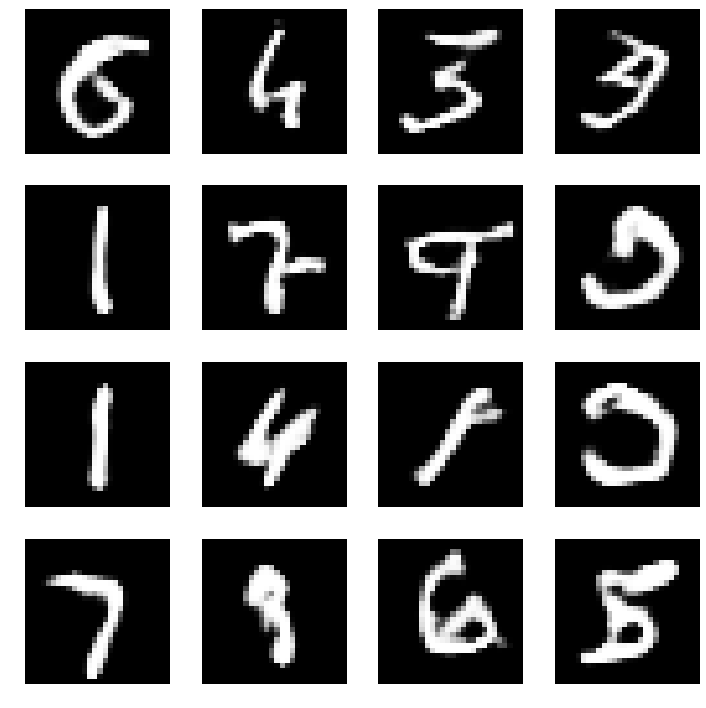

In [12]:
'''
DCGAN on MNIST using Keras
Dependencies: tensorflow 1.0 and keras 2.0
Usage: python dcgan_mnist.py
'''

import numpy as np
import time
from tensorflow.examples.tutorials.mnist import input_data

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop

import matplotlib.pyplot as plt

class ElapsedTimer(object):
    def __init__(self):
        self.start_time = time.time()
    def elapsed(self,sec):
        if sec < 60:
            return str(sec) + " sec"
        elif sec < (60 * 60):
            return str(sec / 60) + " min"
        else:
            return str(sec / (60 * 60)) + " hr"
    def elapsed_time(self):
        print("Elapsed: %s " % self.elapsed(time.time() - self.start_time) )

        
class DCGAN(object):
    def __init__(self, img_rows=28, img_cols=28, channel=1):

        self.img_rows = img_rows
        self.img_cols = img_cols
        self.channel = channel
        self.D = None   # discriminator
        self.G = None   # generator
        self.AM = None  # adversarial model
        self.DM = None  # discriminator model

    # (W−F+2P)/S+1 
    def discriminator(self): #输入图片，生成概率
        if self.D:
            return self.D
        self.D = Sequential()
        depth = 64  #w设置filter为64,生成64个unit
        dropout = 0.4#防止学习偷懒
        # In: 28 x 28 x 1, depth = 1
        # Out: 14 x 14 x 1, depth=64
        #conv2d(filters输出的维度,kernel_size,strides,padding policy)
        input_shape = (self.img_rows, self.img_cols, self.channel)
        self.D.add(Conv2D(depth*1, 5, strides=2, input_shape=input_shape,\
            padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*2, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*4, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*8, 5, strides=1, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        # Out: 1-dim probability
        self.D.add(Flatten())
        self.D.add(Dense(1))
        self.D.add(Activation('sigmoid'))
        self.D.summary()
        return self.D

    def generator(self):#100维随机向量生成一个dim x dim x depth的图片
        if self.G:
            return self.G
        self.G = Sequential()
        dropout = 0.4
        depth = 64+64+64+64
        dim = 7
        # In: 100
        # Out: dim x dim x depth
        self.G.add(Dense(dim*dim*depth, input_dim=100))#全联接，100 x 1变成dim x dim x depth
        self.G.add(BatchNormalization(momentum=0.9)) #防止网络太深梯度vanish
        self.G.add(Activation('relu'))
        self.G.add(Reshape((dim, dim, depth)))#???
        self.G.add(Dropout(dropout))

        # In: dim x dim x depth
        # Out: 2*dim x 2*dim x depth/2
        self.G.add(UpSampling2D())#反卷积
        self.G.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        self.G.add(UpSampling2D())
        self.G.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        self.G.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
        self.G.add(Conv2DTranspose(1, 5, padding='same'))
        self.G.add(Activation('sigmoid'))
        self.G.summary()
        return self.G

    def discriminator_model(self):#分类器
        if self.DM:
            return self.DM
        optimizer = RMSprop(lr=0.0002, decay=6e-8)
        self.DM = Sequential()
        self.DM.add(self.discriminator())
        self.DM.compile(loss='binary_crossentropy', optimizer=optimizer,\
            metrics=['accuracy'])
        return self.DM

    def adversarial_model(self):#拼起来
        if self.AM:
            return self.AM
        optimizer = RMSprop(lr=0.0001, decay=3e-8)
        self.AM = Sequential()
        self.AM.add(self.generator())
        self.AM.add(self.discriminator())
        self.AM.compile(loss='binary_crossentropy', optimizer=optimizer,\
            metrics=['accuracy'])
        return self.AM
      
class MNIST_DCGAN(object):#先训练一个Discriminator，再迭代交替训练generator和discriminator
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channel = 1

        self.x_train = input_data.read_data_sets("mnist",\
        	one_hot=True).train.images
        self.x_train = self.x_train.reshape(-1, self.img_rows,\
        	self.img_cols, 1).astype(np.float32)

        self.DCGAN = DCGAN()
        self.discriminator =  self.DCGAN.discriminator_model()
        self.adversarial = self.DCGAN.adversarial_model()
        self.generator = self.DCGAN.generator()

    def train(self, train_steps=2000, batch_size=256, save_interval=0):
        noise_input = None
        if save_interval>0:
            noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
        for i in range(train_steps):
            images_train = self.x_train[np.random.randint(0,
                self.x_train.shape[0], size=batch_size), :, :, :]
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            images_fake = self.generator.predict(noise)
            x = np.concatenate((images_train, images_fake))
            y = np.ones([2*batch_size, 1])
            y[batch_size:, :] = 0#前一半真实batch行设为0？
            d_loss = self.discriminator.train_on_batch(x, y)

            y = np.ones([batch_size, 1])
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            a_loss = self.adversarial.train_on_batch(noise, y)
            log_mesg = "%d: [D loss: %f, acc: %f]" % (i, d_loss[0], d_loss[1])
            log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
            print(log_mesg)
            if save_interval>0:
                if (i+1)%save_interval==0:
                    self.plot_images(save2file=True, samples=noise_input.shape[0],\
                        noise=noise_input, step=(i+1))

    def plot_images(self, save2file=False, fake=True, samples=16, noise=None, step=0):
        filename = 'mnist.png'
        if fake:
            if noise is None:
                noise = np.random.uniform(-1.0, 1.0, size=[samples, 100])
            else:
                filename = "mnist_%d.png" % step
            images = self.generator.predict(noise)
        else:
            i = np.random.randint(0, self.x_train.shape[0], samples)
            images = self.x_train[i, :, :, :]

        plt.figure(figsize=(10,10))
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [self.img_rows, self.img_cols])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        if save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()

if __name__ == '__main__':
    mnist_dcgan = MNIST_DCGAN()
    timer = ElapsedTimer()
    mnist_dcgan.train(train_steps=10000, batch_size=256, save_interval=500)
    timer.elapsed_time()
    mnist_dcgan.plot_images(fake=True)
    mnist_dcgan.plot_images(fake=False, save2file=True)